Compare the fits for al the flux datasets, look at the parameters and their distribution.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from itertools import product

flux_fits_file_path = "/Users/kai/Desktop/Coding/Python/Swinburne/SALT2_analysis/data/raw/flux_fits_data.csv"
pdf = pd.read_csv(flux_fits_file_path)
print(pdf["object id"].nunique())

1851


In [168]:
# Load the parameters for each model and filter into a dictionary
params_dict = {}
# Load the chi^2, reduced chi^2, and p-value for ecah model and filter into a dictionary
eval_dict = {}

"""
Acess the pdf and create dic where the key is the a tuple (object id, model_name, filter_band) and the value is a tuple (a, b, c).
"""
for model in ['sigmoid', 'power']:
    for filt in ['g', 'r']:
        mask = (pdf["model"] == model) & (pdf["filter"] == filt)

        for obj_id, a, b, c, chi2, red_chi2, p_val, tns_class, color in pdf.loc[mask, [
            'object id', 'a', 'b', 'c', 'chi2', 'reduced chi2', 'p-value', 'TNS classified', 'color change'
        ]].itertuples(index=False, name=None):

            key = (obj_id, model, filt, tns_class, color)
            params_dict[key] = (a, b, c)
            eval_dict[key] = (chi2, red_chi2, p_val)


# List of tuples of each paramters a, b, c for each fit.
sigmoid_g_params = [
    params for (_, model, filt, _, _), params in params_dict.items()
    if model == 'sigmoid' and filt == 'g'
]

sigmoid_r_params = [
    params for (_, model, filt, _, _), params in params_dict.items()
    if model == 'sigmoid' and filt == 'r'
]

power_g_params = [
    params for (_, model, filt, _, _), params in params_dict.items()
    if model == 'power' and filt == 'g'
]

power_r_params = [
    params for (_, model, filt, _, _), params in params_dict.items()
    if model == 'power' and filt == 'r'
]

sigmoid_g_eval = [
    eval_vals for (_, model, filt, _, _), eval_vals in eval_dict.items()
    if model == 'sigmoid' and filt == 'g'
]

sigmoid_r_eval = [
    eval_vals for (_, model, filt, _, _), eval_vals in eval_dict.items()
    if model == 'sigmoid' and filt == 'r'
]

power_g_eval = [
    eval_vals for (_, model, filt, _, _), eval_vals in eval_dict.items()
    if model == 'power' and filt == 'g'
]

power_r_eval = [
    eval_vals for (_, model, filt, _, _), eval_vals in eval_dict.items()
    if model == 'power' and filt == 'r'
]

In [169]:
# Seperate out the lists for each of the evaluation metrics for each model/filter combination
sigmoid_g_chi2_vals, sigmoid_g_reduced_chi2_vals, sigmoid_g_p_vals = zip(*sigmoid_g_eval)
sigmoid_r_chi2_vals, sigmoid_r_reduced_chi2_vals, sigmoid_r_p_vals = zip(*sigmoid_r_eval)
power_g_chi2_vals, power_g_reduced_chi2_vals, power_g_p_vals = zip(*power_g_eval)
power_r_chi2_vals, power_r_reduced_chi2_vals, power_r_p_vals = zip(*power_r_eval)

First look at the evalutation metric for each fit. Seperate them out into lists and create histograms.

In [170]:
# Remove any inf or nan values in any of the eval lists and isolate all the triplets
# for each metric of each model/filter combination

def clean_triplets(triplet_lists):
    cleaned = []
    for values in zip(*triplet_lists):
        if all(math.isfinite(v) for v in values):
            cleaned.append(values)
    return zip(*cleaned)  

(sigmoid_g_chi2_vals,
 sigmoid_g_reduced_chi2_vals,
 sigmoid_g_p_vals) = clean_triplets((sigmoid_g_chi2_vals,
                                     sigmoid_g_reduced_chi2_vals,
                                     sigmoid_g_p_vals))

(sigmoid_r_chi2_vals,
 sigmoid_r_reduced_chi2_vals,
 sigmoid_r_p_vals) = clean_triplets((sigmoid_r_chi2_vals,
                                     sigmoid_r_reduced_chi2_vals,
                                     sigmoid_r_p_vals))

(power_g_chi2_vals,
 power_g_reduced_chi2_vals,
 power_g_p_vals) = clean_triplets((power_g_chi2_vals,
                                   power_g_reduced_chi2_vals,
                                   power_g_p_vals))

(power_r_chi2_vals,
 power_r_reduced_chi2_vals,
 power_r_p_vals) = clean_triplets((power_r_chi2_vals,
                                   power_r_reduced_chi2_vals,
                                   power_r_p_vals))

                                   

Sigmoid g band median=0.15241097479000196, stdev=14.08888575708879
Sigmoid r band median=0.17776189400555245, stdev=8.98840927834677
Power g band median=0.3146697753206396, stdev=6.808378504130456
Power r band median=0.3305705020742583, stdev=12.12813487464552


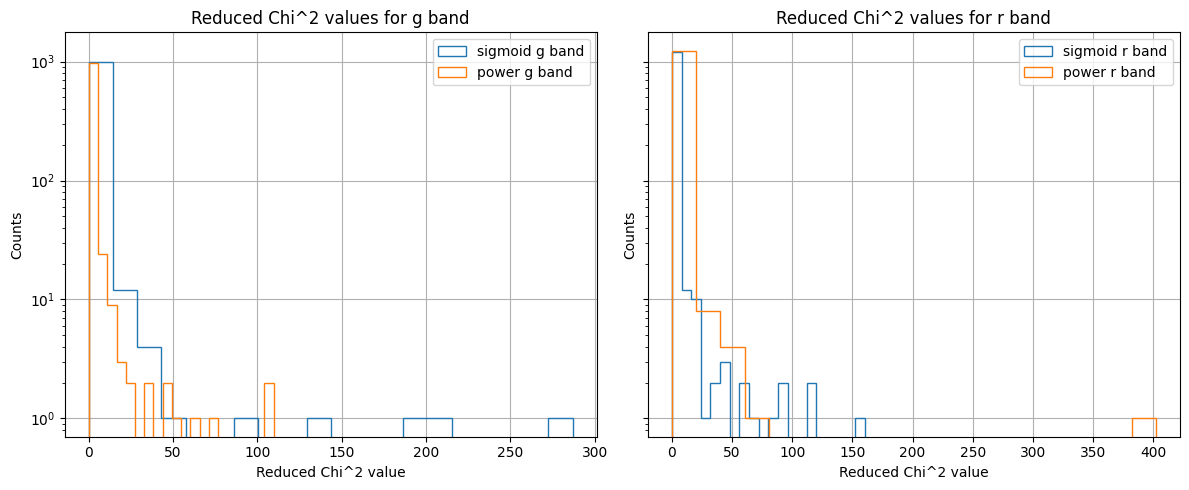

In [171]:
# Plotting histograms of the reduced chi^2 values for each band type.
colordic = {1: 'C0', 2: 'C1'}
filtdic = {1: 'g', 2: 'r'}
binning = 20

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True) 

# G band subplot
axs[0].hist(sigmoid_g_reduced_chi2_vals, bins=binning, histtype='step', color='C0', label="sigmoid g band")
print(f"Sigmoid g band median={np.median(sigmoid_g_reduced_chi2_vals)}, stdev={np.std(sigmoid_g_reduced_chi2_vals)}")
axs[0].hist(power_g_reduced_chi2_vals, bins=binning, histtype='step', color='C1', label='power g band')
print(f"Sigmoid r band median={np.median(sigmoid_r_reduced_chi2_vals)}, stdev={np.std(sigmoid_r_reduced_chi2_vals)}")
axs[0].set_xlabel("Reduced Chi^2 value")
axs[0].set_ylabel("Counts")
axs[0].set_title("Reduced Chi^2 values for g band")
axs[0].grid(True)
axs[0].legend()

# R band subplot
axs[1].hist(sigmoid_r_reduced_chi2_vals, bins=binning, histtype='step', color='C0', label="sigmoid r band")
print(f"Power g band median={np.median(power_g_reduced_chi2_vals)}, stdev={np.std(power_g_reduced_chi2_vals)}")
axs[1].hist(power_r_reduced_chi2_vals, bins=binning, histtype='step', color='C1', label='power r band')
print(f"Power r band median={np.median(power_r_reduced_chi2_vals)}, stdev={np.std(power_r_reduced_chi2_vals)}")
axs[1].set_xlabel("Reduced Chi^2 value")
axs[1].set_ylabel("Counts")
axs[1].set_title("Reduced Chi^2 values for r band")
axs[1].grid(True)
axs[1].legend()

plt.yscale('log')
plt.tight_layout()
plt.show()

Sigmoid g band median=0.15241097479000196, stdev=14.08888575708879
Sigmoid r band median=0.17776189400555245, stdev=8.98840927834677
Power g band median=0.3146697753206396, stdev=6.808378504130456
Power r band median=0.3305705020742583, stdev=12.12813487464552


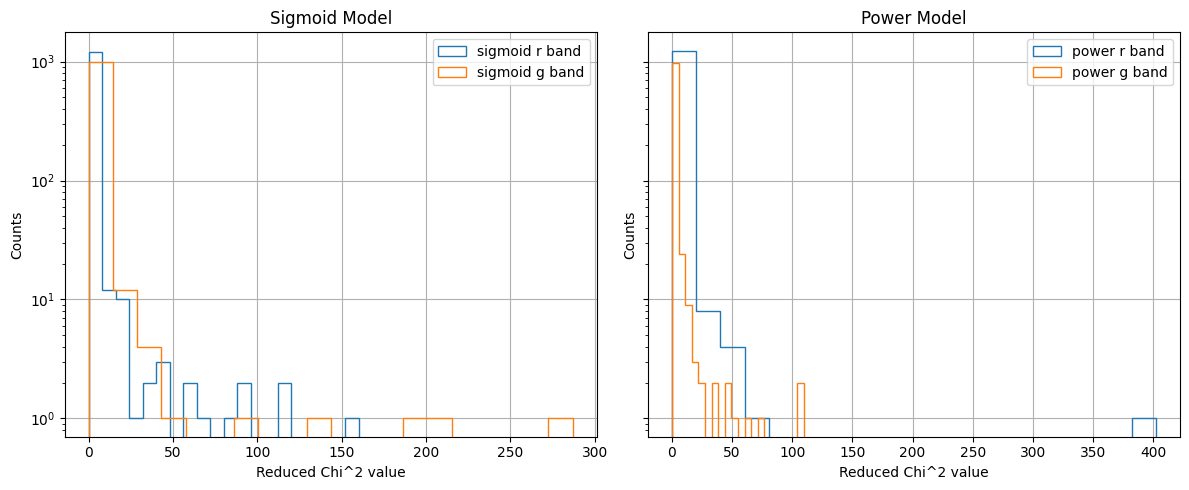

In [172]:
# Plotting histograms of the reduced chi^2 for each model of both r and g bands
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 row, 2 columns

# Left subplot: sigmoid model (r and g bands)
axs[0].hist(sigmoid_r_reduced_chi2_vals, bins=binning, histtype='step', color='C0', label='sigmoid r band')
axs[0].hist(sigmoid_g_reduced_chi2_vals, bins=binning, histtype='step', color='C1', label='sigmoid g band')
axs[0].set_xlabel("Reduced Chi^2 value")
axs[0].set_ylabel("Counts")
axs[0].set_title("Sigmoid Model")
axs[0].grid(True)
axs[0].legend()

# Right subplot: power model (r and g bands)
axs[1].hist(power_r_reduced_chi2_vals, bins=binning, histtype='step', color='C0', label='power r band')
axs[1].hist(power_g_reduced_chi2_vals, bins=binning, histtype='step', color='C1', label='power g band')
axs[1].set_xlabel("Reduced Chi^2 value")
axs[1].set_ylabel("Counts")
axs[1].set_title("Power Model")
axs[1].grid(True)
axs[1].legend()

print(f"Sigmoid g band median={np.median(sigmoid_g_reduced_chi2_vals)}, stdev={np.std(sigmoid_g_reduced_chi2_vals)}")
print(f"Sigmoid r band median={np.median(sigmoid_r_reduced_chi2_vals)}, stdev={np.std(sigmoid_r_reduced_chi2_vals)}")
print(f"Power g band median={np.median(power_g_reduced_chi2_vals)}, stdev={np.std(power_g_reduced_chi2_vals)}")
print(f"Power r band median={np.median(power_r_reduced_chi2_vals)}, stdev={np.std(power_r_reduced_chi2_vals)}")

plt.yscale('log')
plt.tight_layout()
plt.show()

Sigmoid both bands p-value median=0.853084156389228, stdev=0.2527252699662952
Power both bands p-value median=0.7127839101125104, stdev=0.3139801112040241


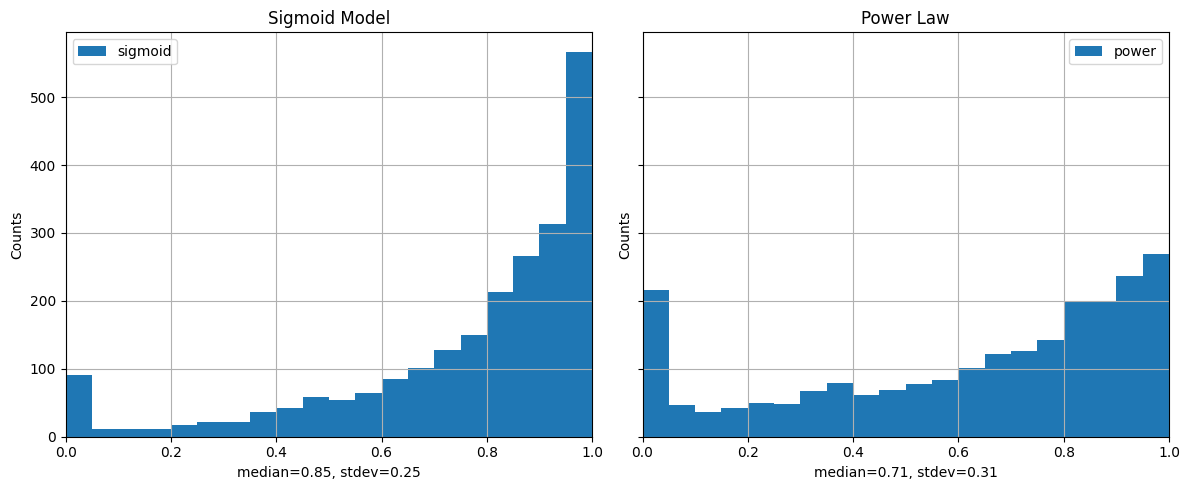

In [173]:
# Plotting the p-values for the different models (sigmoid vs power)

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 row, 2 columns
binning=20
# Left subplot: sigmoid model 
axs[0].hist(sigmoid_g_p_vals + sigmoid_r_p_vals, bins=binning, histtype='bar', color='C0', label='sigmoid')
print(f"Sigmoid both bands p-value median={np.median(sigmoid_g_p_vals + sigmoid_r_p_vals)}, stdev={np.std(sigmoid_g_p_vals + sigmoid_r_p_vals)}")
axs[0].set_xlabel(f"median={np.median(sigmoid_g_p_vals + sigmoid_r_p_vals):.2f}, stdev={np.std(sigmoid_g_p_vals + sigmoid_r_p_vals):.2f}")
axs[0].set_ylabel("Counts")
axs[0].set_title("Sigmoid Model")
axs[0].grid(True)
axs[0].legend()
axs[0].set_xlim((0, 1))

# Right subplot: power model 
axs[1].hist(power_r_p_vals + power_g_p_vals, bins=binning, histtype='bar', color='C0', label='power')
print(f"Power both bands p-value median={np.median(power_g_p_vals + power_r_p_vals)}, stdev={np.std(power_g_p_vals + power_r_p_vals)}")
axs[1].set_xlabel(f"median={np.median(power_g_p_vals + power_r_p_vals):.2f}, stdev={np.std(power_g_p_vals + power_r_p_vals):.2f}")
axs[1].set_ylabel("Counts")
axs[1].set_title("Power Law")
axs[1].grid(True)
axs[1].legend()
axs[1].set_xlim((0, 1))

plt.tight_layout()
plt.show()

Sigmoid g band p-value median=0.853084156389228, stdev = 0.2527252699662952


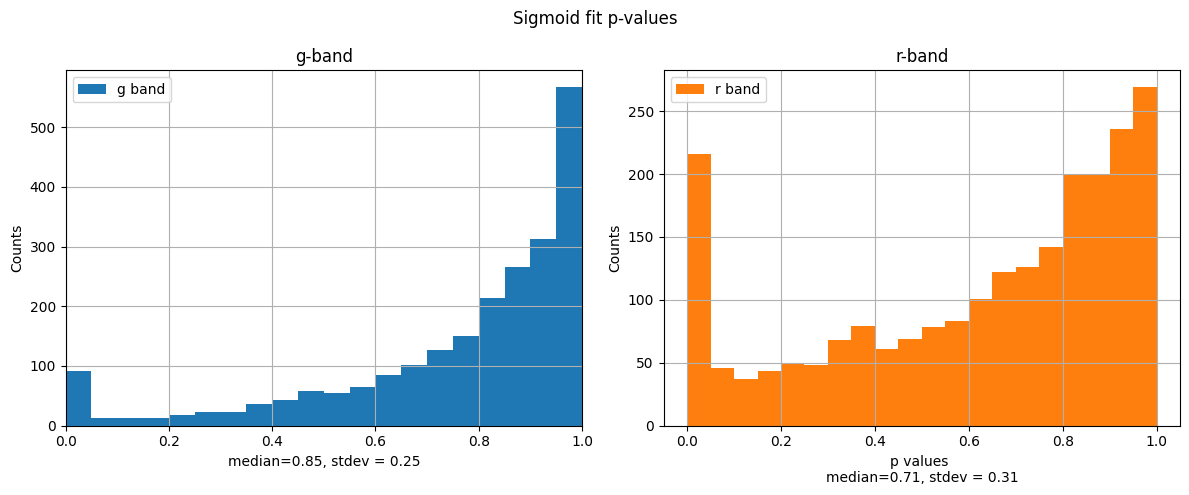

In [174]:
# Plotting the p-values for the different bands of the sigmoid model

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=False)  # 1 row, 2 columns
sigmoid_p_vals = np.concatenate([sigmoid_g_p_vals, sigmoid_r_p_vals])
# Left subplot: g band
axs[0].hist(sigmoid_p_vals, bins=binning, histtype='bar', color='C0', label='g band')
print(f"Sigmoid g band p-value median={np.median(sigmoid_p_vals)}, stdev = {np.std(sigmoid_p_vals)}")
axs[0].set_xlabel(f"median={np.median(sigmoid_p_vals):.2f}, stdev = {np.std(sigmoid_p_vals):.2f}")
axs[0].set_ylabel("Counts")
axs[0].set_title("g-band")
axs[0].grid(True)
axs[0].legend()
axs[0].set_xlim((0, 1))

# Right subplot: r band
power_p_vals = np.concatenate([power_g_p_vals, power_r_p_vals])
axs[1].hist(power_p_vals, bins=binning, histtype='bar', color='C1', label='r band')
axs[1].set_xlabel(f"p values \nmedian={np.median(power_p_vals):.2f}, stdev = {np.std(power_p_vals):.2f}")
axs[1].set_ylabel("Counts")
axs[1].set_title("r-band")
axs[1].grid(True)
axs[1].legend()

plt.suptitle("Sigmoid fit p-values")
plt.tight_layout()
plt.show()

Power g band p-value median=0.7100702758152828, stdev = 0.3120771188452963
Power r band p-value median=0.7128673705265994, stdev = 0.31552207340299643


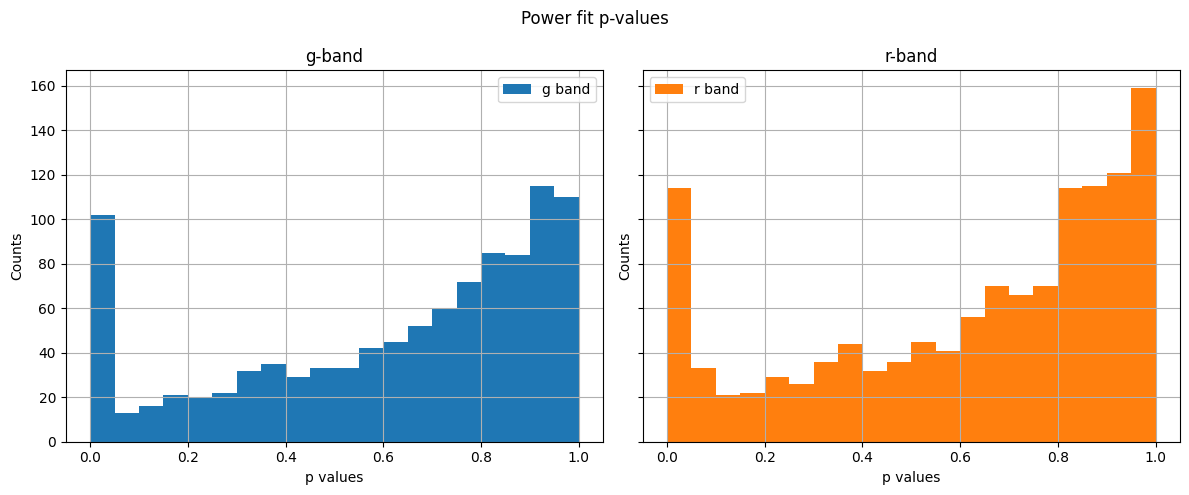

In [175]:
# Plotting the p-values for the different bands of the power model

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 row, 2 columns
binning = 20
# Left subplot: g band
axs[0].hist(power_g_p_vals, bins=binning, histtype='bar', color='C0', label='g band')
print(f"Power g band p-value median={np.median(power_g_p_vals)}, stdev = {np.std(power_g_p_vals)}")
axs[0].set_xlabel("p values")
axs[0].set_ylabel("Counts")
axs[0].set_title("g-band")
axs[0].grid(True)
axs[0].legend()

# Right subplot: r band
axs[1].hist(power_r_p_vals, bins=binning, histtype='bar', color='C1', label='r band')
print(f"Power r band p-value median={np.median(power_r_p_vals)}, stdev = {np.std(power_r_p_vals)}")
axs[1].set_xlabel("p values")
axs[1].set_ylabel("Counts")
axs[1].set_title("r-band")
axs[1].grid(True)
axs[1].legend()

plt.suptitle("Power fit p-values")
plt.tight_layout()
plt.show()

Looking at the sigmoid parameters

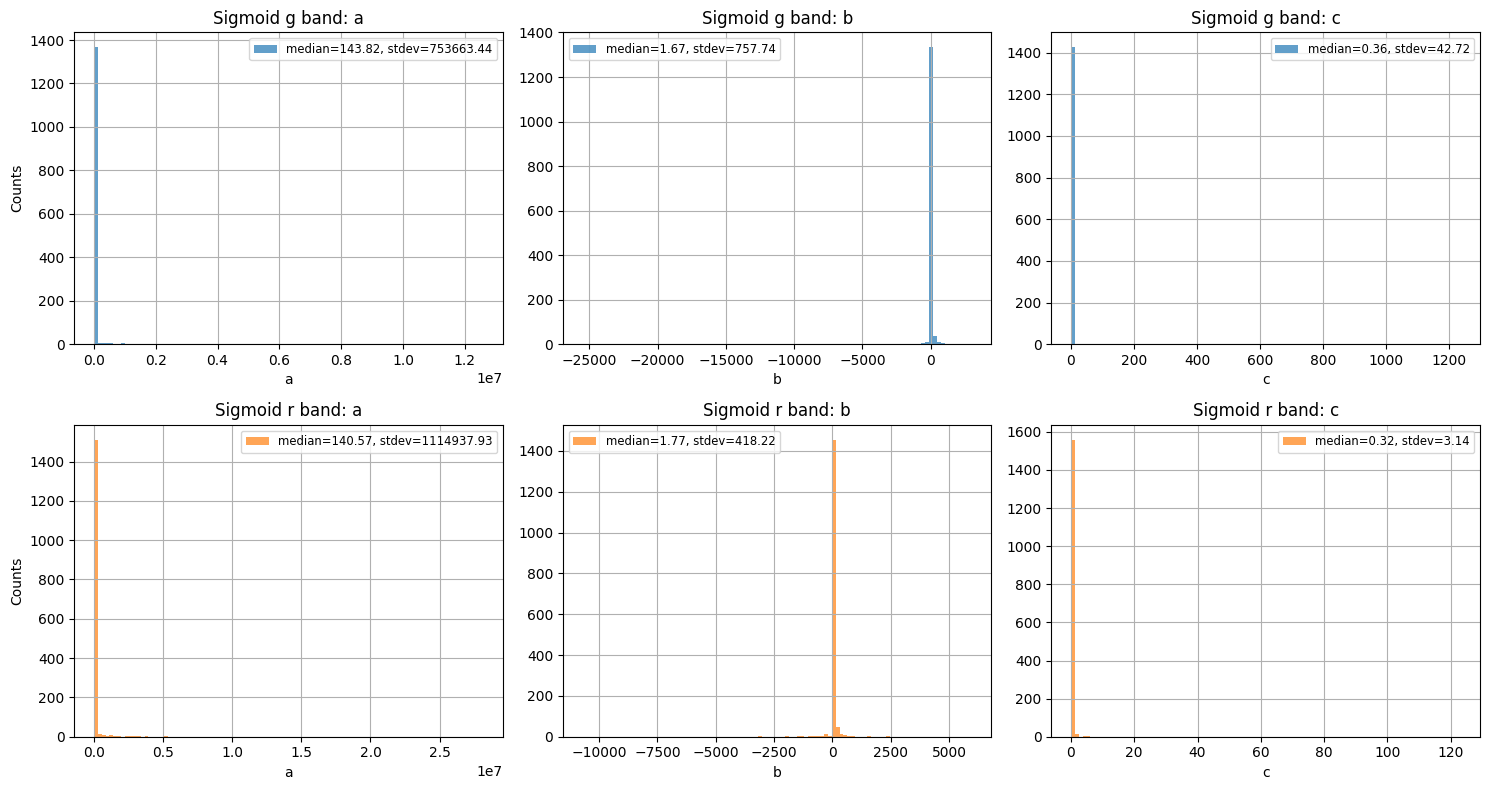

In [176]:
# Histogram of paramters for the sigmoid model
sigmoid_g_a, sigmoid_g_b, sigmoid_g_c = zip(*sigmoid_g_params)
sigmoid_r_a, sigmoid_r_b, sigmoid_r_c = zip(*sigmoid_r_params)
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

binning = 100

# Top row: g band parameters
sigmoid_g_a_median, sigmoid_g_a_stdev = np.median(sigmoid_g_a), np.std(sigmoid_g_a)
label = f'median={sigmoid_g_a_median:.2f}, stdev={sigmoid_g_a_stdev:.2f}'
axs[0, 0].hist(sigmoid_g_a, bins=binning, color='C0', histtype='bar', alpha=0.7, label=label)
axs[0, 0].set_title('Sigmoid g band: a')
axs[0, 0].set_xlabel('a')
axs[0, 0].set_ylabel('Counts')
axs[0, 0].grid(True)
axs[0, 0].legend(fontsize='small')

sigmoid_g_b_median, sigmoid_g_b_stdev = np.median(sigmoid_g_b), np.std(sigmoid_g_b)
label = f'median={sigmoid_g_b_median:.2f}, stdev={sigmoid_g_b_stdev:.2f}'
axs[0, 1].hist(sigmoid_g_b, bins=binning, color='C0', histtype='bar', alpha=0.7, label=label)
axs[0, 1].set_title('Sigmoid g band: b')
axs[0, 1].set_xlabel('b')
axs[0, 1].grid(True)
axs[0, 1].legend(fontsize='small')

sigmoid_g_c_median, sigmoid_g_c_stdev = np.median(sigmoid_g_c), np.std(sigmoid_g_c)
label = f'median={sigmoid_g_c_median:.2f}, stdev={sigmoid_g_c_stdev:.2f}'
axs[0, 2].hist(sigmoid_g_c, bins=binning, color='C0', histtype='bar', alpha=0.7, label=label)
axs[0, 2].set_title('Sigmoid g band: c')
axs[0, 2].set_xlabel('c')
axs[0, 2].grid(True)
axs[0, 2].legend(fontsize='small')

# Bottom row: r band parameters
sigmoid_r_a_median, sigmoid_r_a_stdev = np.median(sigmoid_r_a), np.std(sigmoid_r_a)
label = f'median={sigmoid_r_a_median:.2f}, stdev={sigmoid_r_a_stdev:.2f}'
axs[1, 0].hist(sigmoid_r_a, bins=binning, color='C1', histtype='bar', alpha=0.7, label=label)
axs[1, 0].set_title('Sigmoid r band: a')
axs[1, 0].set_xlabel('a')
axs[1, 0].set_ylabel('Counts')
axs[1, 0].grid(True)
axs[1, 0].legend(fontsize='small')

sigmoid_r_b_median, sigmoid_r_b_stdev = np.median(sigmoid_r_b), np.std(sigmoid_r_b)
label = f'median={sigmoid_r_b_median:.2f}, stdev={sigmoid_r_b_stdev:.2f}'
axs[1, 1].hist(sigmoid_r_b, bins=binning, color='C1', histtype='bar', alpha=0.7, label=label)
axs[1, 1].set_title('Sigmoid r band: b')
axs[1, 1].set_xlabel('b')
axs[1, 1].grid(True)
axs[1, 1].legend(fontsize='small')

sigmoid_r_c_median, sigmoid_r_c_stdev = np.median(sigmoid_r_c), np.std(sigmoid_r_c)
label = f'median={sigmoid_r_c_median:.2f}, stdev={sigmoid_r_c_stdev:.2f}'
axs[1, 2].hist(sigmoid_r_c, bins=binning, color='C1', histtype='bar', alpha=0.7, label=label)
axs[1, 2].set_title('Sigmoid r band: c')
axs[1, 2].set_xlabel('c')
axs[1, 2].grid(True)
axs[1, 2].legend(fontsize='small')

plt.tight_layout()
plt.show()


In [177]:
# Removing triplets that contain outlier parameters, which are parametrs in the bottom and top 10 percentiles

lower_percentile = 10
upper_percentile = 90

# g band
lower_sigmoid_g_a_bound = np.percentile(sigmoid_g_a, lower_percentile)
upper_sigmoid_g_a_bound = np.percentile(sigmoid_g_a, upper_percentile)
nop_sigmoid_g_a = [a for a in sigmoid_g_a if lower_sigmoid_g_a_bound <= a <= upper_sigmoid_g_a_bound]

lower_sigmoid_g_b_bound = np.percentile(sigmoid_g_b, lower_percentile)
upper_sigmoid_g_b_bound = np.percentile(sigmoid_g_b, upper_percentile)
nop_sigmoid_g_b = [b for b in sigmoid_g_b if lower_sigmoid_g_b_bound <= b <= upper_sigmoid_g_b_bound]

lower_sigmoid_g_c_bound = np.percentile(sigmoid_g_c, lower_percentile)
upper_sigmoid_g_c_bound = np.percentile(sigmoid_g_c, upper_percentile)
nop_sigmoid_g_c = [c for c in sigmoid_g_c if c <= upper_sigmoid_g_c_bound]

# r band
lower_sigmoid_r_a_bound = np.percentile(sigmoid_r_a, lower_percentile)
upper_sigmoid_r_a_bound = np.percentile(sigmoid_r_a, upper_percentile)
nop_sigmoid_r_a = [a for a in sigmoid_r_a if lower_sigmoid_r_a_bound <= a <= upper_sigmoid_r_a_bound]

lower_sigmoid_r_b_bound = np.percentile(sigmoid_r_b, lower_percentile)
upper_sigmoid_r_b_bound = np.percentile(sigmoid_r_b, upper_percentile)
nop_sigmoid_r_b = [b for b in sigmoid_r_b if lower_sigmoid_r_b_bound <= b <= upper_sigmoid_r_b_bound]

lower_sigmoid_r_c_bound = np.percentile(sigmoid_r_c, lower_percentile)
upper_sigmoid_r_c_bound = np.percentile(sigmoid_r_c, upper_percentile)
nop_sigmoid_r_c = [c for c in sigmoid_r_c if c <= upper_sigmoid_r_c_bound]

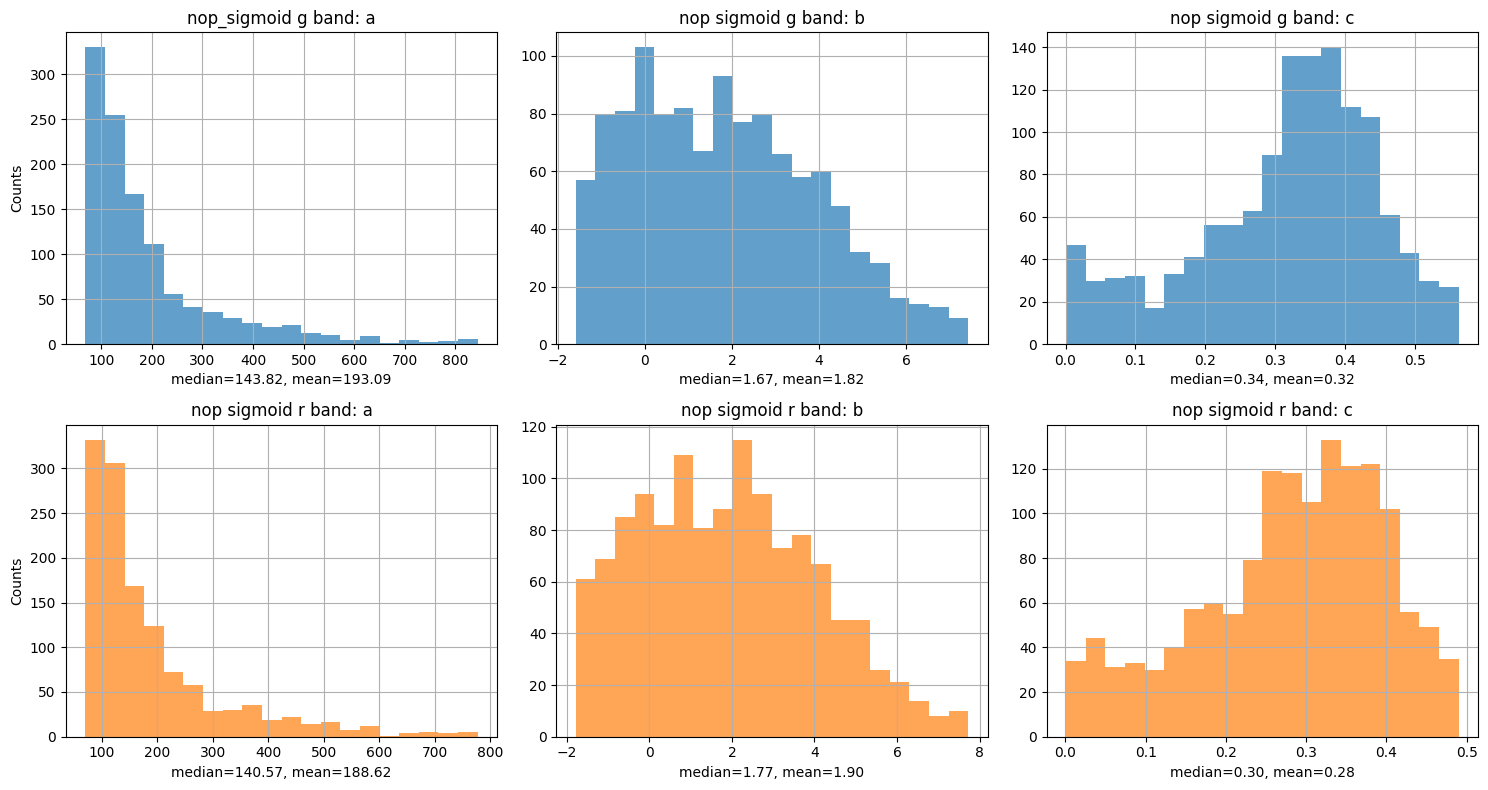

In [178]:
# Plotting the paramters histograms with the removed outliers

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

binning = 20

# Top row: g band parameters
axs[0, 0].hist(nop_sigmoid_g_a, bins=binning, color='C0', histtype='bar', alpha=0.7)
axs[0, 0].set_title('nop_sigmoid g band: a')
axs[0, 0].set_xlabel(f"median={np.median(nop_sigmoid_g_a):.2f}, mean={np.mean(nop_sigmoid_g_a):.2f}")
axs[0, 0].set_ylabel('Counts')
axs[0, 0].grid(True)

axs[0, 1].hist(nop_sigmoid_g_b, bins=binning, color='C0', histtype='bar', alpha=0.7)
axs[0, 1].set_title('nop sigmoid g band: b')
axs[0, 1].set_xlabel(f"median={np.median(nop_sigmoid_g_b):.2f}, mean={np.mean(nop_sigmoid_g_b):.2f}")
axs[0, 1].grid(True)

axs[0, 2].hist(nop_sigmoid_g_c, bins=binning, color='C0', histtype='bar', alpha=0.7)
axs[0, 2].set_title('nop sigmoid g band: c')
axs[0, 2].set_xlabel(f"median={np.median(nop_sigmoid_g_c):.2f}, mean={np.mean(nop_sigmoid_g_c):.2f}")
axs[0, 2].grid(True)

# Bottom row: r band parameters
axs[1, 0].hist(nop_sigmoid_r_a, bins=binning, color='C1', histtype='bar', alpha=0.7)
axs[1, 0].set_title('nop sigmoid r band: a')
axs[1, 0].set_xlabel(f"median={np.median(nop_sigmoid_r_a):.2f}, mean={np.mean(nop_sigmoid_r_a):.2f}")
axs[1, 0].set_ylabel('Counts')
axs[1, 0].grid(True)

axs[1, 1].hist(nop_sigmoid_r_b, bins=binning, color='C1', histtype='bar', alpha=0.7)
axs[1, 1].set_title('nop sigmoid r band: b')
axs[1, 1].set_xlabel(f"median={np.median(nop_sigmoid_r_b):.2f}, mean={np.mean(nop_sigmoid_r_b):.2f}")
axs[1, 1].grid(True)

axs[1, 2].hist(nop_sigmoid_r_c, bins=binning, color='C1', histtype='bar', alpha=0.7)
axs[1, 2].set_title('nop sigmoid r band: c')
axs[1, 2].set_xlabel(f"median={np.median(nop_sigmoid_r_c):.2f}, mean={np.mean(nop_sigmoid_r_c):.2f}")
axs[1, 2].grid(True)

plt.tight_layout()
plt.show()

Amplitudes are exponential distributions for both bands

Looking at the power law parameters 

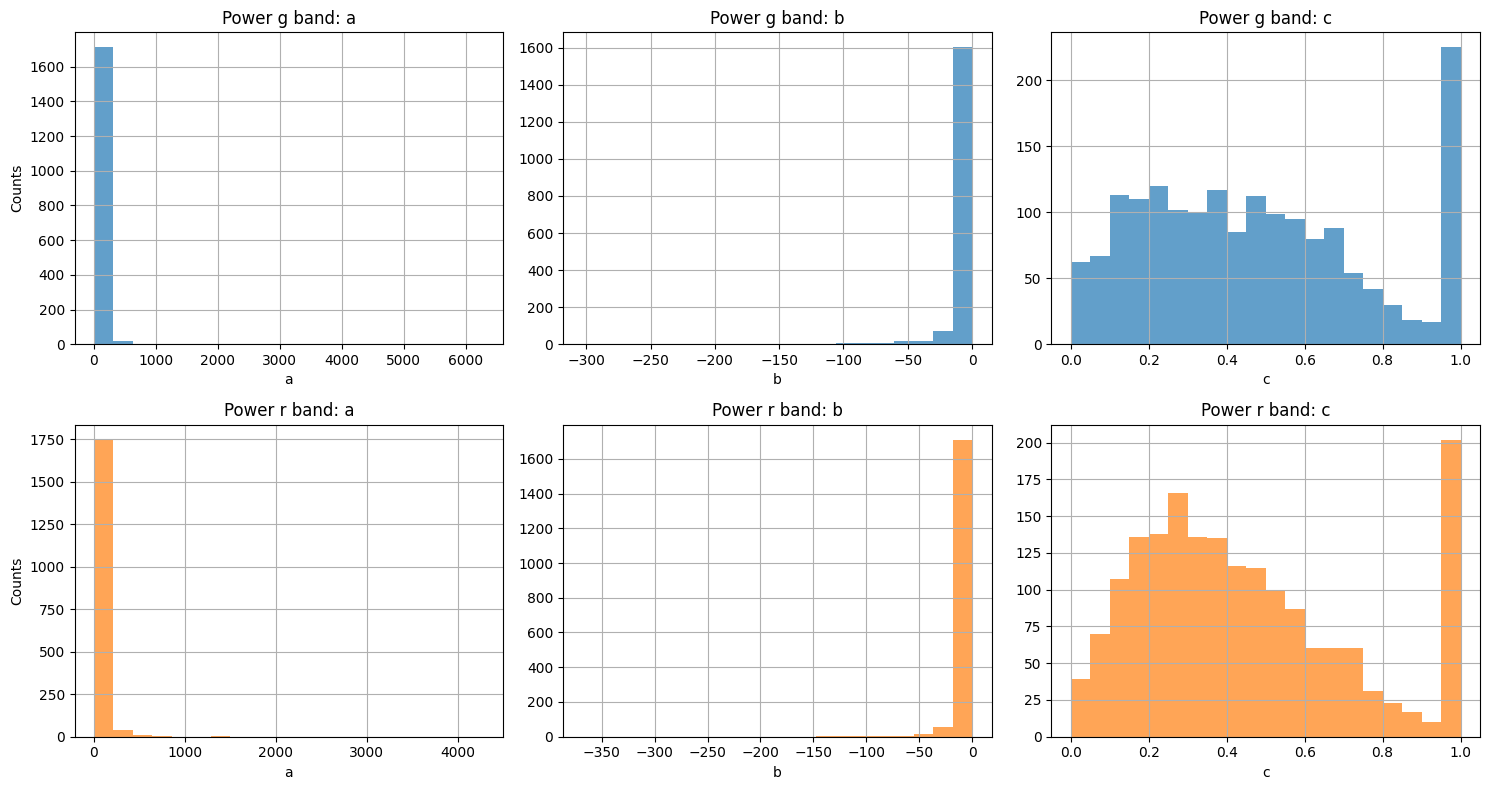

In [179]:
# Histogram of paramters for the power model
power_g_a, power_g_b, power_g_c = zip(*power_g_params)
power_r_a, power_r_b, power_r_c = zip(*power_r_params)

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

binning = 20

# Top row: g band parameters
axs[0, 0].hist(power_g_a, bins=binning, color='C0', histtype='bar', alpha=0.7)
axs[0, 0].set_title('Power g band: a')
axs[0, 0].set_xlabel('a')
axs[0, 0].set_ylabel('Counts')
axs[0, 0].grid(True)

axs[0, 1].hist(power_g_b, bins=binning, color='C0', histtype='bar', alpha=0.7)
axs[0, 1].set_title('Power g band: b')
axs[0, 1].set_xlabel('b')
axs[0, 1].grid(True)

axs[0, 2].hist(power_g_c, bins=binning, color='C0', histtype='bar', alpha=0.7)
axs[0, 2].set_title('Power g band: c')
axs[0, 2].set_xlabel('c')
axs[0, 2].grid(True)

# Bottom row: r band parameters
axs[1, 0].hist(power_r_a, bins=binning, color='C1', histtype='bar', alpha=0.7)
axs[1, 0].set_title('Power r band: a')
axs[1, 0].set_xlabel('a')
axs[1, 0].set_ylabel('Counts')
axs[1, 0].grid(True)

axs[1, 1].hist(power_r_b, bins=binning, color='C1', histtype='bar', alpha=0.7)
axs[1, 1].set_title('Power r band: b')
axs[1, 1].set_xlabel('b')
axs[1, 1].grid(True)

axs[1, 2].hist(power_r_c, bins=binning, color='C1', histtype='bar', alpha=0.7)
axs[1, 2].set_title('Power r band: c')
axs[1, 2].set_xlabel('c')
axs[1, 2].grid(True)

plt.tight_layout()
plt.show()

In [180]:
# Removing triplets that contain outlier parameters 
# For a get rid of bottom 1 percent and top 5 percent
# For b get rid of bottom 5 percent
# For c get rid of top and bottom 5

lower_percentile_a = 1
lower_percentile_c = 5
lower_percentile_b = 10
upper_percentile = 95

# g band
lower_power_g_a_bound = np.percentile(power_g_a, lower_percentile_a)
upper_power_g_a_bound = np.percentile(power_g_a, upper_percentile)
nop_power_g_a = [a for a in power_g_a if lower_power_g_a_bound <= a <= upper_power_g_a_bound]

lower_power_g_b_bound = np.percentile(power_g_b, lower_percentile_b)
upper_power_g_b_bound = np.percentile(power_g_b, upper_percentile)
nop_power_g_b = [b for b in power_g_b if lower_power_g_b_bound <= b]

lower_power_g_c_bound = np.percentile(power_g_c, lower_percentile_c)
upper_power_g_c_bound = np.percentile(power_g_c, upper_percentile)
nop_power_g_c = [c for c in power_g_c if lower_power_g_c_bound <= c <= upper_power_g_c_bound]

# r band
lower_power_r_a_bound = np.percentile(power_r_a, lower_percentile_a)
upper_power_r_a_bound = np.percentile(power_r_a, upper_percentile)
nop_power_r_a = [a for a in power_r_a if lower_power_r_a_bound <= a <= upper_power_r_a_bound]

lower_power_r_b_bound = np.percentile(power_r_b, lower_percentile_b)
upper_power_r_b_bound = np.percentile(power_r_b, upper_percentile)
nop_power_r_b = [b for b in power_r_b if lower_power_r_b_bound <= b <= upper_power_r_b_bound]

lower_power_r_c_bound = np.percentile(power_r_c, lower_percentile_c)
upper_power_r_c_bound = np.percentile(power_r_c, upper_percentile)
nop_power_r_c = [c for c in power_r_c if lower_power_r_c_bound <= c <= upper_power_r_c_bound]

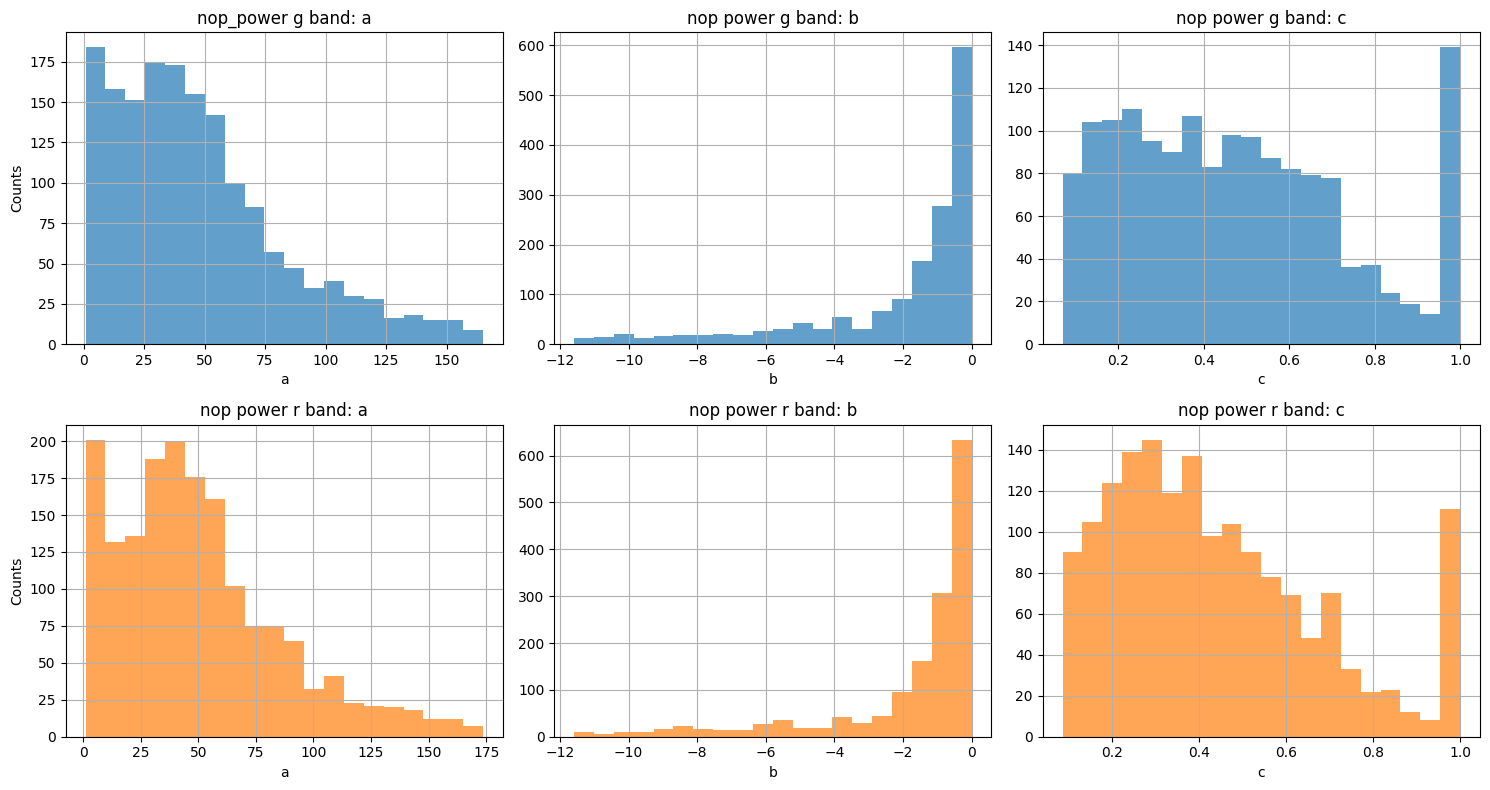

In [181]:
# Plotting the paramters histograms with the removed outliers

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

binning = 20

# Top row: g band parameters
axs[0, 0].hist(nop_power_g_a, bins=binning, color='C0', histtype='bar', alpha=0.7)
axs[0, 0].set_title('nop_power g band: a')
axs[0, 0].set_xlabel('a')
axs[0, 0].set_ylabel('Counts')
axs[0, 0].grid(True)

axs[0, 1].hist(nop_power_g_b, bins=binning, color='C0', histtype='bar', alpha=0.7)
axs[0, 1].set_title('nop power g band: b')
axs[0, 1].set_xlabel('b')
axs[0, 1].grid(True)

axs[0, 2].hist(nop_power_g_c, bins=binning, color='C0', histtype='bar', alpha=0.7)
axs[0, 2].set_title('nop power g band: c')
axs[0, 2].set_xlabel('c')
axs[0, 2].grid(True)

# Bottom row: r band parameters
axs[1, 0].hist(nop_power_r_a, bins=binning, color='C1', histtype='bar', alpha=0.7)
axs[1, 0].set_title('nop power r band: a')
axs[1, 0].set_xlabel('a')
axs[1, 0].set_ylabel('Counts')
axs[1, 0].grid(True)

axs[1, 1].hist(nop_power_r_b, bins=binning, color='C1', histtype='bar', alpha=0.7)
axs[1, 1].set_title('nop power r band: b')
axs[1, 1].set_xlabel('b')
axs[1, 1].grid(True)

axs[1, 2].hist(nop_power_r_c, bins=binning, color='C1', histtype='bar', alpha=0.7)
axs[1, 2].set_title('nop power r band: c')
axs[1, 2].set_xlabel('c')
axs[1, 2].grid(True)

plt.tight_layout()
plt.show()

Looking at the distribution of reduced chi^2 values and p values for the parameter triplets without outliers.

In [182]:
# nop means no outlying parameters
# sigmoid parameters 
nop_sigmoid_g_params = [
    (a, b, c) for (a, b, c) in sigmoid_g_params
    if a in nop_sigmoid_g_a and b in nop_sigmoid_g_b and c in nop_sigmoid_g_c
]



nop_sigmoid_r_params = [
    (a, b, c) for (a, b, c) in sigmoid_r_params
    if a in nop_sigmoid_r_a and b in nop_sigmoid_r_b and c in nop_sigmoid_r_c
]

nop_sigmoid_g_a, nop_sigmoid_g_b, nop_sigmoid_g_c = zip(*nop_sigmoid_g_params)
nop_sigmoid_r_a, nop_sigmoid_r_b, nop_sigmoid_r_c = zip(*nop_sigmoid_r_params)

# Power law parameters
nop_power_g_params = [
    (a, b, c) for (a, b, c) in power_g_params
    if a in nop_power_g_a and b in nop_power_g_b and c in nop_power_g_c
]

nop_power_r_params = [
    (a, b, c) for (a, b, c) in power_r_params
    if a in nop_power_r_a and b in nop_power_r_b and c in nop_power_r_c
]

nop_power_g_a, nop_power_g_b, nop_power_g_c = zip(*nop_power_g_params)
nop_power_r_a, nop_power_r_b, nop_power_r_c = zip(*nop_power_r_params)

First looking at the sigmoid $\chi^2$, $\chi^2_\nu$, p-values and 

In [183]:
# nop refers to no outlying parameters
sigmoid_nop_g_idinfo = [
    id_info for id_info, params in params_dict.items()
    if (params in nop_sigmoid_g_params) and (id_info[2]=='g')
]

sigmoid_nop_r_idinfo = [
    id_info for id_info, params in params_dict.items()
    if (params in nop_sigmoid_r_params) and (id_info[2]=='r')
]

nop_sigmoid_g_eval = [
    eval_dict[id_info] for id_info in sigmoid_nop_g_idinfo
]

nop_sigmoid_g_eval = [
    eval_dict[id_info] for id_info in sigmoid_nop_g_idinfo
]

nop_sigmoid_r_eval = [
    eval_dict[id_info] for id_info in sigmoid_nop_r_idinfo
]

nop_sigmoid_g_chi2_vals, nop_sigmoid_g_reduced_chi2_vals, nop_sigmoid_g_p_vals = zip(*nop_sigmoid_g_eval)

(nop_sigmoid_g_chi2_vals,
 nop_sigmoid_g_reduced_chi2_vals,
 nop_sigmoid_g_p_vals) = clean_triplets((nop_sigmoid_g_chi2_vals,
                                     nop_sigmoid_g_reduced_chi2_vals,
                                     nop_sigmoid_g_p_vals))

nop_sigmoid_r_chi2_vals, nop_sigmoid_r_reduced_chi2_vals, nop_sigmoid_r_p_vals = zip(*nop_sigmoid_r_eval)

(nop_sigmoid_r_chi2_vals,
 nop_sigmoid_r_reduced_chi2_vals,
 nop_sigmoid_r_p_vals) = clean_triplets((nop_sigmoid_r_chi2_vals,
                                     nop_sigmoid_r_reduced_chi2_vals,
                                     nop_sigmoid_r_p_vals))

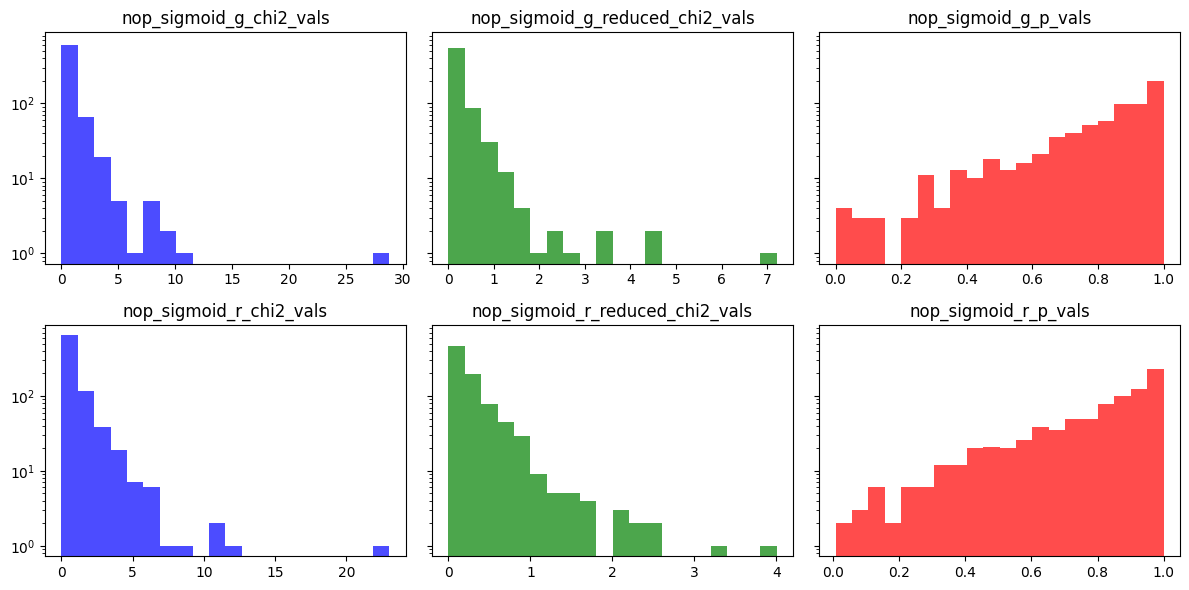

In [184]:
# Plotting all the evaluation metrics for the good fits
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharey=True)

binning = 20

axes[0, 0].hist(nop_sigmoid_g_chi2_vals, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[0, 0].set_title("nop_sigmoid_g_chi2_vals")

axes[0, 1].hist(nop_sigmoid_g_reduced_chi2_vals, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[0, 1].set_title("nop_sigmoid_g_reduced_chi2_vals")

axes[0, 2].hist(nop_sigmoid_g_p_vals, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[0, 2].set_title("nop_sigmoid_g_p_vals")

axes[1, 0].hist(nop_sigmoid_r_chi2_vals, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[1, 0].set_title("nop_sigmoid_r_chi2_vals")

axes[1, 1].hist(nop_sigmoid_r_reduced_chi2_vals, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[1, 1].set_title("nop_sigmoid_r_reduced_chi2_vals")

axes[1, 2].hist(nop_sigmoid_r_p_vals, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[1, 2].set_title("nop_sigmoid_r_p_vals")

plt.yscale('log')
plt.tight_layout()
plt.show()

Now looking at power law $\chi^2$, $\chi^2_\nu$, and p-values

In [185]:
# nop refers to no outlying parameters
power_nop_g_idinfo = [
    id_info for id_info, params in params_dict.items()
    if (params in nop_power_g_params) and (id_info[2]=='g')
]

power_nop_r_idinfo = [
    id_info for id_info, params in params_dict.items()
    if (params in nop_power_r_params) and (id_info[2]=='r')
]

nop_power_g_eval = [
    eval_dict[id_info] for id_info in power_nop_g_idinfo
]

nop_power_g_eval = [
    eval_dict[id_info] for id_info in power_nop_g_idinfo
]

nop_power_r_eval = [
    eval_dict[id_info] for id_info in power_nop_r_idinfo
]

nop_power_g_chi2_vals, nop_power_g_reduced_chi2_vals, nop_power_g_p_vals = zip(*nop_power_g_eval)

(nop_power_g_chi2_vals,
 nop_power_g_reduced_chi2_vals,
 nop_power_g_p_vals) = clean_triplets((nop_power_g_chi2_vals,
                                     nop_power_g_reduced_chi2_vals,
                                     nop_power_g_p_vals))

nop_power_r_chi2_vals, nop_power_r_reduced_chi2_vals, nop_power_r_p_vals = zip(*nop_power_r_eval)

(nop_power_r_chi2_vals,
 nop_power_r_reduced_chi2_vals,
 nop_power_r_p_vals) = clean_triplets((nop_power_r_chi2_vals,
                                     nop_power_r_reduced_chi2_vals,
                                     nop_power_r_p_vals))

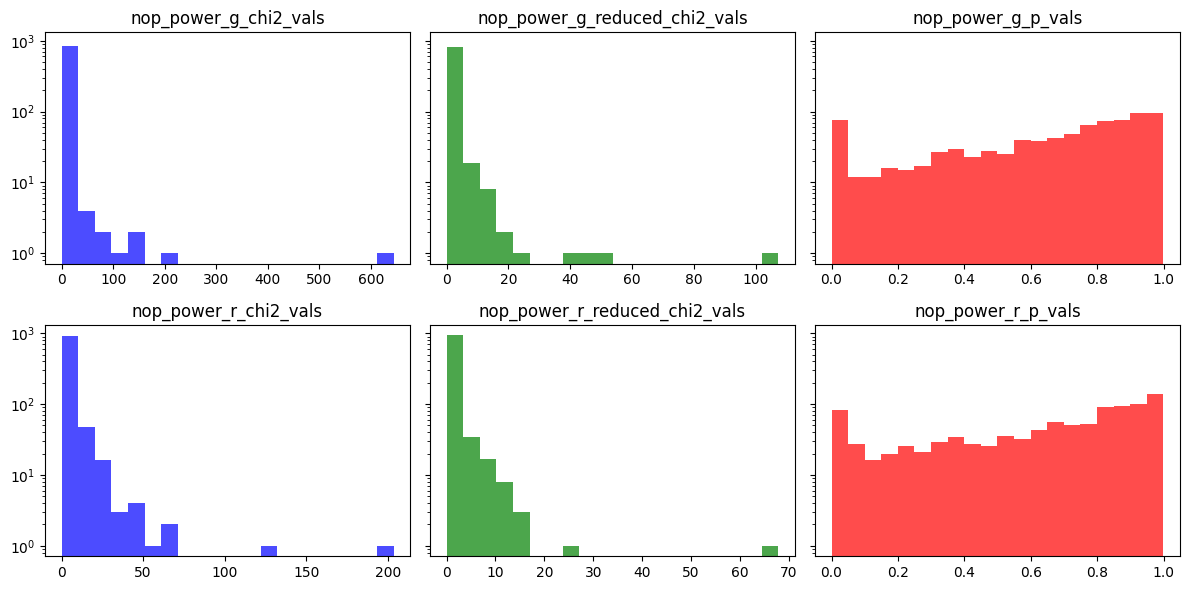

In [186]:
# Plotting all the evaluation metrics for the fits without outlying parameters
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharey=True)

binning = 20

axes[0, 0].hist(nop_power_g_chi2_vals, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[0, 0].set_title("nop_power_g_chi2_vals")

axes[0, 1].hist(nop_power_g_reduced_chi2_vals, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[0, 1].set_title("nop_power_g_reduced_chi2_vals")

axes[0, 2].hist(nop_power_g_p_vals, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[0, 2].set_title("nop_power_g_p_vals")

axes[1, 0].hist(nop_power_r_chi2_vals, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[1, 0].set_title("nop_power_r_chi2_vals")

axes[1, 1].hist(nop_power_r_reduced_chi2_vals, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[1, 1].set_title("nop_power_r_reduced_chi2_vals")

axes[1, 2].hist(nop_power_r_p_vals, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[1, 2].set_title("nop_power_r_p_vals")

plt.yscale('log')
plt.tight_layout()
plt.show()

Plotting parameter distributions without the outliers

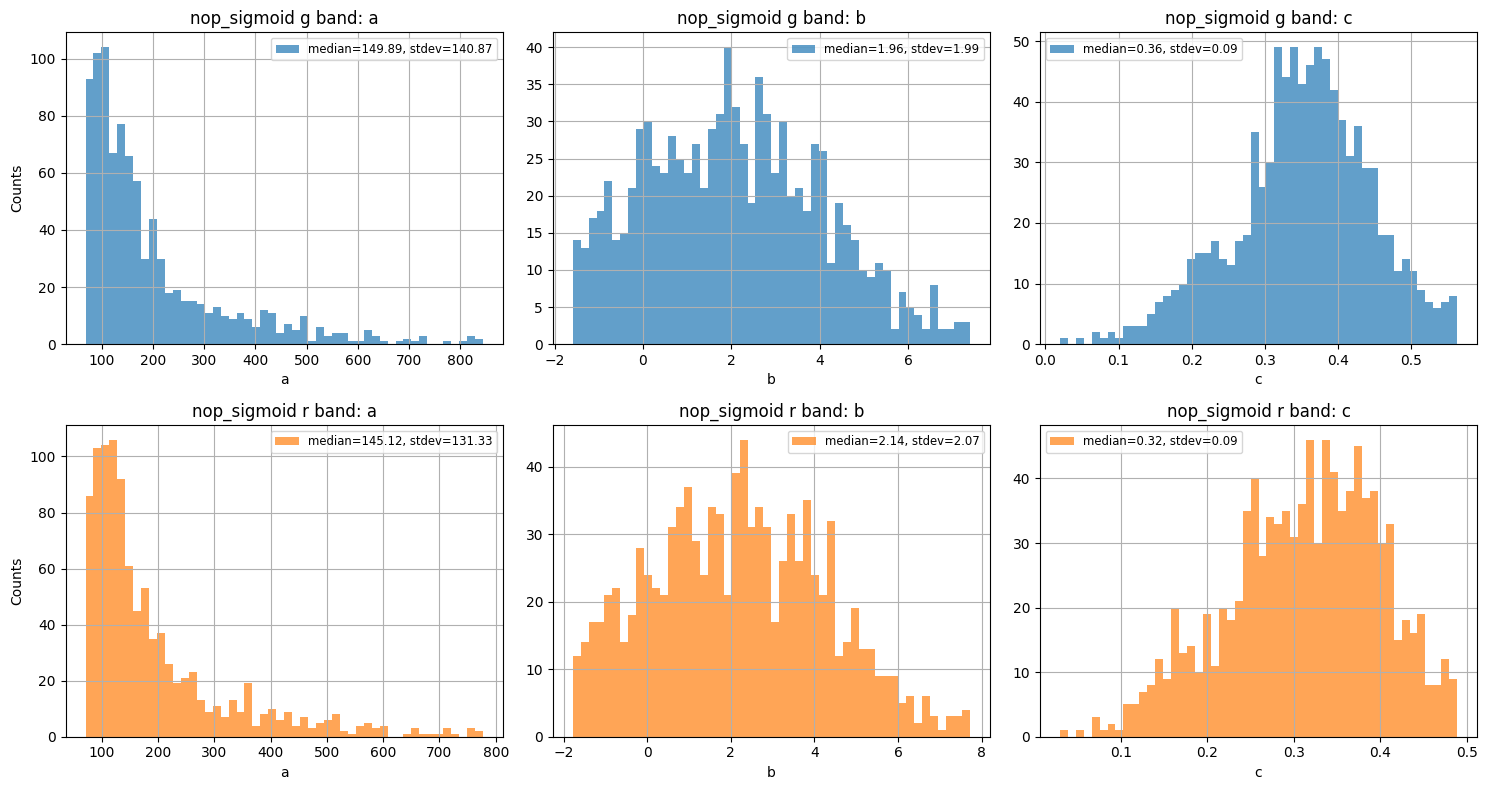

In [187]:
# First the Sigmoid
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

binning = 50

# Top row: g band parameters
nop_sigmoid_g_a_median, nop_sigmoid_g_a_stdev = np.median(nop_sigmoid_g_a), np.std(nop_sigmoid_g_a)
label = f'median={nop_sigmoid_g_a_median:.2f}, stdev={nop_sigmoid_g_a_stdev:.2f}'
axs[0, 0].hist(nop_sigmoid_g_a, bins=binning, color='C0', histtype='bar', alpha=0.7, label=label)
axs[0, 0].set_title('nop_sigmoid g band: a')
axs[0, 0].set_xlabel('a')
axs[0, 0].set_ylabel('Counts')
axs[0, 0].grid(True)
axs[0, 0].legend(fontsize='small')

nop_sigmoid_g_b_median, nop_sigmoid_g_b_stdev = np.median(nop_sigmoid_g_b), np.std(nop_sigmoid_g_b)
label = f'median={nop_sigmoid_g_b_median:.2f}, stdev={nop_sigmoid_g_b_stdev:.2f}'
axs[0, 1].hist(nop_sigmoid_g_b, bins=binning, color='C0', histtype='bar', alpha=0.7, label=label)
axs[0, 1].set_title('nop_sigmoid g band: b')
axs[0, 1].set_xlabel('b')
axs[0, 1].grid(True)
axs[0, 1].legend(fontsize='small')

nop_sigmoid_g_c_median, nop_sigmoid_g_c_stdev = np.median(nop_sigmoid_g_c), np.std(nop_sigmoid_g_c)
label = f'median={nop_sigmoid_g_c_median:.2f}, stdev={nop_sigmoid_g_c_stdev:.2f}'
axs[0, 2].hist(nop_sigmoid_g_c, bins=binning, color='C0', histtype='bar', alpha=0.7, label=label)
axs[0, 2].set_title('nop_sigmoid g band: c')
axs[0, 2].set_xlabel('c')
axs[0, 2].grid(True)
axs[0, 2].legend(fontsize='small')

# Bottom row: r band parameters
nop_sigmoid_r_a_median, nop_sigmoid_r_a_stdev = np.median(nop_sigmoid_r_a), np.std(nop_sigmoid_r_a)
label = f'median={nop_sigmoid_r_a_median:.2f}, stdev={nop_sigmoid_r_a_stdev:.2f}'
axs[1, 0].hist(nop_sigmoid_r_a, bins=binning, color='C1', histtype='bar', alpha=0.7, label=label)
axs[1, 0].set_title('nop_sigmoid r band: a')
axs[1, 0].set_xlabel('a')
axs[1, 0].set_ylabel('Counts')
axs[1, 0].grid(True)
axs[1, 0].legend(fontsize='small')

nop_sigmoid_r_b_median, nop_sigmoid_r_b_stdev = np.median(nop_sigmoid_r_b), np.std(nop_sigmoid_r_b)
label = f'median={nop_sigmoid_r_b_median:.2f}, stdev={nop_sigmoid_r_b_stdev:.2f}'
axs[1, 1].hist(nop_sigmoid_r_b, bins=binning, color='C1', histtype='bar', alpha=0.7, label=label)
axs[1, 1].set_title('nop_sigmoid r band: b')
axs[1, 1].set_xlabel('b')
axs[1, 1].grid(True)
axs[1, 1].legend(fontsize='small')

nop_sigmoid_r_c_median, nop_sigmoid_r_c_stdev = np.median(nop_sigmoid_r_c), np.std(nop_sigmoid_r_c)
label = f'median={nop_sigmoid_r_c_median:.2f}, stdev={nop_sigmoid_r_c_stdev:.2f}'
axs[1, 2].hist(nop_sigmoid_r_c, bins=binning, color='C1', histtype='bar', alpha=0.7, label=label)
axs[1, 2].set_title('nop_sigmoid r band: c')
axs[1, 2].set_xlabel('c')
axs[1, 2].grid(True)
axs[1, 2].legend(fontsize='small')

plt.tight_layout()
plt.show()


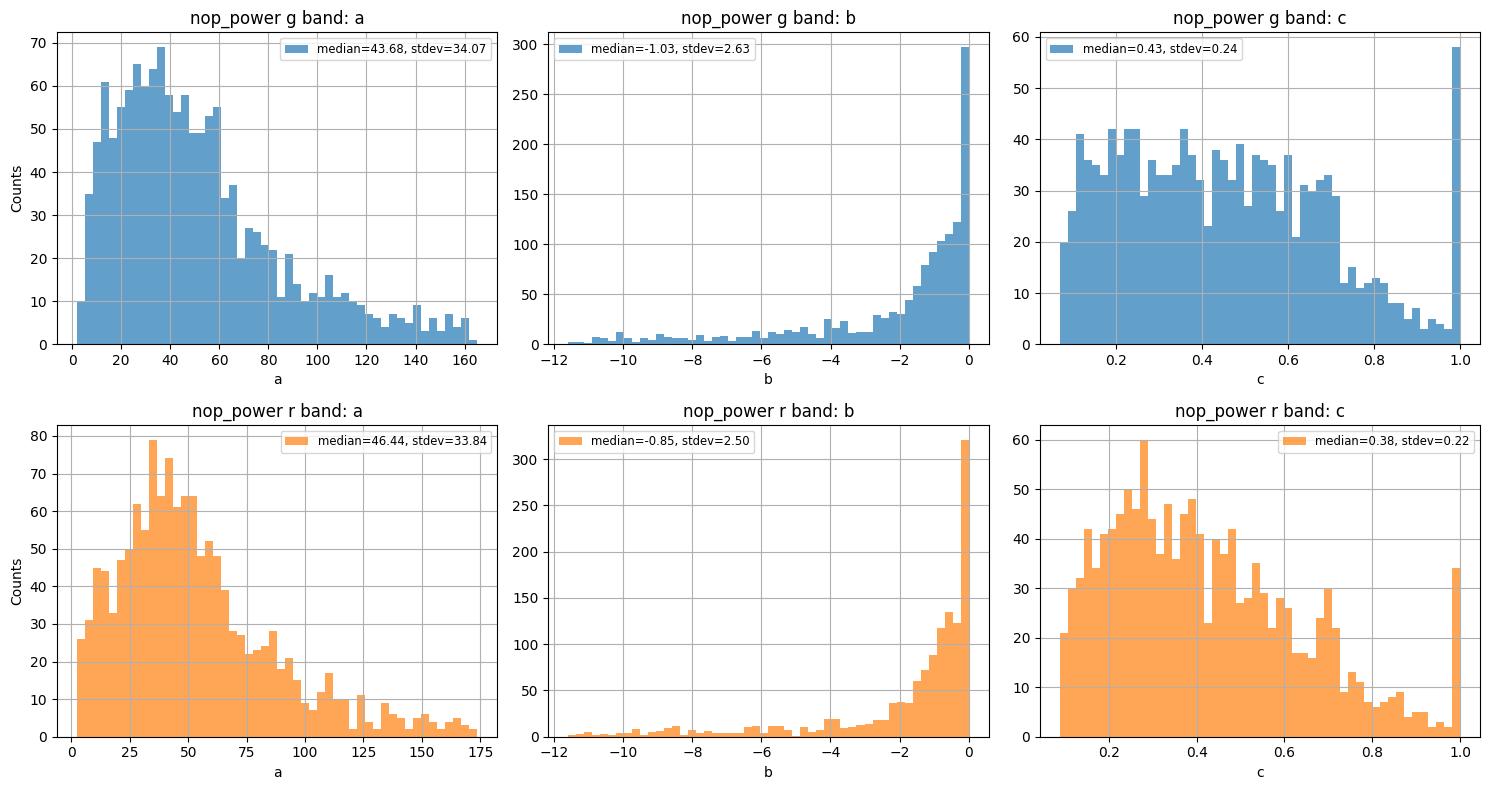

In [188]:
# Now power law
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

binning = 50

# Top row: g band parameters
nop_power_g_a_median, nop_power_g_a_stdev = np.median(nop_power_g_a), np.std(nop_power_g_a)
label = f'median={nop_power_g_a_median:.2f}, stdev={nop_power_g_a_stdev:.2f}'
axs[0, 0].hist(nop_power_g_a, bins=binning, color='C0', histtype='bar', alpha=0.7, label=label)
axs[0, 0].set_title('nop_power g band: a')
axs[0, 0].set_xlabel('a')
axs[0, 0].set_ylabel('Counts')
axs[0, 0].grid(True)
axs[0, 0].legend(fontsize='small')

nop_power_g_b_median, nop_power_g_b_stdev = np.median(nop_power_g_b), np.std(nop_power_g_b)
label = f'median={nop_power_g_b_median:.2f}, stdev={nop_power_g_b_stdev:.2f}'
axs[0, 1].hist(nop_power_g_b, bins=binning, color='C0', histtype='bar', alpha=0.7, label=label)
axs[0, 1].set_title('nop_power g band: b')
axs[0, 1].set_xlabel('b')
axs[0, 1].grid(True)
axs[0, 1].legend(fontsize='small')

nop_power_g_c_median, nop_power_g_c_stdev = np.median(nop_power_g_c), np.std(nop_power_g_c)
label = f'median={nop_power_g_c_median:.2f}, stdev={nop_power_g_c_stdev:.2f}'
axs[0, 2].hist(nop_power_g_c, bins=binning, color='C0', histtype='bar', alpha=0.7, label=label)
axs[0, 2].set_title('nop_power g band: c')
axs[0, 2].set_xlabel('c')
axs[0, 2].grid(True)
axs[0, 2].legend(fontsize='small')

# Bottom row: r band parameters
nop_power_r_a_median, nop_power_r_a_stdev = np.median(nop_power_r_a), np.std(nop_power_r_a)
label = f'median={nop_power_r_a_median:.2f}, stdev={nop_power_r_a_stdev:.2f}'
axs[1, 0].hist(nop_power_r_a, bins=binning, color='C1', histtype='bar', alpha=0.7, label=label)
axs[1, 0].set_title('nop_power r band: a')
axs[1, 0].set_xlabel('a')
axs[1, 0].set_ylabel('Counts')
axs[1, 0].grid(True)
axs[1, 0].legend(fontsize='small')

nop_power_r_b_median, nop_power_r_b_stdev = np.median(nop_power_r_b), np.std(nop_power_r_b)
label = f'median={nop_power_r_b_median:.2f}, stdev={nop_power_r_b_stdev:.2f}'
axs[1, 1].hist(nop_power_r_b, bins=binning, color='C1', histtype='bar', alpha=0.7, label=label)
axs[1, 1].set_title('nop_power r band: b')
axs[1, 1].set_xlabel('b')
axs[1, 1].grid(True)
axs[1, 1].legend(fontsize='small')

nop_power_r_c_median, nop_power_r_c_stdev = np.median(nop_power_r_c), np.std(nop_power_r_c)
label = f'median={nop_power_r_c_median:.2f}, stdev={nop_power_r_c_stdev:.2f}'
axs[1, 2].hist(nop_power_r_c, bins=binning, color='C1', histtype='bar', alpha=0.7, label=label)
axs[1, 2].set_title('nop_power r band: c')
axs[1, 2].set_xlabel('c')
axs[1, 2].grid(True)
axs[1, 2].legend(fontsize='small')

plt.tight_layout()
plt.show()

Now plotting all the above for "good" fits - defined by $\chi^2_\nu < 2.5$

In [189]:
maskMinredchi2 = pdf['reduced chi2'] < 2.5

good_fits = pdf[maskMinredchi2]

# gf stands for good fits
# Get sigmoid parametrs
gf_sigmoid_g_params = list(zip(
    good_fits.loc[(good_fits["model"] == "sigmoid") & (good_fits["filter"] == "g"), "a"],
    good_fits.loc[(good_fits["model"] == "sigmoid") & (good_fits["filter"] == "g"), "b"],
    good_fits.loc[(good_fits["model"] == "sigmoid") & (good_fits["filter"] == "g"), "c"]
))

gf_sigmoid_r_params = list(zip(
    good_fits.loc[(good_fits["model"] == "sigmoid") & (good_fits["filter"] == "r"), "a"],
    good_fits.loc[(good_fits["model"] == "sigmoid") & (good_fits["filter"] == "r"), "b"],
    good_fits.loc[(good_fits["model"] == "sigmoid") & (good_fits["filter"] == "r"), "c"]
))

# Get sigmoid evaluation metrics
gf_sigmoid_g_eval = list(zip(
    good_fits.loc[(good_fits["model"] == "sigmoid") & (good_fits["filter"] == "g"), "chi2"],
    good_fits.loc[(good_fits["model"] == "sigmoid") & (good_fits["filter"] == "g"), "reduced chi2"],
    good_fits.loc[(good_fits["model"] == "sigmoid") & (good_fits["filter"] == "g"), "p-value"]
))
gf_sigmoid_r_eval = list(zip(
    good_fits.loc[(good_fits["model"] == "sigmoid") & (good_fits["filter"] == "r"), "chi2"],
    good_fits.loc[(good_fits["model"] == "sigmoid") & (good_fits["filter"] == "r"), "reduced chi2"],
    good_fits.loc[(good_fits["model"] == "sigmoid") & (good_fits["filter"] == "r"), "p-value"]
))

gf_sigmoid_g_a, gf_sigmoid_g_b, gf_sigmoid_g_c = zip(*gf_sigmoid_g_params)
gf_sigmoid_r_a, gf_sigmoid_r_b, gf_sigmoid_r_c = zip(*gf_sigmoid_r_params)

(gf_sigmoid_g_chi2_vals, 
gf_sigmoid_g_reduced_chi2_vals, 
gf_sigmoid_g_p_vals) = clean_triplets(zip(*gf_sigmoid_g_eval))

(gf_sigmoid_r_chi2_vals, 
gf_sigmoid_r_reduced_chi2_vals, 
gf_sigmoid_r_p_vals) = clean_triplets(zip(*gf_sigmoid_r_eval))

# Get power parameters
gf_power_g_params = list(zip(
    good_fits.loc[(good_fits["model"] == "power") & (good_fits["filter"] == "g"), "a"],
    good_fits.loc[(good_fits["model"] == "power") & (good_fits["filter"] == "g"), "b"],
    good_fits.loc[(good_fits["model"] == "power") & (good_fits["filter"] == "g"), "c"]
))

gf_power_r_params = list(zip(
    good_fits.loc[(good_fits["model"] == "power") & (good_fits["filter"] == "r"), "a"],
    good_fits.loc[(good_fits["model"] == "power") & (good_fits["filter"] == "r"), "b"],
    good_fits.loc[(good_fits["model"] == "power") & (good_fits["filter"] == "r"), "c"]
))

gf_power_g_a, gf_power_g_b, gf_power_g_c = zip(*gf_power_g_params)
gf_power_r_a, gf_power_r_b, gf_power_r_c = zip(*gf_power_r_params)

# Get power evaluation metrics
gf_power_g_eval = list(zip(
    good_fits.loc[(good_fits["model"] == "power") & (good_fits["filter"] == "g"), "chi2"],
    good_fits.loc[(good_fits["model"] == "power") & (good_fits["filter"] == "g"), "reduced chi2"],
    good_fits.loc[(good_fits["model"] == "power") & (good_fits["filter"] == "g"), "p-value"]
))
gf_power_r_eval = list(zip(
    good_fits.loc[(good_fits["model"] == "power") & (good_fits["filter"] == "r"), "chi2"],
    good_fits.loc[(good_fits["model"] == "power") & (good_fits["filter"] == "r"), "reduced chi2"],
    good_fits.loc[(good_fits["model"] == "power") & (good_fits["filter"] == "r"), "p-value"]
))

(gf_power_g_chi2_vals, 
gf_power_g_reduced_chi2_vals, 
gf_power_g_p_vals) = clean_triplets(zip(*gf_power_g_eval))

(gf_power_r_chi2_vals, 
gf_power_r_reduced_chi2_vals, 
gf_power_r_p_vals) = clean_triplets(zip(*gf_power_r_eval))


First plotting the $\chi^2$, $\chi^2_\nu$, and p-value distributions again

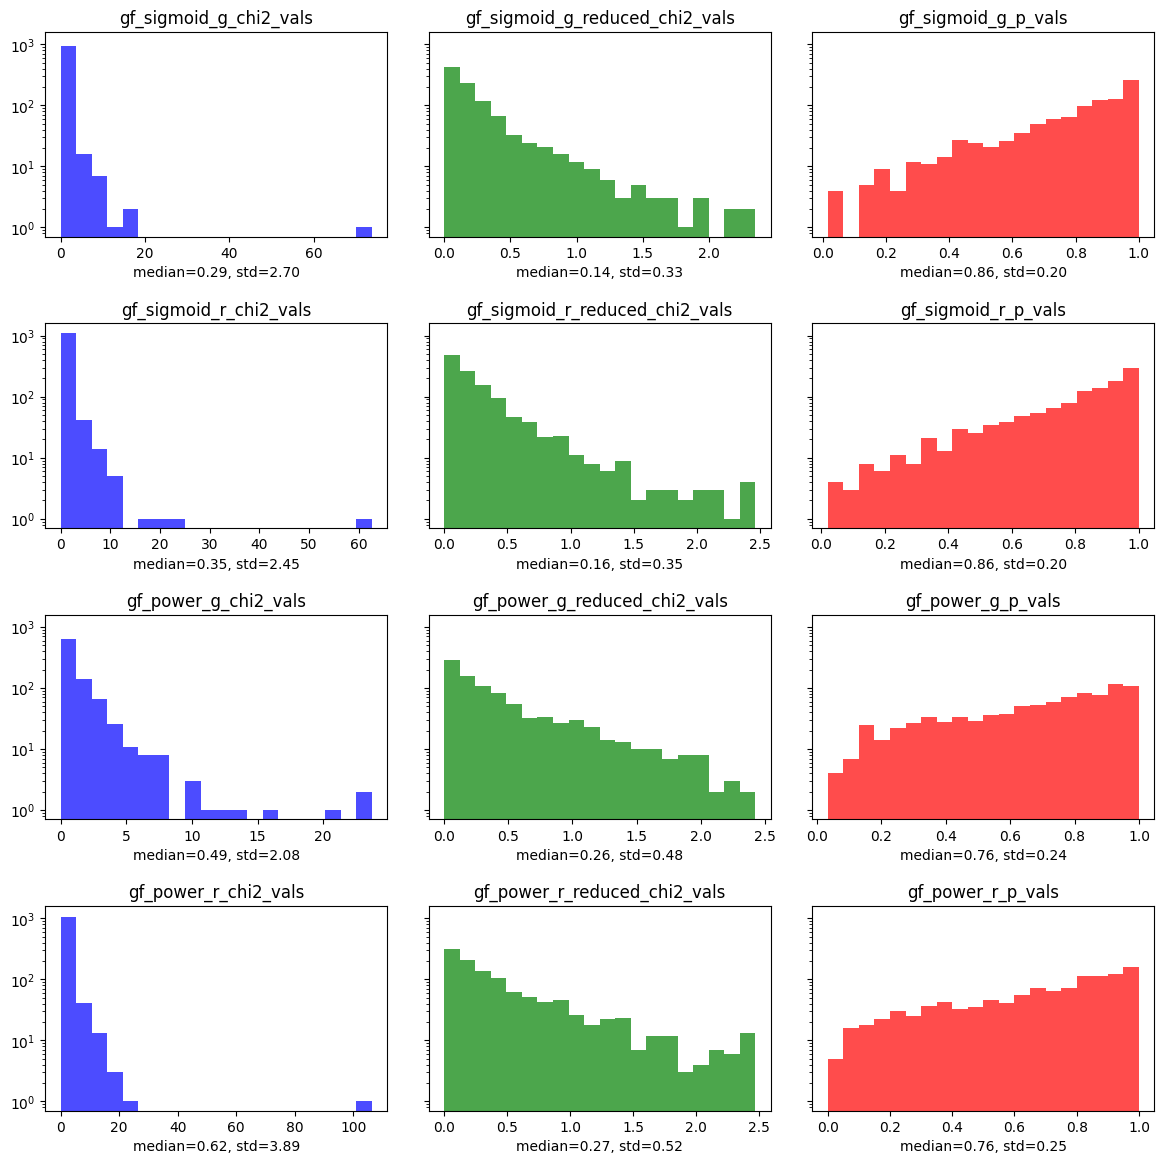

In [190]:
fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharey=True)

binning = 20

axes[0, 0].hist(gf_sigmoid_g_chi2_vals, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[0, 0].set_title("gf_sigmoid_g_chi2_vals")
axes[0, 0].set_xlabel(f"median={np.median(gf_sigmoid_g_chi2_vals):.2f}, std={np.std(gf_sigmoid_g_chi2_vals):.2f}")

axes[0, 1].hist(gf_sigmoid_g_reduced_chi2_vals, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[0, 1].set_title("gf_sigmoid_g_reduced_chi2_vals")
axes[0, 1].set_xlabel(f"median={np.median(gf_sigmoid_g_reduced_chi2_vals):.2f}, std={np.std(gf_sigmoid_g_reduced_chi2_vals):.2f}")

axes[0, 2].hist(gf_sigmoid_g_p_vals, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[0, 2].set_title("gf_sigmoid_g_p_vals")
axes[0, 2].set_xlabel(f"median={np.median(gf_sigmoid_g_p_vals):.2f}, std={np.std(gf_sigmoid_g_p_vals):.2f}")

axes[1, 0].hist(gf_sigmoid_r_chi2_vals, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[1, 0].set_title("gf_sigmoid_r_chi2_vals")
axes[1, 0].set_xlabel(f"median={np.median(gf_sigmoid_r_chi2_vals):.2f}, std={np.std(gf_sigmoid_r_chi2_vals):.2f}")

axes[1, 1].hist(gf_sigmoid_r_reduced_chi2_vals, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[1, 1].set_title("gf_sigmoid_r_reduced_chi2_vals")
axes[1, 1].set_xlabel(f"median={np.median(gf_sigmoid_r_reduced_chi2_vals):.2f}, std={np.std(gf_sigmoid_r_reduced_chi2_vals):.2f}")

axes[1, 2].hist(gf_sigmoid_r_p_vals, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[1, 2].set_title("gf_sigmoid_r_p_vals")
axes[1, 2].set_xlabel(f"median={np.median(gf_sigmoid_r_p_vals):.2f}, std={np.std(gf_sigmoid_r_p_vals):.2f}")

axes[2, 0].hist(gf_power_g_chi2_vals, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[2, 0].set_title("gf_power_g_chi2_vals")
axes[2, 0].set_xlabel(f"median={np.median(gf_power_g_chi2_vals):.2f}, std={np.std(gf_power_g_chi2_vals):.2f}")

axes[2, 1].hist(gf_power_g_reduced_chi2_vals, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[2, 1].set_title("gf_power_g_reduced_chi2_vals")
axes[2, 1].set_xlabel(f"median={np.median(gf_power_g_reduced_chi2_vals):.2f}, std={np.std(gf_power_g_reduced_chi2_vals):.2f}")

axes[2, 2].hist(gf_power_g_p_vals, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[2, 2].set_title("gf_power_g_p_vals")
axes[2, 2].set_xlabel(f"median={np.median(gf_power_g_p_vals):.2f}, std={np.std(gf_power_g_p_vals):.2f}")

axes[3, 0].hist(gf_power_r_chi2_vals, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[3, 0].set_title("gf_power_r_chi2_vals")
axes[3, 0].set_xlabel(f"median={np.median(gf_power_r_chi2_vals):.2f}, std={np.std(gf_power_r_chi2_vals):.2f}")

axes[3, 1].hist(gf_power_r_reduced_chi2_vals, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[3, 1].set_title("gf_power_r_reduced_chi2_vals")
axes[3, 1].set_xlabel(f"median={np.median(gf_power_r_reduced_chi2_vals):.2f}, std={np.std(gf_power_r_reduced_chi2_vals):.2f}")

axes[3, 2].hist(gf_power_r_p_vals, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[3, 2].set_title("gf_power_r_p_vals")
axes[3, 2].set_xlabel(f"median={np.median(gf_power_r_p_vals):.2f}, std={np.std(gf_power_r_p_vals):.2f}")

plt.yscale('log')
fig.tight_layout(pad=2.0, h_pad=1.5)
plt.show()

Now plotting all the parameters of the good fits

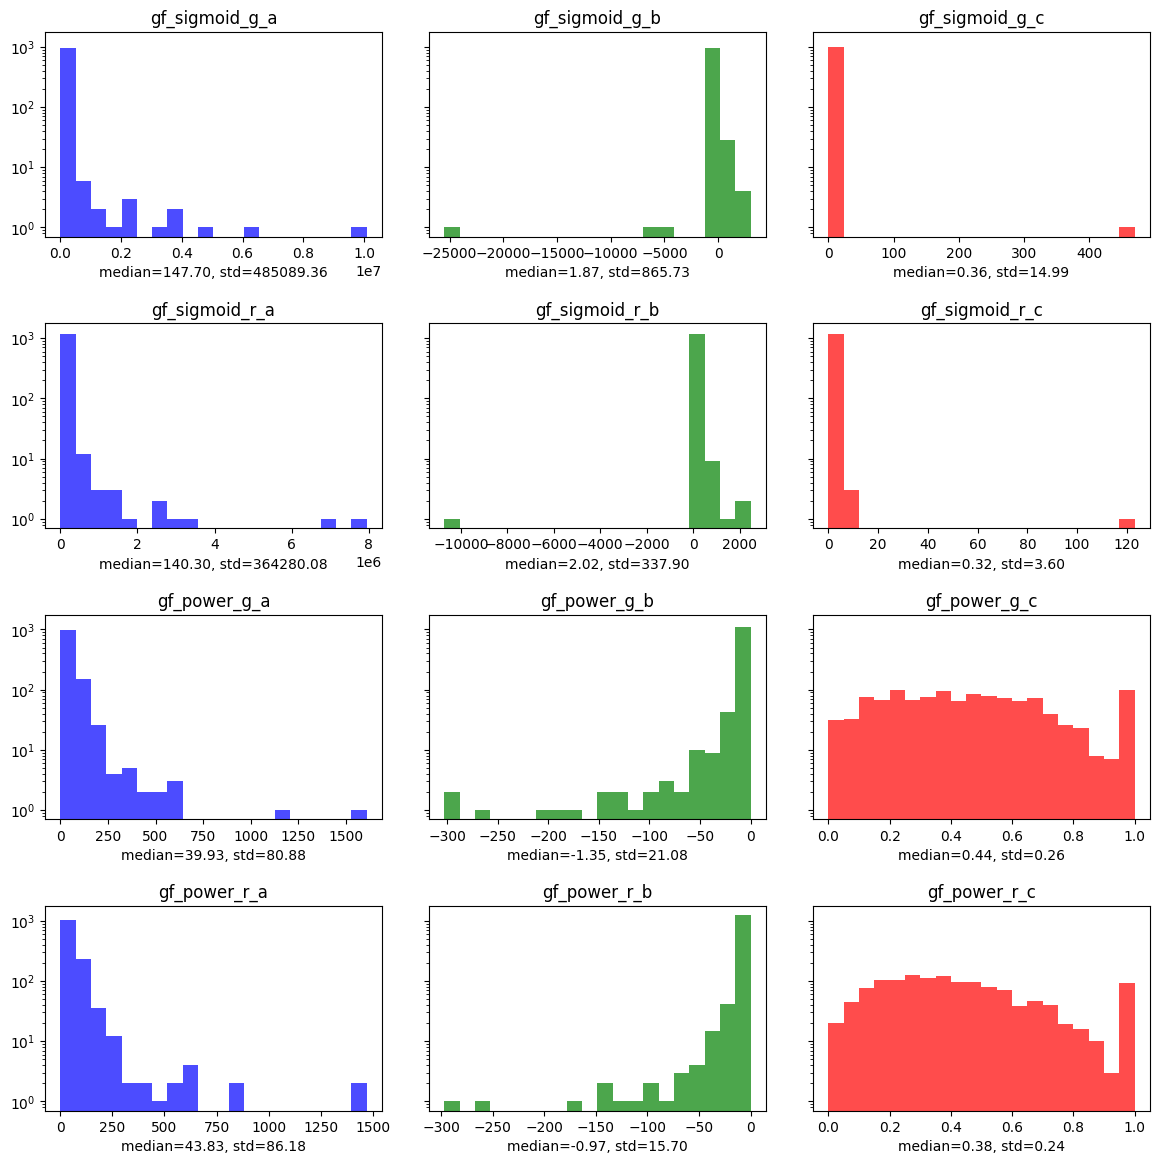

In [191]:
fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharey=True)

binning = 20

axes[0, 0].hist(gf_sigmoid_g_a, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[0, 0].set_title("gf_sigmoid_g_a")
axes[0, 0].set_xlabel(f"median={np.median(gf_sigmoid_g_a):.2f}, std={np.std(gf_sigmoid_g_a):.2f}")

axes[0, 1].hist(gf_sigmoid_g_b, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[0, 1].set_title("gf_sigmoid_g_b")
axes[0, 1].set_xlabel(f"median={np.median(gf_sigmoid_g_b):.2f}, std={np.std(gf_sigmoid_g_b):.2f}")

axes[0, 2].hist(gf_sigmoid_g_c, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[0, 2].set_title("gf_sigmoid_g_c")
axes[0, 2].set_xlabel(f"median={np.median(gf_sigmoid_g_c):.2f}, std={np.std(gf_sigmoid_g_c):.2f}")

axes[1, 0].hist(gf_sigmoid_r_a, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[1, 0].set_title("gf_sigmoid_r_a")
axes[1, 0].set_xlabel(f"median={np.median(gf_sigmoid_r_a):.2f}, std={np.std(gf_sigmoid_r_a):.2f}")

axes[1, 1].hist(gf_sigmoid_r_b, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[1, 1].set_title("gf_sigmoid_r_b")
axes[1, 1].set_xlabel(f"median={np.median(gf_sigmoid_r_b):.2f}, std={np.std(gf_sigmoid_r_b):.2f}")

axes[1, 2].hist(gf_sigmoid_r_c, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[1, 2].set_title("gf_sigmoid_r_c")
axes[1, 2].set_xlabel(f"median={np.median(gf_sigmoid_r_c):.2f}, std={np.std(gf_sigmoid_r_c):.2f}")

axes[2, 0].hist(gf_power_g_a, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[2, 0].set_title("gf_power_g_a")
axes[2, 0].set_xlabel(f"median={np.median(gf_power_g_a):.2f}, std={np.std(gf_power_g_a):.2f}")

axes[2, 1].hist(gf_power_g_b, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[2, 1].set_title("gf_power_g_b")
axes[2, 1].set_xlabel(f"median={np.median(gf_power_g_b):.2f}, std={np.std(gf_power_g_b):.2f}")

axes[2, 2].hist(gf_power_g_c, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[2, 2].set_title("gf_power_g_c")
axes[2, 2].set_xlabel(f"median={np.median(gf_power_g_c):.2f}, std={np.std(gf_power_g_c):.2f}")

axes[3, 0].hist(gf_power_r_a, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[3, 0].set_title("gf_power_r_a")
axes[3, 0].set_xlabel(f"median={np.median(gf_power_r_a):.2f}, std={np.std(gf_power_r_a):.2f}")

axes[3, 1].hist(gf_power_r_b, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[3, 1].set_title("gf_power_r_b")
axes[3, 1].set_xlabel(f"median={np.median(gf_power_r_b):.2f}, std={np.std(gf_power_r_b):.2f}")

axes[3, 2].hist(gf_power_r_c, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[3, 2].set_title("gf_power_r_c")
axes[3, 2].set_xlabel(f"median={np.median(gf_power_r_c):.2f}, std={np.std(gf_power_r_c):.2f}")

plt.yscale('log')
fig.tight_layout(pad=2.0, h_pad=1.5)
plt.show()

There are still some outlying parameters, so now removing those outliers and looking at the distributions

In [192]:
def remove_outliers(gf_params, lower_percentile=5, upper_percentile=95):
    gf_array = np.array(gf_params, dtype=float)  # shape: (n_samples, n_features)

    lower_bounds = np.percentile(gf_array, lower_percentile, axis=0)
    upper_bounds = np.percentile(gf_array, upper_percentile, axis=0)

    mask = (gf_array >= lower_bounds) & (gf_array <= upper_bounds)
    mask = np.all(mask, axis=1)

    return gf_array[mask]

# Removing gf sigmoid outlying paramaetrs
gf_nop_sigmoid_g_params = remove_outliers(gf_sigmoid_g_params)
gf_nop_sigmoid_r_params = remove_outliers(gf_sigmoid_r_params)
gf_nop_sigmoid_g_a, gf_nop_sigmoid_g_b, gf_nop_sigmoid_g_c = zip(*gf_nop_sigmoid_g_params)
gf_nop_sigmoid_r_a, gf_nop_sigmoid_r_b, gf_nop_sigmoid_r_c = zip(*gf_nop_sigmoid_r_params)

# Removing gf power law outlying parameters
gf_nop_power_g_params = remove_outliers(gf_power_g_params)
gf_nop_power_r_params = remove_outliers(gf_power_r_params)
gf_nop_power_g_a, gf_nop_power_g_b, gf_nop_power_g_c = zip(*gf_nop_power_g_params)
gf_nop_power_r_a, gf_nop_power_r_b, gf_nop_power_r_c = zip(*gf_nop_power_r_params)


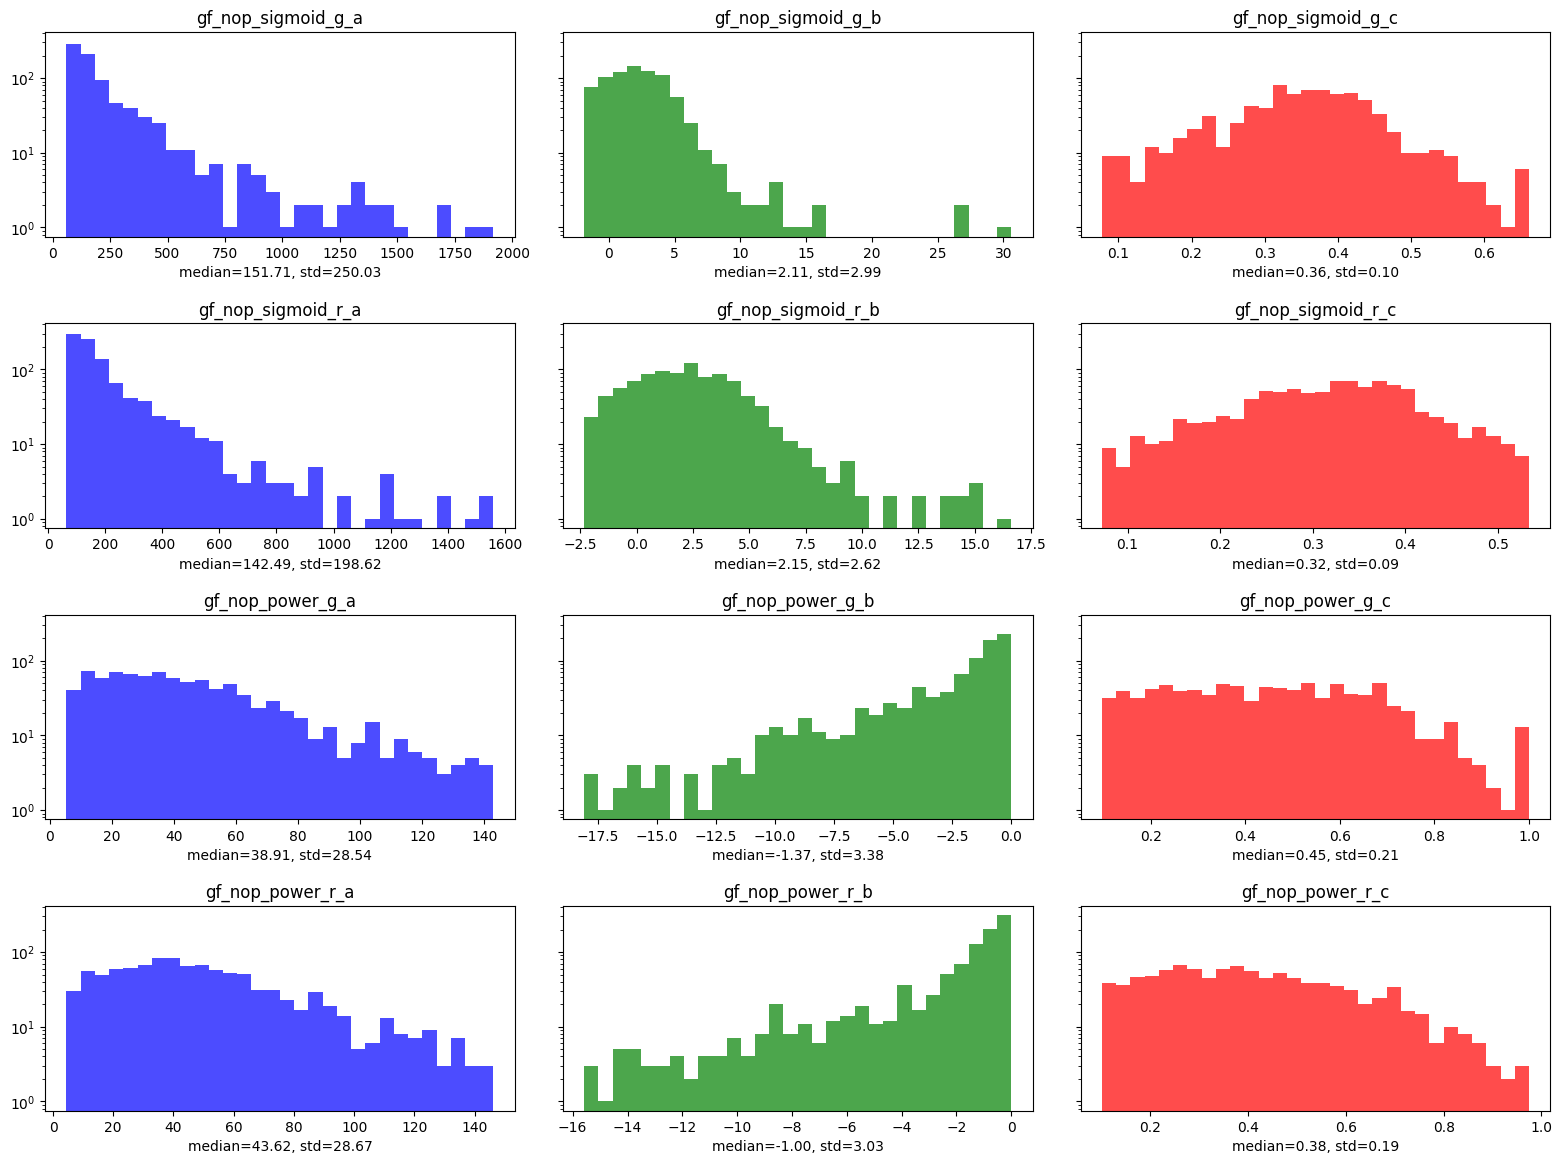

In [193]:
# Now plotting the good fit parameters with outliers removed
fig, axes = plt.subplots(4, 3, figsize=(16, 12), sharey=True)

binning = 30

axes[0, 0].hist(gf_nop_sigmoid_g_a, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[0, 0].set_title("gf_nop_sigmoid_g_a")
axes[0, 0].set_xlabel(f"median={np.median(gf_nop_sigmoid_g_a):.2f}, std={np.std(gf_nop_sigmoid_g_a):.2f}")

axes[0, 1].hist(gf_nop_sigmoid_g_b, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[0, 1].set_title("gf_nop_sigmoid_g_b")
axes[0, 1].set_xlabel(f"median={np.median(gf_nop_sigmoid_g_b):.2f}, std={np.std(gf_nop_sigmoid_g_b):.2f}")

axes[0, 2].hist(gf_nop_sigmoid_g_c, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[0, 2].set_title("gf_nop_sigmoid_g_c")
axes[0, 2].set_xlabel(f"median={np.median(gf_nop_sigmoid_g_c):.2f}, std={np.std(gf_nop_sigmoid_g_c):.2f}")

axes[1, 0].hist(gf_nop_sigmoid_r_a, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[1, 0].set_title("gf_nop_sigmoid_r_a")
axes[1, 0].set_xlabel(f"median={np.median(gf_nop_sigmoid_r_a):.2f}, std={np.std(gf_nop_sigmoid_r_a):.2f}")

axes[1, 1].hist(gf_nop_sigmoid_r_b, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[1, 1].set_title("gf_nop_sigmoid_r_b")
axes[1, 1].set_xlabel(f"median={np.median(gf_nop_sigmoid_r_b):.2f}, std={np.std(gf_nop_sigmoid_r_b):.2f}")

axes[1, 2].hist(gf_nop_sigmoid_r_c, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[1, 2].set_title("gf_nop_sigmoid_r_c")
axes[1, 2].set_xlabel(f"median={np.median(gf_nop_sigmoid_r_c):.2f}, std={np.std(gf_nop_sigmoid_r_c):.2f}")

axes[2, 0].hist(gf_nop_power_g_a, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[2, 0].set_title("gf_nop_power_g_a")
axes[2, 0].set_xlabel(f"median={np.median(gf_nop_power_g_a):.2f}, std={np.std(gf_nop_power_g_a):.2f}")

axes[2, 1].hist(gf_nop_power_g_b, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[2, 1].set_title("gf_nop_power_g_b")
axes[2, 1].set_xlabel(f"median={np.median(gf_nop_power_g_b):.2f}, std={np.std(gf_nop_power_g_b):.2f}")

axes[2, 2].hist(gf_nop_power_g_c, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[2, 2].set_title("gf_nop_power_g_c")
axes[2, 2].set_xlabel(f"median={np.median(gf_nop_power_g_c):.2f}, std={np.std(gf_nop_power_g_c):.2f}")

axes[3, 0].hist(gf_nop_power_r_a, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[3, 0].set_title("gf_nop_power_r_a")
axes[3, 0].set_xlabel(f"median={np.median(gf_nop_power_r_a):.2f}, std={np.std(gf_nop_power_r_a):.2f}")

axes[3, 1].hist(gf_nop_power_r_b, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[3, 1].set_title("gf_nop_power_r_b")
axes[3, 1].set_xlabel(f"median={np.median(gf_nop_power_r_b):.2f}, std={np.std(gf_nop_power_r_b):.2f}")

axes[3, 2].hist(gf_nop_power_r_c, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[3, 2].set_title("gf_nop_power_r_c")
axes[3, 2].set_xlabel(f"median={np.median(gf_nop_power_r_c):.2f}, std={np.std(gf_nop_power_r_c):.2f}")

plt.yscale('log')
fig.tight_layout(pad=2.0, h_pad=1.5)
plt.show()

Now looking at distribution of TNS classified objects, color changes, and bumps of all fits

In [194]:
unique_pdf = pdf.drop_duplicates(subset="object id", keep="first")
all_ids = pdf['object id'].unique().tolist()
num_ids = len(all_ids)

maskTNS = pdf["TNS classified"].isin(["SN Ia-91T-like", "SN Iax[02cx-like]", "SN Ia-pec", "SN Ia"])
tns_classified_ids = pdf.loc[maskTNS, "object id"].unique().tolist()
num_tns_classified_ids = len(tns_classified_ids)

single_color_ids = set(pdf.loc[pdf["color change"] == "single", "object id"])
bump_ids = set(pdf.loc[pdf["color change"] == "bump", "object id"])

tns_with_single_change = set(tns_classified_ids) & single_color_ids
tns_with_bump = set(tns_classified_ids) & bump_ids

print(f"Number of TNS classified ids: {num_tns_classified_ids}")
print(f"Percentage of TNS classified ids: {100 * num_tns_classified_ids / num_ids:.2f}%")
print(f"Number of ids with a single color change: {len(single_color_ids)}")
print(f"Percentage of ids with a single color change: {100 * len(single_color_ids) / num_ids:.2f}%")
print(f"Number of ids with a bump: {len(bump_ids)}")
print(f"Percentage of ids with a bump: {100 * len(bump_ids) / num_ids:.2f}%")
print(f"Number of TNS classified ids with a single color change: {len(tns_with_single_change)}")
print(f"Percentage of TNS classified ids with a single color change: {100 * len(tns_with_single_change) / num_tns_classified_ids:.2f}%")
print(f"Number of TNS classified ids with a bump: {len(tns_with_bump)}")
print(f"Percentage of TNS classified ids with a bump: {100 * len(tns_with_bump) / num_tns_classified_ids:.2f}%")
print(f"Percentage of all ids that are both TNS classified and have a single color change: {100 * len(tns_with_single_change) / num_ids:.2f}%")
print(f"Percentage of all ids that are both TNS classified and have a bump: {100 * len(tns_with_bump) / num_ids:.2f}%")


Number of TNS classified ids: 636
Percentage of TNS classified ids: 34.36%
Number of ids with a single color change: 568
Percentage of ids with a single color change: 30.69%
Number of ids with a bump: 255
Percentage of ids with a bump: 13.78%
Number of TNS classified ids with a single color change: 195
Percentage of TNS classified ids with a single color change: 30.66%
Number of TNS classified ids with a bump: 103
Percentage of TNS classified ids with a bump: 16.19%
Percentage of all ids that are both TNS classified and have a single color change: 10.53%
Percentage of all ids that are both TNS classified and have a bump: 5.56%


Now looking at distribution of TNS classified objets, color changes and bumps for the good fits with no outlying parameters

In [195]:
# Get lists of all objects that had a good fit with no outlying parameters for each model filter combination
gf_nop_sigmoid_g_set = set(map(tuple, gf_nop_sigmoid_g_params))

maskSigmoidg = (
    (pdf['model'] == 'sigmoid') &
    (pdf['filter'] == 'g') &
    pdf.apply(lambda row: (row['a'], row['b'], row['c']) in gf_nop_sigmoid_g_set, axis=1)
)

gf_nop_sigmoid_g_ids = pdf.loc[maskSigmoidg, 'object id'].unique()

gf_nop_sigmoid_r_set = set(map(tuple, gf_nop_sigmoid_r_params))

maskSigmoidr = (
    (pdf['model'] == 'sigmoid') &
    (pdf['filter'] == 'r') &
    pdf.apply(lambda row: (row['a'], row['b'], row['c']) in gf_nop_sigmoid_r_set, axis=1)
)

gf_nop_sigmoid_r_ids = pdf.loc[maskSigmoidr, 'object id'].unique()

gf_nop_power_g_set = set(map(tuple, gf_nop_power_g_params))

maskPowerg = (
    (pdf['model'] == 'power') &
    (pdf['filter'] == 'g') &
    pdf.apply(lambda row: (row['a'], row['b'], row['c']) in gf_nop_power_g_set, axis=1)
)

gf_nop_power_g_ids = pdf.loc[maskPowerg, 'object id'].unique()

gf_nop_power_r_set = set(map(tuple, gf_nop_power_r_params))

maskPowerr = (
    (pdf['model'] == 'power') &
    (pdf['filter'] == 'r') &
    pdf.apply(lambda row: (row['a'], row['b'], row['c']) in gf_nop_power_r_set, axis=1)
)

gf_nop_power_r_ids = pdf.loc[maskPowerr, 'object id'].unique()

print(len(gf_nop_sigmoid_g_ids))
print(len(gf_nop_sigmoid_r_ids))

print(len(gf_nop_power_g_ids))
print(len(gf_nop_power_r_ids))


798
960
916
1013


In [196]:
# Now look at common elements of sets above

gf_nop_sigmoid_both_bands = set(gf_nop_sigmoid_g_ids) & set(gf_nop_sigmoid_r_ids)
gf_nop_power_both_bands = set(gf_nop_power_g_ids) & set(gf_nop_power_r_ids)

gf_nop_sigmoid_power_g = set(gf_nop_sigmoid_g_ids) & set(gf_nop_power_g_ids)
gf_nop_sigmoid_power_r = set(gf_nop_sigmoid_r_ids) & set(gf_nop_power_r_ids)

gf_nop_all = set(gf_nop_sigmoid_g_ids) & set(gf_nop_sigmoid_r_ids) & set(gf_nop_power_g_ids) & set(gf_nop_power_r_ids)

print(len(gf_nop_sigmoid_both_bands))
print(len(gf_nop_power_both_bands))
print(len(gf_nop_sigmoid_power_g))
print(len(gf_nop_sigmoid_power_r))
print(len(gf_nop_all))

593
579
582
721
360


In [197]:
print(f"Percentage of objects with good NOP sigmoid fits to both bands that are TNS classified: {100 * len(gf_nop_sigmoid_both_bands & set(tns_classified_ids)) / num_ids:.2f}")
print(f"Percentage of objects with good NOP power fits to both bands that are TNS classified: {100 * len(gf_nop_power_both_bands & set(tns_classified_ids)) / num_ids:.2f}")

print(f"Percentage of objects with good NOP fits for both models on the g band that are TNS classified: {100 * len(gf_nop_sigmoid_power_g & set(tns_classified_ids)) / num_ids:.2f}")
print(f"Percentage of objects with good NOP fits for both models on the r band that are TNS classified: {100 * len(gf_nop_sigmoid_power_r & set(tns_classified_ids)) / num_ids:.2f}")

print(f"Percentage of objects that had where both models had good NOP fits on both bands that are TNS classified: {100 * len(gf_nop_all & set(tns_classified_ids)) / num_ids:.2f}")

Percentage of objects with good NOP sigmoid fits to both bands that are TNS classified: 16.10
Percentage of objects with good NOP power fits to both bands that are TNS classified: 11.45
Percentage of objects with good NOP fits for both models on the g band that are TNS classified: 13.78
Percentage of objects with good NOP fits for both models on the r band that are TNS classified: 15.72
Percentage of objects that had where both models had good NOP fits on both bands that are TNS classified: 8.70


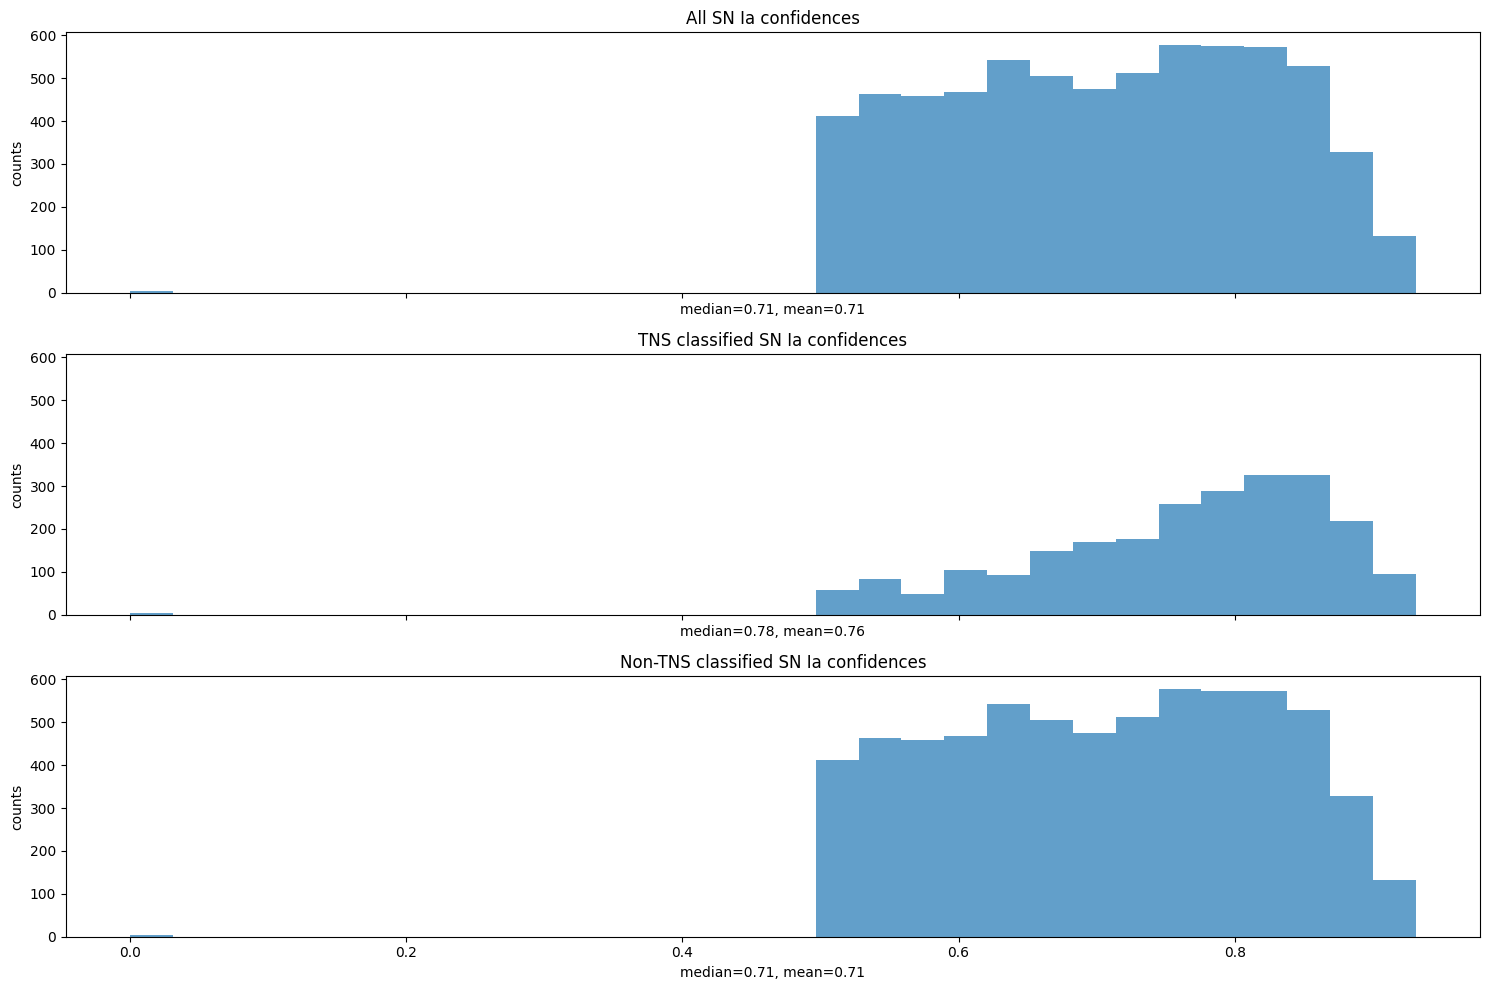

In [198]:
# Looking the distribution of the SNIa confidence scores for all objects, TNS classified objects, and non TNS classified objects.

snia_confidences = list(pdf["snia confidence"])

maskTNS = (pdf["TNS classified"] == 'SN Ia') | (pdf["TNS classified"] == 'SN Ia-91T-like') | (pdf['TNS classified'] == 'SN Iax[02cx-like]') | (pdf['TNS classified'] == 'SN Ia-pec')
maskNonTNS = (pdf["TNS classified"] != 'SN Ia') | (pdf["TNS classified"] != 'SN Ia-91T-like') | (pdf['TNS classified'] != 'SN Iax[02cx-like]') | (pdf['TNS classified'] != 'SN Ia-pec')
snia_tns_confidences = list(pdf[maskTNS]["snia confidence"])
snia_non_tns_confidences =list(pdf[maskNonTNS]["snia confidence"])
binning = 30

fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True, sharey=True)

axes[0].hist(snia_confidences, bins=binning, histtype='bar', alpha=0.7)
axes[0].set_ylabel("counts")
axes[0].set_title("All SN Ia confidences")
axes[0].set_xlabel(f"median={np.median(snia_confidences):.2f}, mean={np.mean(snia_confidences):.2f}")

axes[1].hist(snia_tns_confidences, bins=binning, histtype='bar', alpha=0.7)
axes[1].set_ylabel("counts")
axes[1].set_title("TNS classified SN Ia confidences")
axes[1].set_xlabel(f"median={np.median(snia_tns_confidences):.2f}, mean={np.mean(snia_tns_confidences):.2f}")

axes[2].hist(snia_non_tns_confidences, bins=binning, histtype='bar', alpha=0.7)
axes[2].set_ylabel("counts")
axes[2].set_title("Non-TNS classified SN Ia confidences")
axes[2].set_xlabel(f"median={np.median(snia_non_tns_confidences):.2f}, mean={np.mean(snia_non_tns_confidences):.2f}")

plt.tight_layout()
plt.show()


Now plotting histograms of the parameters of TNS classified objects

In [199]:
tns_sigmoid_g_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'sigmoid' and filt == 'g' and ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

tns_sigmoid_r_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'sigmoid' and filt == 'r' and ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

tns_power_g_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'power' and filt == 'g' and ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

tns_power_r_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'power' and filt == 'r' and ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

tns_sigmoid_g_a, tns_sigmoid_g_b, tns_sigmoid_g_c = zip(*tns_sigmoid_g_params)
tns_sigmoid_r_a, tns_sigmoid_r_b, tns_sigmoid_r_c = zip(*tns_sigmoid_r_params)

tns_power_g_a, tns_power_g_b, tns_power_g_c = zip(*tns_power_g_params)
tns_power_r_a, tns_power_r_b, tns_power_r_c = zip(*tns_power_r_params)

In [200]:
# still some outliers so now removing those
tns_nop_sigmoid_g_params = remove_outliers(tns_sigmoid_g_params, lower_percentile=15, upper_percentile=85)
tns_nop_sigmoid_r_params = remove_outliers(tns_sigmoid_r_params, lower_percentile=15, upper_percentile=85)
tns_nop_sigmoid_g_a, tns_nop_sigmoid_g_b, tns_nop_sigmoid_g_c = zip(*tns_nop_sigmoid_g_params)
tns_nop_sigmoid_r_a, tns_nop_sigmoid_r_b, tns_nop_sigmoid_r_c = zip(*tns_nop_sigmoid_r_params)

tns_nop_power_g_params = remove_outliers(tns_power_g_params, lower_percentile=15, upper_percentile=85)
tns_nop_power_r_params = remove_outliers(tns_power_r_params, lower_percentile=15, upper_percentile=85)
tns_nop_power_g_a, tns_nop_power_g_b, tns_nop_power_g_c = zip(*tns_nop_power_g_params)
tns_nop_power_r_a, tns_nop_power_r_b, tns_nop_power_r_c = zip(*tns_nop_power_r_params)

In [201]:
non_tns_sigmoid_g_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'sigmoid' and filt == 'g' and not ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

non_tns_sigmoid_r_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'sigmoid' and filt == 'r' and not ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

non_tns_power_g_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'power' and filt == 'g' and not ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

non_tns_power_r_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'power' and filt == 'r' and not ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

non_tns_sigmoid_g_a, non_tns_sigmoid_g_b, non_tns_sigmoid_g_c = zip(*non_tns_sigmoid_g_params)
non_tns_sigmoid_r_a, non_tns_sigmoid_r_b, non_tns_sigmoid_r_c = zip(*non_tns_sigmoid_r_params)

non_tns_power_g_a, non_tns_power_g_b, non_tns_power_g_c = zip(*non_tns_power_g_params)
non_tns_power_r_a, non_tns_power_r_b, non_tns_power_r_c = zip(*non_tns_power_r_params)

non_tns_nop_sigmoid_g_params = remove_outliers(non_tns_sigmoid_g_params, lower_percentile=5, upper_percentile=95)
non_tns_nop_sigmoid_r_params = remove_outliers(non_tns_sigmoid_r_params, lower_percentile=5, upper_percentile=95)
non_tns_nop_sigmoid_g_a, non_tns_nop_sigmoid_g_b, non_tns_nop_sigmoid_g_c = zip(*non_tns_nop_sigmoid_g_params)
non_tns_nop_sigmoid_r_a, non_tns_nop_sigmoid_r_b, non_tns_nop_sigmoid_r_c = zip(*non_tns_nop_sigmoid_r_params)

non_tns_nop_power_g_params = remove_outliers(non_tns_power_g_params, lower_percentile=5, upper_percentile=95)
non_tns_nop_power_r_params = remove_outliers(non_tns_power_r_params, lower_percentile=5, upper_percentile=95)
non_tns_nop_power_g_a, non_tns_nop_power_g_b, non_tns_nop_power_g_c = zip(*non_tns_nop_power_g_params)
non_tns_nop_power_r_a, non_tns_nop_power_r_b, non_tns_nop_power_r_c = zip(*non_tns_nop_power_r_params)

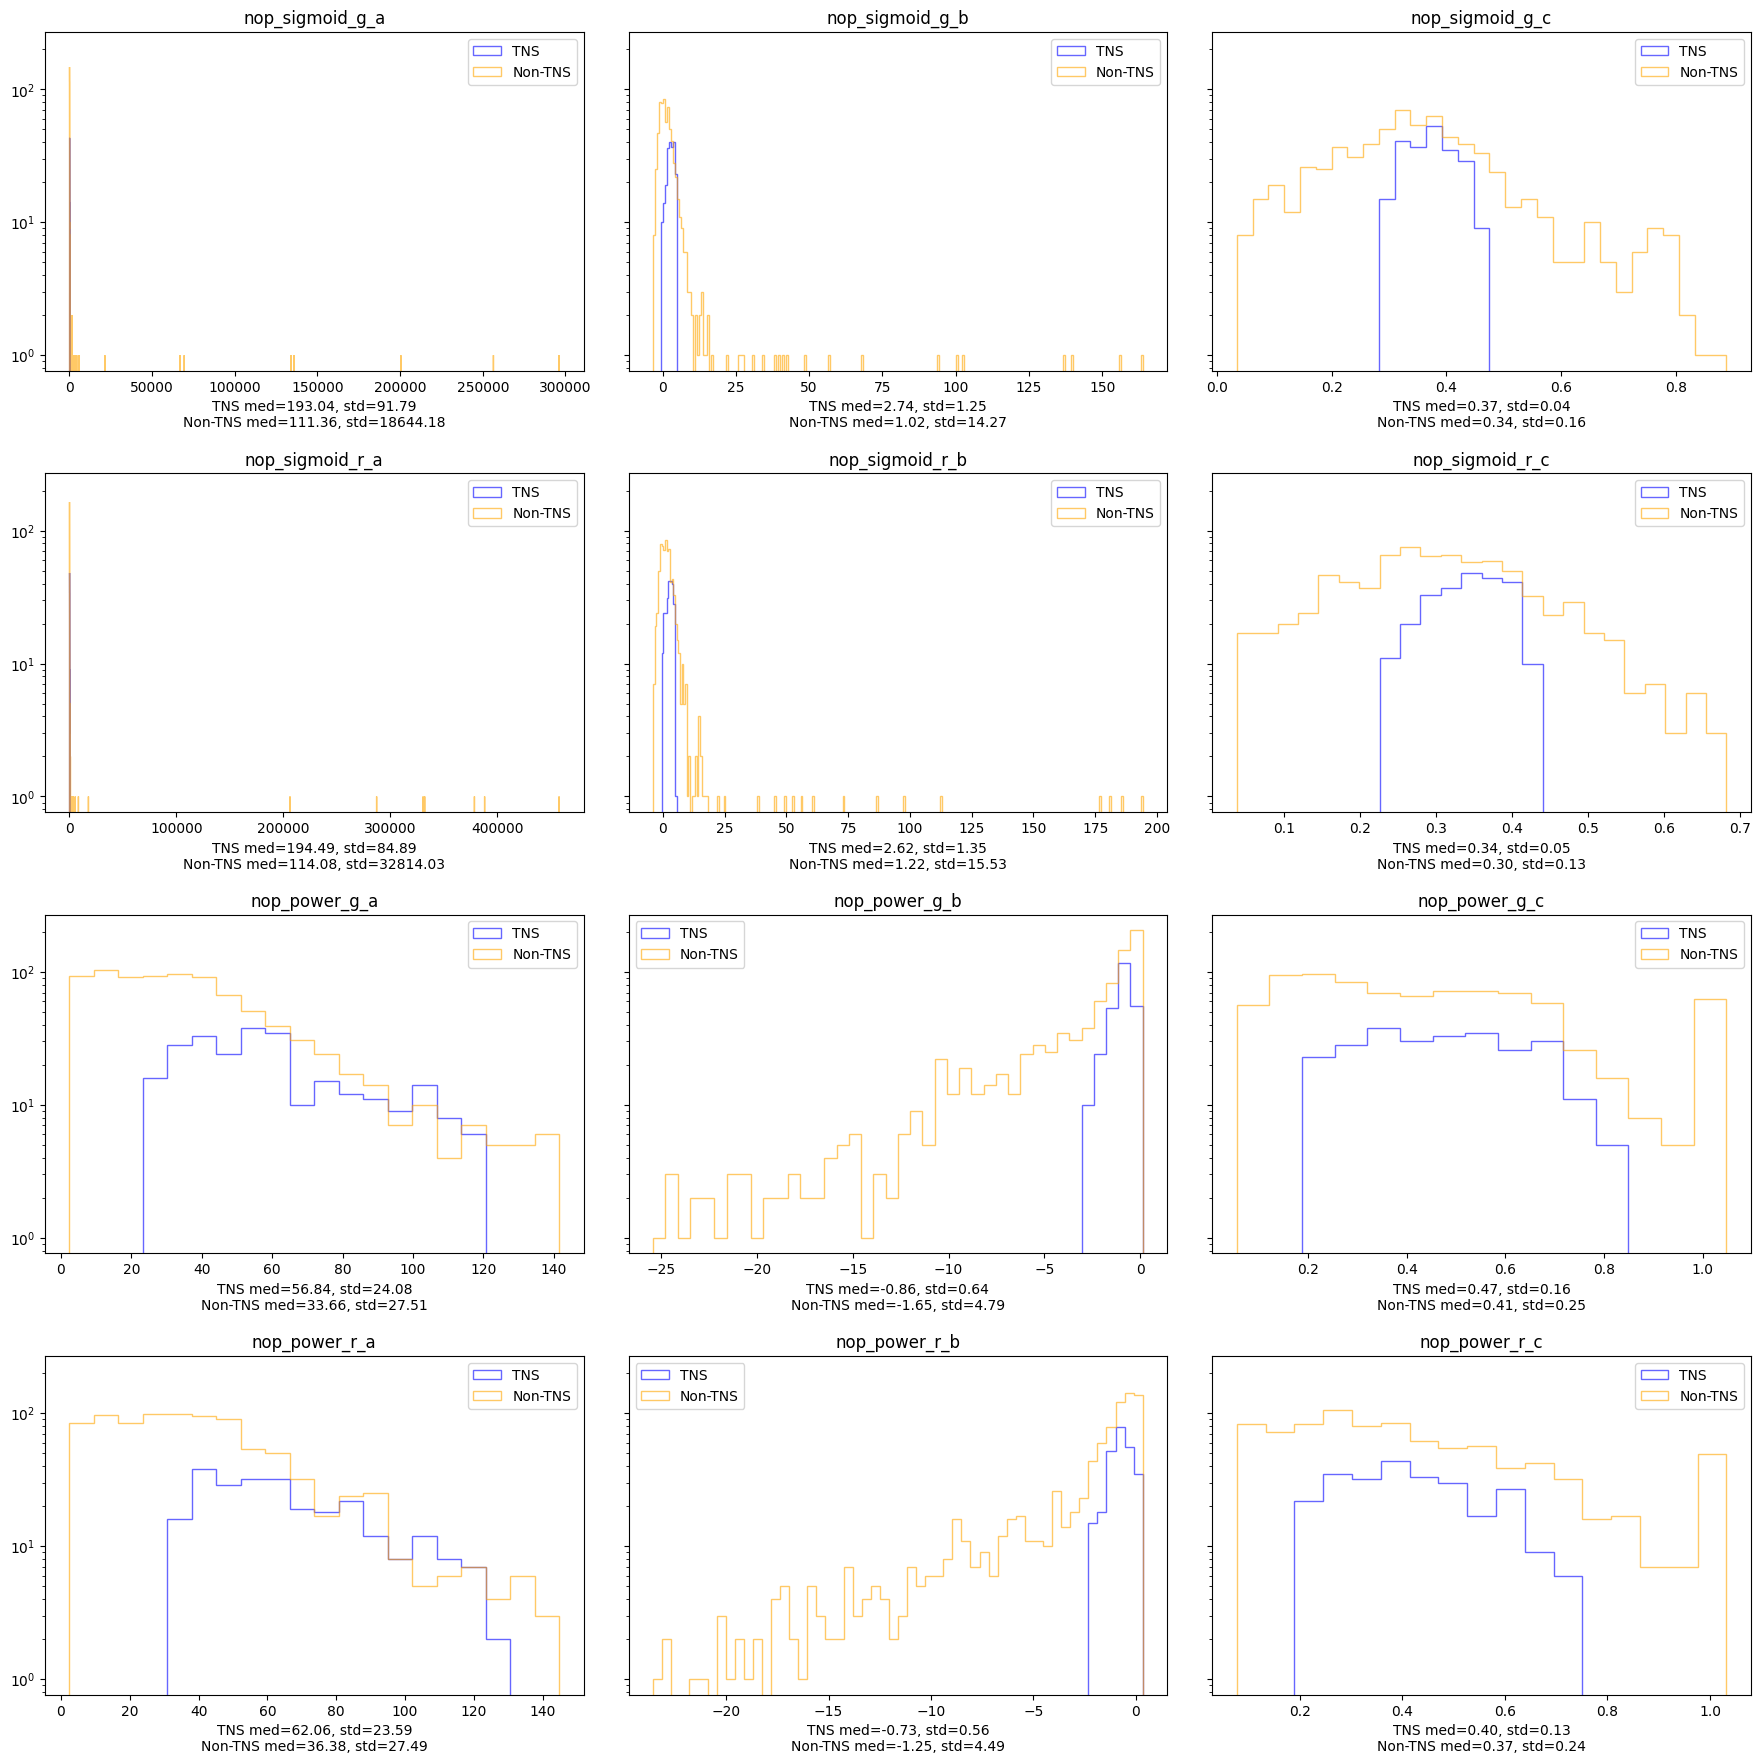

In [202]:
fig, axes = plt.subplots(4, 3, figsize=(18, 18), sharey=True)


data_pairs = [
    (tns_nop_sigmoid_g_a, non_tns_nop_sigmoid_g_a, "nop_sigmoid_g_a", False),
    (tns_nop_sigmoid_g_b, non_tns_nop_sigmoid_g_b, "nop_sigmoid_g_b", False),
    (tns_nop_sigmoid_g_c, non_tns_nop_sigmoid_g_c, "nop_sigmoid_g_c", False),
    (tns_nop_sigmoid_r_a, non_tns_nop_sigmoid_r_a, "nop_sigmoid_r_a", False),
    (tns_nop_sigmoid_r_b, non_tns_nop_sigmoid_r_b, "nop_sigmoid_r_b", False),
    (tns_nop_sigmoid_r_c, non_tns_nop_sigmoid_r_c, "nop_sigmoid_r_c", False),
    (tns_nop_power_g_a, non_tns_nop_power_g_a, "nop_power_g_a", False),
    (tns_nop_power_g_b, non_tns_nop_power_g_b, "nop_power_g_b", False),
    (tns_nop_power_g_c, non_tns_nop_power_g_c, "nop_power_g_c", False),
    (tns_nop_power_r_a, non_tns_nop_power_r_a, "nop_power_r_a", False),
    (tns_nop_power_r_b, non_tns_nop_power_r_b, "nop_power_r_b", False),
    (tns_nop_power_r_c, non_tns_nop_power_r_c, "nop_power_r_c", False),
]

for ax, (tns_data, non_tns_data, title, x_log) in zip(axes.flat, data_pairs):

    datasets = [np.array(tns_data), np.array(non_tns_data)]

    q25, q75 = np.percentile(np.concatenate(datasets), [25, 75])
    iqr = q75 - q25
    bin_width = 2 * iqr / (len(np.concatenate(datasets)) ** (1/3))
    
    data_min = min(np.min(d) for d in datasets)
    data_max = max(np.max(d) for d in datasets)
    binning = np.arange(data_min, data_max + bin_width, bin_width)

    ax.hist(tns_data, bins=binning, color='blue', alpha=0.6, label='TNS', histtype='step')
    ax.hist(non_tns_data, bins=binning, color='orange', alpha=0.6, label='Non-TNS', histtype='step')
    
    ax.set_title(title)
    
    tns_median, tns_std = np.median(tns_data), np.std(tns_data)
    non_tns_median, non_tns_std = np.median(non_tns_data), np.std(non_tns_data)
    

    ax.set_xlabel(
        f"TNS med={tns_median:.2f}, std={tns_std:.2f}\n"
        f"Non-TNS med={non_tns_median:.2f}, std={non_tns_std:.2f}"
    )

    if x_log:
        ax.set_xscale("log")
    
    ax.legend()

fig.tight_layout(pad=2.0, h_pad=1.5)
plt.yscale('log')
plt.show()


Plotting the evaluation metrics for TNS classified vs non classified objects

In [203]:
tns_sigmoid_g_eval = [
    eval_vals for (_, model, filt, tns_class, _), eval_vals in eval_dict.items()
    if model == 'sigmoid' and filt == 'g' and ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

tns_sigmoid_r_eval = [
    eval_vals for (_, model, filt, tns_class, _), eval_vals in eval_dict.items()
    if model == 'sigmoid' and filt == 'r' and ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

tns_power_g_eval = [
    eval_vals for (_, model, filt, tns_class, _), eval_vals in eval_dict.items()
    if model == 'power' and filt == 'g' and ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

tns_power_r_eval = [
    eval_vals for (_, model, filt, tns_class, _), eval_vals in eval_dict.items()
    if model == 'power' and filt == 'r' and ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

tns_sigmoid_g_chi2_vals, tns_sigmoid_g_reduced_chi2_vals, tns_sigmoid_g_p_vals = zip(*tns_sigmoid_g_eval)
tns_sigmoid_r_chi2_vals, tns_sigmoid_r_reduced_chi2_vals, tns_sigmoid_r_p_vals = zip(*tns_sigmoid_r_eval)
tns_power_g_chi2_vals, tns_power_g_reduced_chi2_vals, tns_power_g_p_vals = zip(*tns_power_g_eval)
tns_power_r_chi2_vals, tns_power_r_reduced_chi2_vals, tns_power_r_p_vals = zip(*tns_power_r_eval)


(tns_sigmoid_g_chi2_vals,
 tns_sigmoid_g_reduced_chi2_vals,
 tns_sigmoid_g_p_vals) = clean_triplets((tns_sigmoid_g_chi2_vals,
                                     tns_sigmoid_g_reduced_chi2_vals,
                                     tns_sigmoid_g_p_vals))

(tns_sigmoid_r_chi2_vals,
 tns_sigmoid_r_reduced_chi2_vals,
 tns_sigmoid_r_p_vals) = clean_triplets((tns_sigmoid_r_chi2_vals,
                                     tns_sigmoid_r_reduced_chi2_vals,
                                     tns_sigmoid_r_p_vals))

(tns_power_g_chi2_vals,
 tns_power_g_reduced_chi2_vals,
 tns_power_g_p_vals) = clean_triplets((tns_power_g_chi2_vals,
                                   tns_power_g_reduced_chi2_vals,
                                   tns_power_g_p_vals))

(tns_power_r_chi2_vals,
 tns_power_r_reduced_chi2_vals,
 tns_power_r_p_vals) = clean_triplets((tns_power_r_chi2_vals,
                                   tns_power_r_reduced_chi2_vals,
                                   tns_power_r_p_vals))


non_tns_sigmoid_g_eval = [
    eval_vals for (_, model, filt, tns_class, _), eval_vals in eval_dict.items()
    if model == 'sigmoid' and filt == 'g' and not ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

non_tns_sigmoid_r_eval = [
    eval_vals for (_, model, filt, tns_class, _), eval_vals in eval_dict.items()
    if model == 'sigmoid' and filt == 'r' and not ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

non_tns_power_g_eval = [
    eval_vals for (_, model, filt, tns_class, _), eval_vals in eval_dict.items()
    if model == 'power' and filt == 'g' and not ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

non_tns_power_r_eval = [
    eval_vals for (_, model, filt, tns_class, _), eval_vals in eval_dict.items()
    if model == 'power' and filt == 'r' and not ((tns_class == 'SN Ia') | (tns_class == 'SN Ia-91T-like') | (tns_class == 'SN Iax[02cx-like]') | (tns_class == 'SN Ia-pec'))
]

non_tns_sigmoid_g_chi2_vals, non_tns_sigmoid_g_reduced_chi2_vals, non_tns_sigmoid_g_p_vals = zip(*non_tns_sigmoid_g_eval)
non_tns_sigmoid_r_chi2_vals, non_tns_sigmoid_r_reduced_chi2_vals, non_tns_sigmoid_r_p_vals = zip(*non_tns_sigmoid_r_eval)
non_tns_power_g_chi2_vals, non_tns_power_g_reduced_chi2_vals, non_tns_power_g_p_vals = zip(*non_tns_power_g_eval)
non_tns_power_r_chi2_vals, non_tns_power_r_reduced_chi2_vals, non_tns_power_r_p_vals = zip(*non_tns_power_r_eval)

(non_tns_sigmoid_g_chi2_vals,
 non_tns_sigmoid_g_reduced_chi2_vals,
 non_tns_sigmoid_g_p_vals) = clean_triplets((non_tns_sigmoid_g_chi2_vals,
                                     non_tns_sigmoid_g_reduced_chi2_vals,
                                     non_tns_sigmoid_g_p_vals))

(non_tns_sigmoid_r_chi2_vals,
 non_tns_sigmoid_r_reduced_chi2_vals,
 non_tns_sigmoid_r_p_vals) = clean_triplets((non_tns_sigmoid_r_chi2_vals,
                                     non_tns_sigmoid_r_reduced_chi2_vals,
                                     non_tns_sigmoid_r_p_vals))
(non_tns_power_g_chi2_vals,
 non_tns_power_g_reduced_chi2_vals,
 non_tns_power_g_p_vals) = clean_triplets((non_tns_power_g_chi2_vals,
                                   non_tns_power_g_reduced_chi2_vals,
                                   non_tns_power_g_p_vals))

(non_tns_power_r_chi2_vals,
 non_tns_power_r_reduced_chi2_vals,
 non_tns_power_r_p_vals) = clean_triplets((non_tns_power_r_chi2_vals,
                                   non_tns_power_r_reduced_chi2_vals,
                                   non_tns_power_r_p_vals))

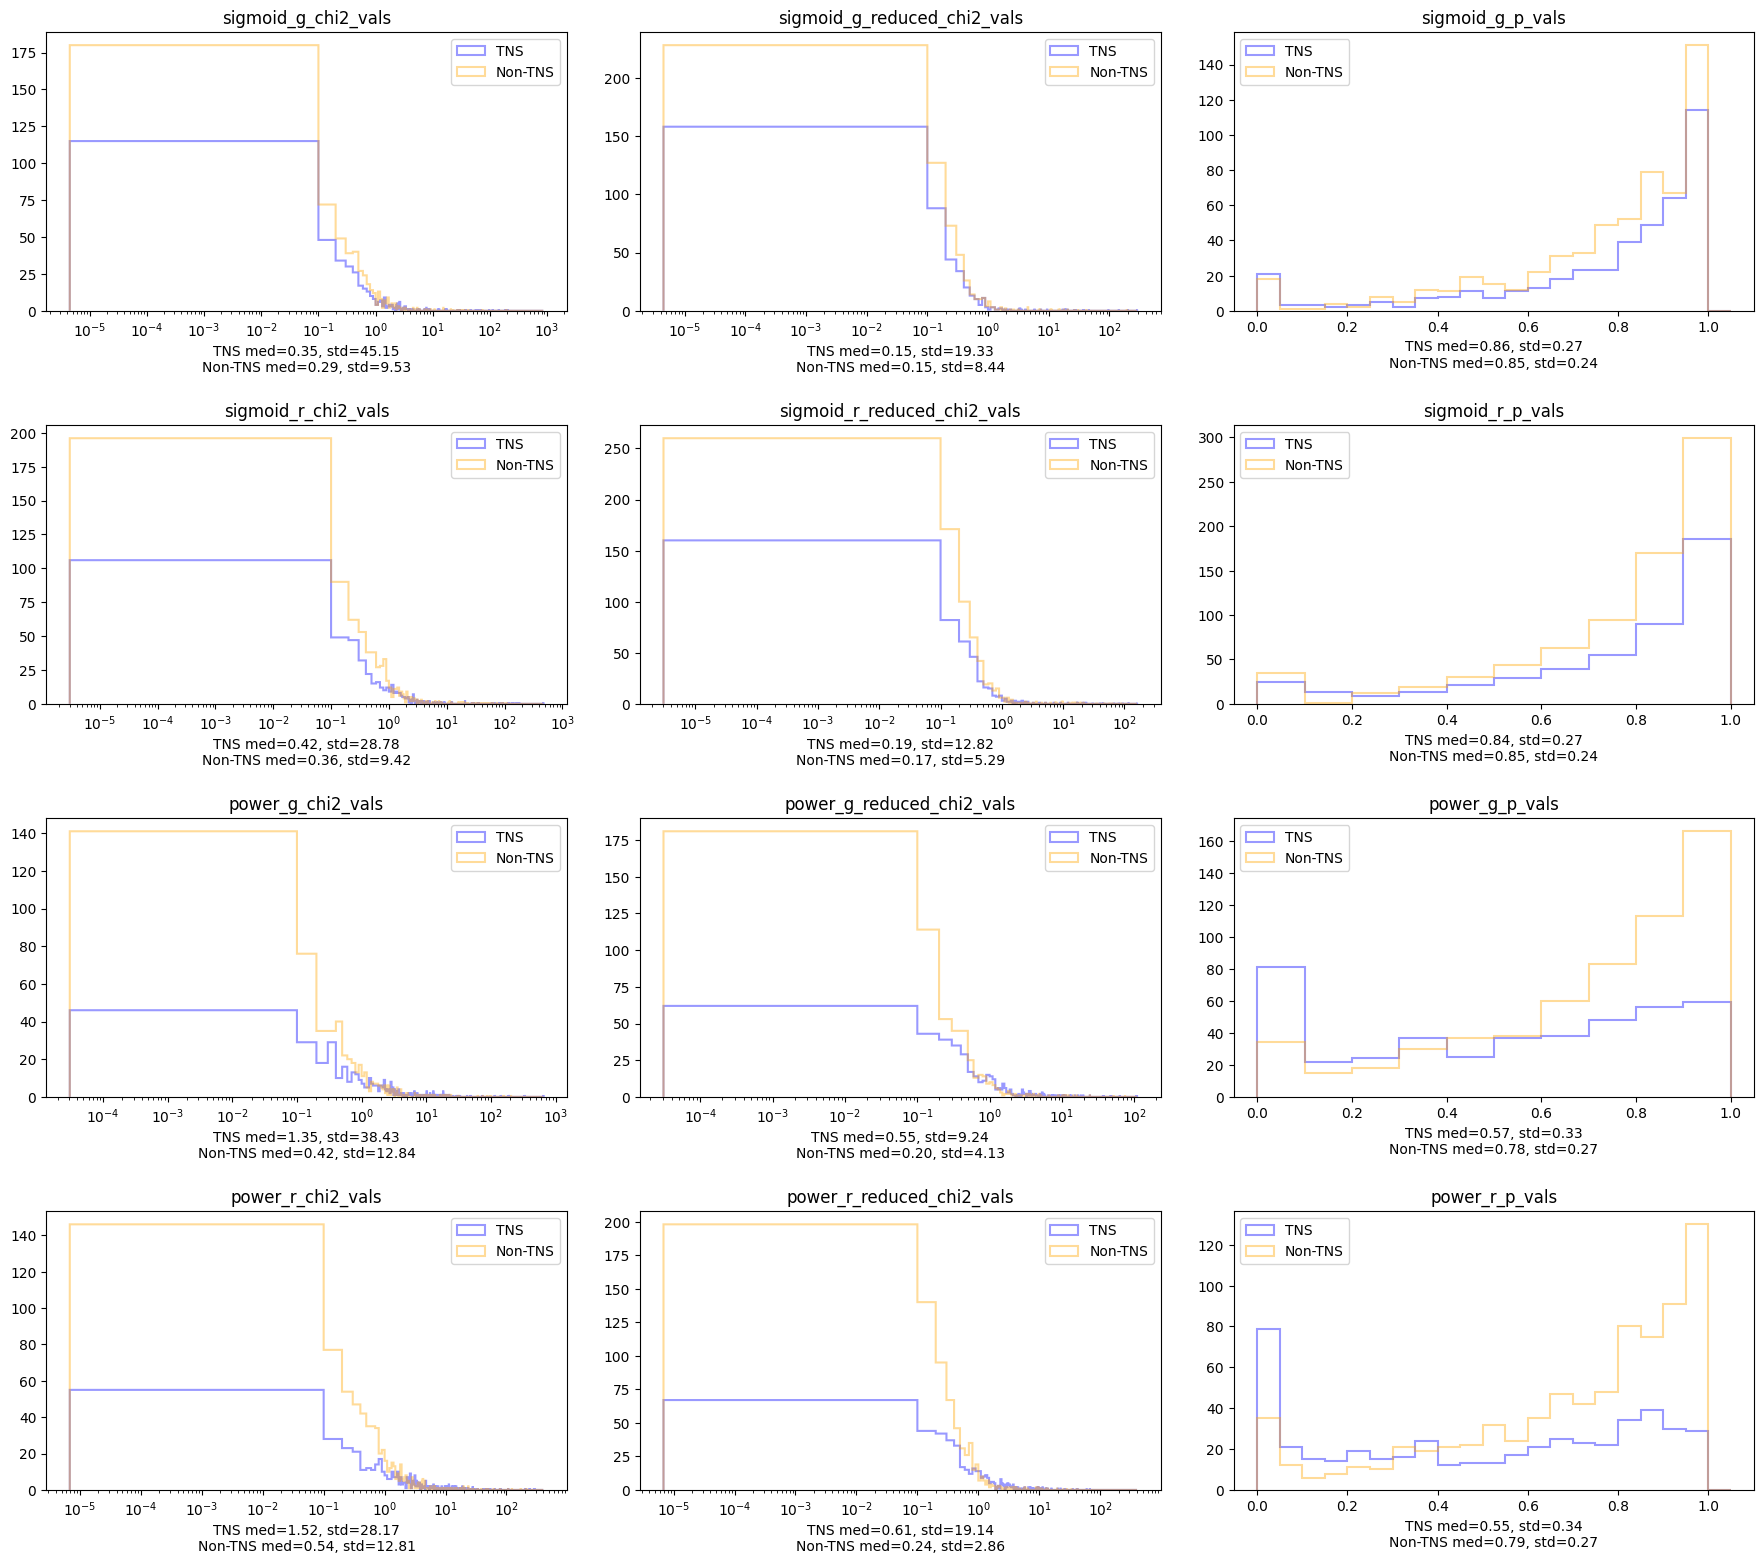

In [204]:
fig, axes = plt.subplots(4, 3, figsize=(18, 16))

data_pairs = [
    (tns_sigmoid_g_chi2_vals, non_tns_sigmoid_g_chi2_vals, "sigmoid_g_chi2_vals", 0.1, True),
    (tns_sigmoid_g_reduced_chi2_vals, non_tns_sigmoid_g_reduced_chi2_vals, "sigmoid_g_reduced_chi2_vals", 0.1, True),
    (tns_sigmoid_g_p_vals, non_tns_sigmoid_g_p_vals, "sigmoid_g_p_vals", 0.05, False),
    (tns_sigmoid_r_chi2_vals,non_tns_sigmoid_r_chi2_vals, "sigmoid_r_chi2_vals", 0.1, True),
    (tns_sigmoid_r_reduced_chi2_vals, non_tns_sigmoid_r_reduced_chi2_vals, "sigmoid_r_reduced_chi2_vals", 0.1, True),
    (tns_sigmoid_r_p_vals, non_tns_sigmoid_r_p_vals, "sigmoid_r_p_vals", 0.1, False),
    (tns_power_g_chi2_vals, non_tns_power_g_chi2_vals, "power_g_chi2_vals", 0.1, True),
    (tns_power_g_reduced_chi2_vals, non_tns_power_g_reduced_chi2_vals, "power_g_reduced_chi2_vals", 0.1, True),
    (tns_power_g_p_vals, non_tns_power_g_p_vals, "power_g_p_vals", 0.1, False),
    (tns_power_r_chi2_vals, non_tns_power_r_chi2_vals, "power_r_chi2_vals", 0.1, True),
    (tns_power_r_reduced_chi2_vals, non_tns_power_r_reduced_chi2_vals, "power_r_reduced_chi2_vals", 0.1, True),
    (tns_power_r_p_vals, non_tns_power_r_p_vals, "power_r_p_vals", 0.05, False),
]

tns_color = 'blue'
non_tns_color = 'orange'

for ax, (tns_data, non_tns_data, title, step_width, tail) in zip(axes.flat, data_pairs):

    data_min = min(np.min(tns_data), np.min(non_tns_data))
    data_max = max(np.max(tns_data), np.max(non_tns_data))
    
    binning = np.arange(data_min, data_max + bin_width, step_width)

    ax.hist(
        tns_data, bins=binning, color=tns_color, alpha=0.4, 
        histtype='step', edgecolor=tns_color, linewidth=1.5, label='TNS'
    )
    
    ax.hist(
        non_tns_data, bins=binning, color=non_tns_color, alpha=0.4, 
        histtype='step', edgecolor=non_tns_color, linewidth=1.5, label='Non-TNS'
    )
    
    ax.set_title(title)
    
    tns_median, tns_std = np.median(tns_data), np.std(tns_data)
    non_tns_median, non_tns_std = np.median(non_tns_data), np.std(non_tns_data)
    
    ax.set_xlabel(
        f"TNS med={tns_median:.2f}, std={tns_std:.2f}\n"
        f"Non-TNS med={non_tns_median:.2f}, std={non_tns_std:.2f}"
    )
    
    if tail:
        ax.set_xscale('log')

    ax.legend()

fig.tight_layout(pad=2.0)
plt.show()


In general 

Now plotting the parameter distributions for single color change and bumps

In [205]:
lower_percentile = 10
upper_percentile = 90
single_sigmoid_g_params = [
    params for (_, model, filt, _, color), params in params_dict.items()
    if model == 'sigmoid' and filt == 'g' and color == 'single'
]

single_sigmoid_r_params = [
    params for (_, model, filt, _, color), params in params_dict.items()
    if model == 'sigmoid' and filt == 'r' and color == 'single'
]
single_power_g_params = [
    params for (_, model, filt, _, color), params in params_dict.items()
    if model == 'power' and filt == 'g' and color == 'single'
]

single_power_r_params = [
    params for (_, model, filt, _, color), params in params_dict.items()
    if model == 'power' and filt == 'r' and color == 'single'
]

single_sigmoid_g_a, single_sigmoid_g_b, single_sigmoid_g_c = zip(*remove_outliers(single_sigmoid_g_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
single_sigmoid_r_a, single_sigmoid_r_b, single_sigmoid_r_c = zip(*remove_outliers(single_sigmoid_r_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))

single_power_g_a, single_power_g_b, single_power_g_c = zip(*remove_outliers(single_power_g_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
single_power_r_a, single_power_r_b, single_power_r_c = zip(*remove_outliers(single_power_r_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))

bump_sigmoid_g_params = [
    params for (_, model, filt, _, color), params in params_dict.items()
    if model == 'sigmoid' and filt == 'g' and color == 'bump'
]

bump_sigmoid_r_params = [
    params for (_, model, filt, _, color), params in params_dict.items()
    if model == 'sigmoid' and filt == 'r' and color == 'bump'
]

bump_power_g_params = [
    params for (_, model, filt, _, color), params in params_dict.items()
    if model == 'power' and filt == 'g' and color == 'bump'
]

bump_power_r_params = [
    params for (_, model, filt, _, color), params in params_dict.items()
    if model == 'power' and filt == 'r' and color == 'bump'
]

bump_sigmoid_g_a, bump_sigmoid_g_b, bump_sigmoid_g_c = zip(*remove_outliers(bump_sigmoid_g_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
bump_sigmoid_r_a, bump_sigmoid_r_b, bump_sigmoid_r_c = zip(*remove_outliers(bump_sigmoid_r_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))

bump_power_g_a, bump_power_g_b, bump_power_g_c = zip(*remove_outliers(bump_power_g_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
bump_power_r_a, bump_power_r_b, bump_power_r_c = zip(*remove_outliers(bump_power_r_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))

none_sigmoid_g_params = [
    params for (_, model, filt, _, color), params in params_dict.items()
    if model == 'sigmoid' and filt == 'g' and color == 'none'
]

none_sigmoid_r_params = [
    params for (_, model, filt, _, color), params in params_dict.items()
    if model == 'sigmoid' and filt == 'r' and color == 'none'
]
none_power_g_params = [
    params for (_, model, filt, _, color), params in params_dict.items()
    if model == 'power' and filt == 'g' and color == 'none'
]

none_power_r_params = [
    params for (_, model, filt, _, color), params in params_dict.items()
    if model == 'power' and filt == 'r' and color == 'none'
]

none_sigmoid_g_a, none_sigmoid_g_b, none_sigmoid_g_c = zip(*remove_outliers(none_sigmoid_g_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
none_sigmoid_r_a, none_sigmoid_r_b, none_sigmoid_r_c = zip(*remove_outliers(none_sigmoid_r_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))

none_power_g_a, none_power_g_b, none_power_g_c = zip(*remove_outliers(none_power_g_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
none_power_r_a, none_power_r_b, none_power_r_c = zip(*remove_outliers(none_power_r_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))

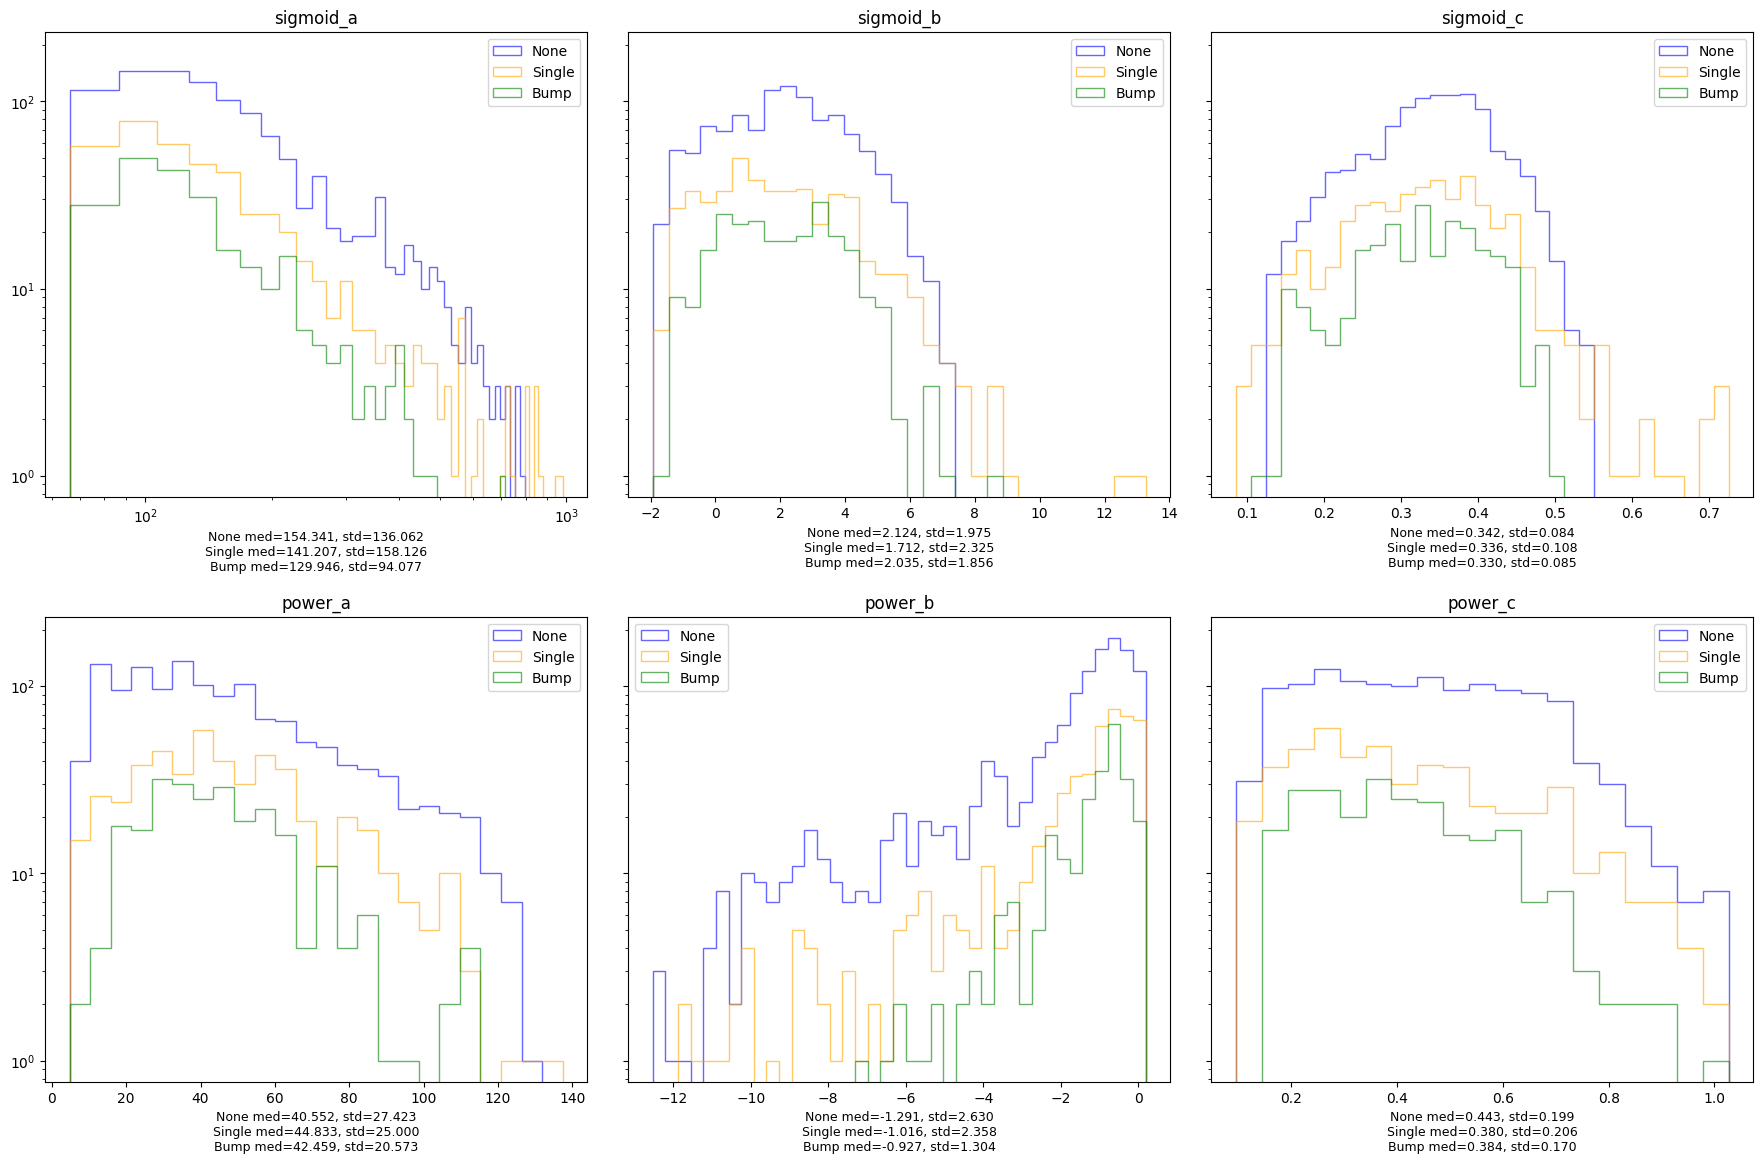

In [206]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)

# Triplets: (none_g, none_r, single_g, single_r, bump_g, bump_r, title, x_log)
data_triplets = [
    (none_sigmoid_g_a, none_sigmoid_r_a,
     single_sigmoid_g_a, single_sigmoid_r_a,
     bump_sigmoid_g_a, bump_sigmoid_r_a,
     "sigmoid_a", True),

    (none_sigmoid_g_b, none_sigmoid_r_b,
     single_sigmoid_g_b, single_sigmoid_r_b,
     bump_sigmoid_g_b, bump_sigmoid_r_b,
     "sigmoid_b", False),

    (none_sigmoid_g_c, none_sigmoid_r_c,
     single_sigmoid_g_c, single_sigmoid_r_c,
     bump_sigmoid_g_c, bump_sigmoid_r_c,
     "sigmoid_c", False),

    (none_power_g_a, none_power_r_a,
     single_power_g_a, single_power_r_a,
     bump_power_g_a, bump_power_r_a,
     "power_a", False),

    (none_power_g_b, none_power_r_b,
     single_power_g_b, single_power_r_b,
     bump_power_g_b, bump_power_r_b,
     "power_b", False),

    (none_power_g_c, none_power_r_c,
     single_power_g_c, single_power_r_c,
     bump_power_g_c, bump_power_r_c,
     "power_c", False),
]

for ax, (none_g, none_r, single_g, single_r, bump_g, bump_r, title, x_log) in zip(axes.flat, data_triplets):

    # Combine g and r for each category
    data_none = np.concatenate([np.array(none_g), np.array(none_r)])
    data_single = np.concatenate([np.array(single_g), np.array(single_r)])
    data_bump = np.concatenate([np.array(bump_g), np.array(bump_r)])

    datasets = [data_none, data_single, data_bump]

    # Freedman–Diaconis bin width
    q25, q75 = np.percentile(np.concatenate(datasets), [25, 75])
    iqr = q75 - q25
    if iqr == 0:
        bin_width = (np.max(np.concatenate(datasets)) - np.min(np.concatenate(datasets))) / 50
    else:
        bin_width = 2 * iqr / (len(np.concatenate(datasets)) ** (1/3))

    data_min = min(np.min(d) for d in datasets)
    data_max = max(np.max(d) for d in datasets)
    bins = np.arange(data_min, data_max + bin_width, bin_width)

    colors = ['blue', 'orange', 'green']
    labels = ['None', 'Single', 'Bump']

    for d, c, l in zip(datasets, colors, labels):
        ax.hist(d, bins=bins, color=c, alpha=0.6, label=l, histtype='step')

    ax.set_title(title)

    # Stats for each dataset
    stat_lines = []
    for lbl, d in zip(labels, datasets):
        stat_lines.append(f"{lbl} med={np.median(d):.3f}, std={np.std(d):.3f}")

    ax.set_xlabel("\n".join(stat_lines), fontsize=9)

    if x_log:
        ax.set_xscale("log")

    ax.legend()

fig.tight_layout(pad=2.0, h_pad=1.5)
plt.yscale('log')
plt.show()


In [207]:
single_sigmoid_g_eval_vals = [
    eval_vals for (_, model, filt, _, color), eval_vals in eval_dict.items()
    if model == 'sigmoid' and filt == 'g' and color == 'single'
]

single_sigmoid_r_eval_vals = [
    eval_vals for (_, model, filt, _, color), eval_vals in eval_dict.items()
    if model == 'sigmoid' and filt == 'r' and color == 'single'
]
single_power_g_eval_vals = [
    eval_vals for (_, model, filt, _, color), eval_vals in eval_dict.items()
    if model == 'power' and filt == 'g' and color == 'single'
]

single_power_r_eval_vals = [
    eval_vals for (_, model, filt, _, color), eval_vals in eval_dict.items()
    if model == 'power' and filt == 'r' and color == 'single'
]

single_sigmoid_g_chi2_vals, single_sigmoid_g_reduced_chi2_vals, single_sigmoid_g_p_vals= clean_triplets(zip(*single_sigmoid_g_eval_vals))
single_sigmoid_r_chi2_vals, single_sigmoid_r_reduced_chi2_vals, single_sigmoid_r_p_vals = clean_triplets(zip(*single_sigmoid_r_eval_vals))

single_power_g_chi2_vals, single_power_g_reduced_chi2_vals, single_power_g_p_vals= clean_triplets(zip(*single_power_g_eval_vals))
single_power_r_chi2_vals, single_power_r_reduced_chi2_vals, single_power_r_p_vals = clean_triplets(zip(*single_power_r_eval_vals))

bump_sigmoid_g_eval_vals = [
    eval_vals for (_, model, filt, _, color), eval_vals in eval_dict.items()
    if model == 'sigmoid' and filt == 'g' and color == 'bump'
]

bump_sigmoid_r_eval_vals = [
    eval_vals for (_, model, filt, _, color), eval_vals in eval_dict.items()
    if model == 'sigmoid' and filt == 'r' and color == 'bump'
]

bump_power_g_eval_vals = [
    eval_vals for (_, model, filt, _, color), eval_vals in eval_dict.items()
    if model == 'power' and filt == 'g' and color == 'bump'
]

bump_power_r_eval_vals = [
    eval_vals for (_, model, filt, _, color), eval_vals in eval_dict.items()
    if model == 'power' and filt == 'r' and color == 'bump'
]

bump_sigmoid_g_chi2_vals, bump_sigmoid_g_reduced_chi2_vals, bump_sigmoid_g_p_vals= clean_triplets(zip(*bump_sigmoid_g_eval_vals))
bump_sigmoid_r_chi2_vals, bump_sigmoid_r_reduced_chi2_vals, bump_sigmoid_r_p_vals = clean_triplets(zip(*bump_sigmoid_r_eval_vals))

bump_power_g_chi2_vals, bump_power_g_reduced_chi2_vals, bump_power_g_p_vals= clean_triplets(zip(*bump_power_g_eval_vals))
bump_power_r_chi2_vals, bump_power_r_reduced_chi2_vals, bump_power_r_p_vals = clean_triplets(zip(*bump_power_r_eval_vals))

none_sigmoid_g_eval_vals = [
    eval_vals for (_, model, filt, _, color), eval_vals in eval_dict.items()
    if model == 'sigmoid' and filt == 'g' and color == 'none'
]

none_sigmoid_r_eval_vals = [
    eval_vals for (_, model, filt, _, color), eval_vals in eval_dict.items()
    if model == 'sigmoid' and filt == 'r' and color == 'none'
]
none_power_g_eval_vals = [
    eval_vals for (_, model, filt, _, color), eval_vals in eval_dict.items()
    if model == 'power' and filt == 'g' and color == 'none'
]

none_power_r_eval_vals = [
    eval_vals for (_, model, filt, _, color), eval_vals in eval_dict.items()
    if model == 'power' and filt == 'r' and color == 'none'
]

none_sigmoid_g_chi2_vals, none_sigmoid_g_reduced_chi2_vals, none_sigmoid_g_p_vals= clean_triplets(zip(*none_sigmoid_g_eval_vals))
none_sigmoid_r_chi2_vals, none_sigmoid_r_reduced_chi2_vals, none_sigmoid_r_p_vals = clean_triplets(zip(*none_sigmoid_r_eval_vals))

none_power_g_chi2_vals, none_power_g_reduced_chi2_vals, none_power_g_p_vals= clean_triplets(zip(*none_power_g_eval_vals))
none_power_r_chi2_vals, none_power_r_reduced_chi2_vals, none_power_r_p_vals = clean_triplets(zip(*none_power_r_eval_vals))

/var/folders/nh/74hv8v0x06jc83ddd62dz8mh0000gn/T/ipykernel_80857/3409097860.py:27: RuntimeWarning: divide by zero encountered in log10
  bins = np.logspace(np.log10(data_min), np.log10(data_max), 20)
/opt/homebrew/lib/python3.11/site-packages/numpy/_core/function_base.py:162: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/homebrew/lib/python3.11/site-packages/numpy/_core/function_base.py:172: RuntimeWarning: invalid value encountered in add
  y += start


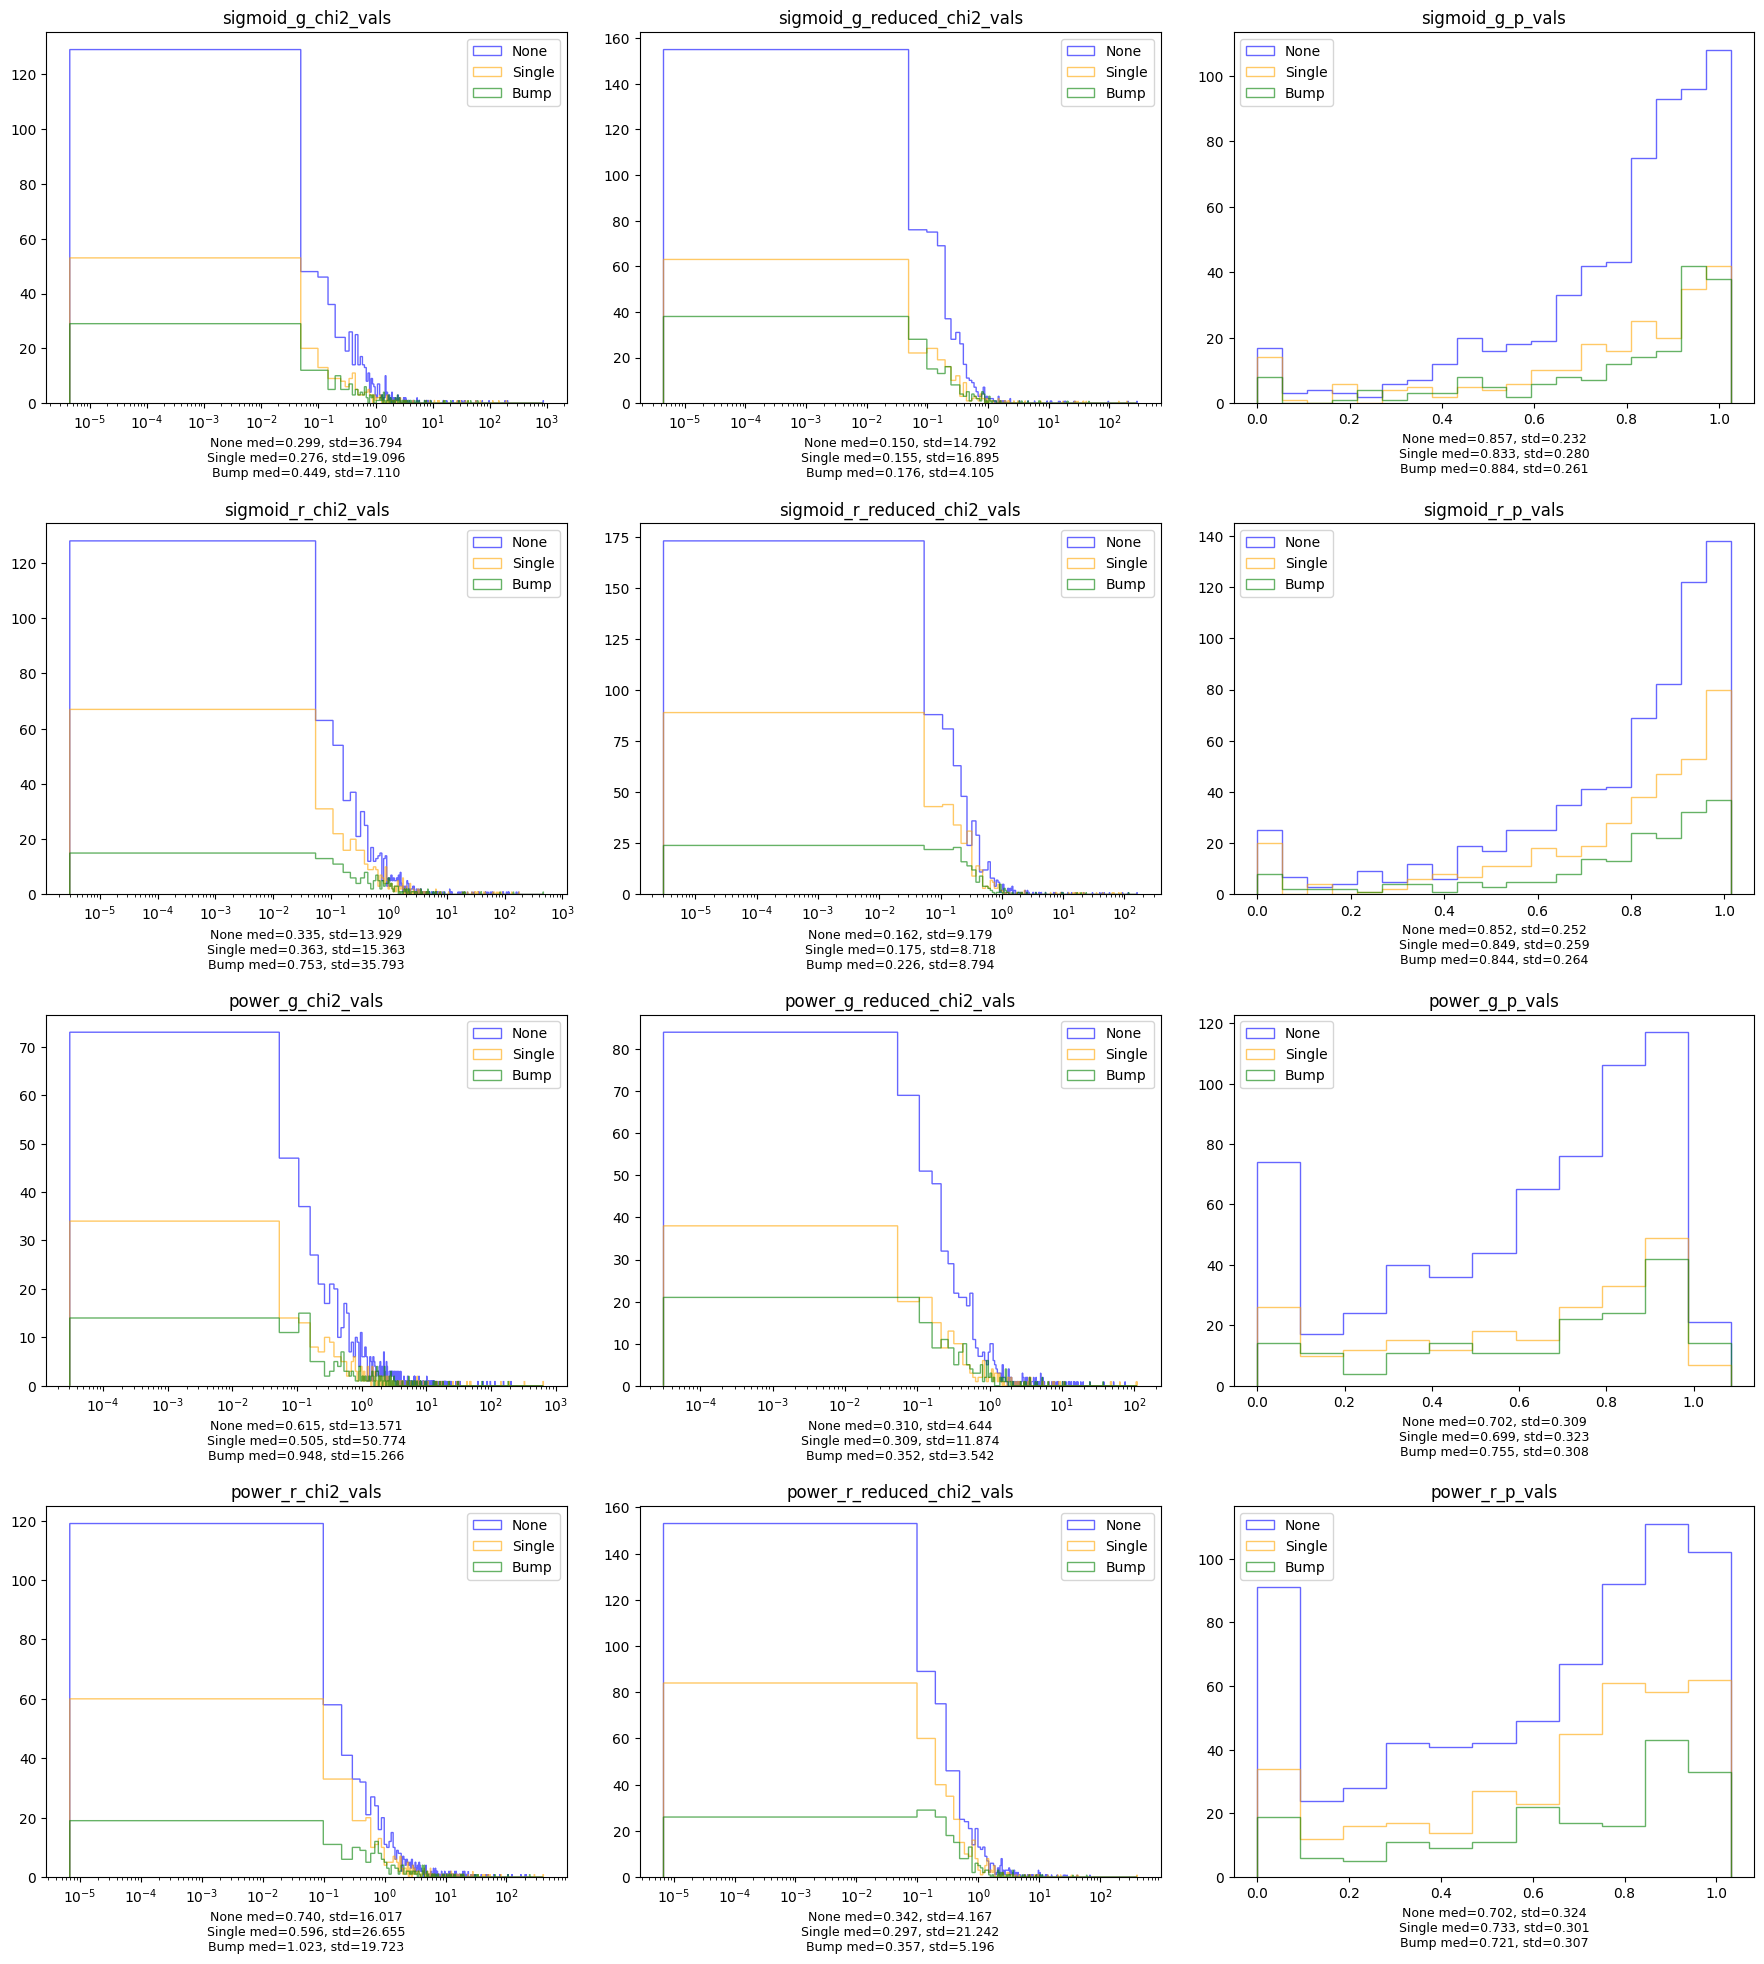

In [208]:
fig, axes = plt.subplots(4, 3, figsize=(18, 20))

data_triplets = [
    (none_sigmoid_g_chi2_vals, single_sigmoid_g_chi2_vals, bump_sigmoid_g_chi2_vals, "sigmoid_g_chi2_vals", True),
    (none_sigmoid_g_reduced_chi2_vals, single_sigmoid_g_reduced_chi2_vals, bump_sigmoid_g_reduced_chi2_vals, "sigmoid_g_reduced_chi2_vals", True),
    (none_sigmoid_g_p_vals, single_sigmoid_g_p_vals, bump_sigmoid_g_p_vals, "sigmoid_g_p_vals", False),

    (none_sigmoid_r_chi2_vals, single_sigmoid_r_chi2_vals, bump_sigmoid_r_chi2_vals, "sigmoid_r_chi2_vals", True),
    (none_sigmoid_r_reduced_chi2_vals, single_sigmoid_r_reduced_chi2_vals, bump_sigmoid_r_reduced_chi2_vals, "sigmoid_r_reduced_chi2_vals", True),
    (none_sigmoid_r_p_vals, single_sigmoid_r_p_vals, bump_sigmoid_r_p_vals, "sigmoid_r_p_vals", False),

    (none_power_g_chi2_vals, single_power_g_chi2_vals, bump_power_g_chi2_vals, "power_g_chi2_vals", True),
    (none_power_g_reduced_chi2_vals, single_power_g_reduced_chi2_vals, bump_power_g_reduced_chi2_vals, "power_g_reduced_chi2_vals", True),
    (none_power_g_p_vals, single_power_g_p_vals, bump_power_g_p_vals, "power_g_p_vals", False),

    (none_power_r_chi2_vals, single_power_r_chi2_vals, bump_power_r_chi2_vals, "power_r_chi2_vals", True),
    (none_power_r_reduced_chi2_vals, single_power_r_reduced_chi2_vals, bump_power_r_reduced_chi2_vals, "power_r_reduced_chi2_vals", True),
    (none_power_r_p_vals, single_power_r_p_vals, bump_power_r_p_vals, "power_r_p_vals", False),
]

for ax, (data1, data2, data3, title, x_log) in zip(axes.flat, data_triplets):

    datasets = [np.array(data1), np.array(data2), np.array(data3)]

    if x_log:
        ax.set_xscale("log")
        bins = np.logspace(np.log10(data_min), np.log10(data_max), 20)
    else:
        q25, q75 = np.percentile(np.concatenate(datasets), [25, 75])
        iqr = q75 - q25
        bin_width = 2 * iqr / (len(np.concatenate(datasets)) ** (1/3))

    data_min = min(np.min(d) for d in datasets)
    data_max = max(np.max(d) for d in datasets)
    bins = np.arange(data_min, data_max + bin_width, bin_width)

    colors = ['blue', 'orange', 'green']
    labels = ['None', 'Single', 'Bump']

    for d, c, l in zip(datasets, colors, labels):
        ax.hist(d, bins=bins, color=c, alpha=0.6, label=l, histtype='step')

    ax.set_title(title)

    # Stats for each dataset
    stat_lines = []
    for lbl, d in zip(labels, datasets):
        stat_lines.append(f"{lbl} med={np.median(d):.3f}, std={np.std(d):.3f}")

    ax.set_xlabel("\n".join(stat_lines), fontsize=9)

    

    ax.legend()

fig.tight_layout(pad=2.0, h_pad=1.5)
plt.show()


Looking at parameter distributions of TNS SNIa classified objects vs TNS objects classified as nonIas

In [209]:
ia_types = {'SN Ia', 'SN Ia-91T-like', 'SN Iax[02cx-like]', 'SN Ia-pec'} # Used to check if an object is a type Ia
non_ia_excluded_types = {'nan', 'SN Ia', 'SN Ia-91T-like', 'SN Iax[02cx-like]', 'SN Ia-pec'} # Used to check if an object is another type of SNe

In [255]:
lower_percentile = 3
upper_percentile = 97

tns_ia_sigmoid_g_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'sigmoid' and filt == 'g' and tns_class in ia_types
]

tns_ia_sigmoid_r_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'sigmoid' and filt == 'r' and tns_class in ia_types
]

tns_ia_power_g_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'power' and filt == 'g' and tns_class in ia_types
]

tns_ia_power_r_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'power' and filt == 'r' and tns_class in ia_types
]

tns_ia_sigmoid_g_a, tns_ia_sigmoid_g_b, tns_ia_sigmoid_g_c = zip(*remove_outliers(tns_ia_sigmoid_g_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
tns_ia_sigmoid_r_a, tns_ia_sigmoid_r_b, tns_ia_sigmoid_r_c = zip(*remove_outliers(tns_ia_sigmoid_r_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))

tns_ia_power_g_a, tns_ia_power_g_b, tns_ia_power_g_c = zip(*remove_outliers(tns_ia_power_g_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
tns_ia_power_r_a, tns_ia_power_r_b, tns_ia_power_r_c = zip(*remove_outliers(tns_ia_power_r_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))

tns_non_ia_sigmoid_g_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'sigmoid' and filt == 'g' and tns_class not in non_ia_excluded_types
]

tns_non_ia_sigmoid_r_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'sigmoid' and filt == 'r' and tns_class not in non_ia_excluded_types
]

tns_non_ia_power_g_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'power' and filt == 'g' and tns_class not in non_ia_excluded_types
]

tns_non_ia_power_r_params = [
    params for (_, model, filt, tns_class, _), params in params_dict.items()
    if model == 'power' and filt == 'r' and tns_class not in non_ia_excluded_types
]

tns_non_ia_sigmoid_g_a, tns_non_ia_sigmoid_g_b, tns_non_ia_sigmoid_g_c = zip(*remove_outliers(tns_non_ia_sigmoid_g_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
tns_non_ia_sigmoid_r_a, tns_non_ia_sigmoid_r_b, tns_non_ia_sigmoid_r_c = zip(*remove_outliers(tns_non_ia_sigmoid_r_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))

tns_non_ia_power_g_a, tns_non_ia_power_g_b, tns_non_ia_power_g_c = zip(*remove_outliers(tns_non_ia_power_g_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
tns_non_ia_power_r_a, tns_non_ia_power_r_b, tns_non_ia_power_r_c = zip(*remove_outliers(tns_non_ia_power_r_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))

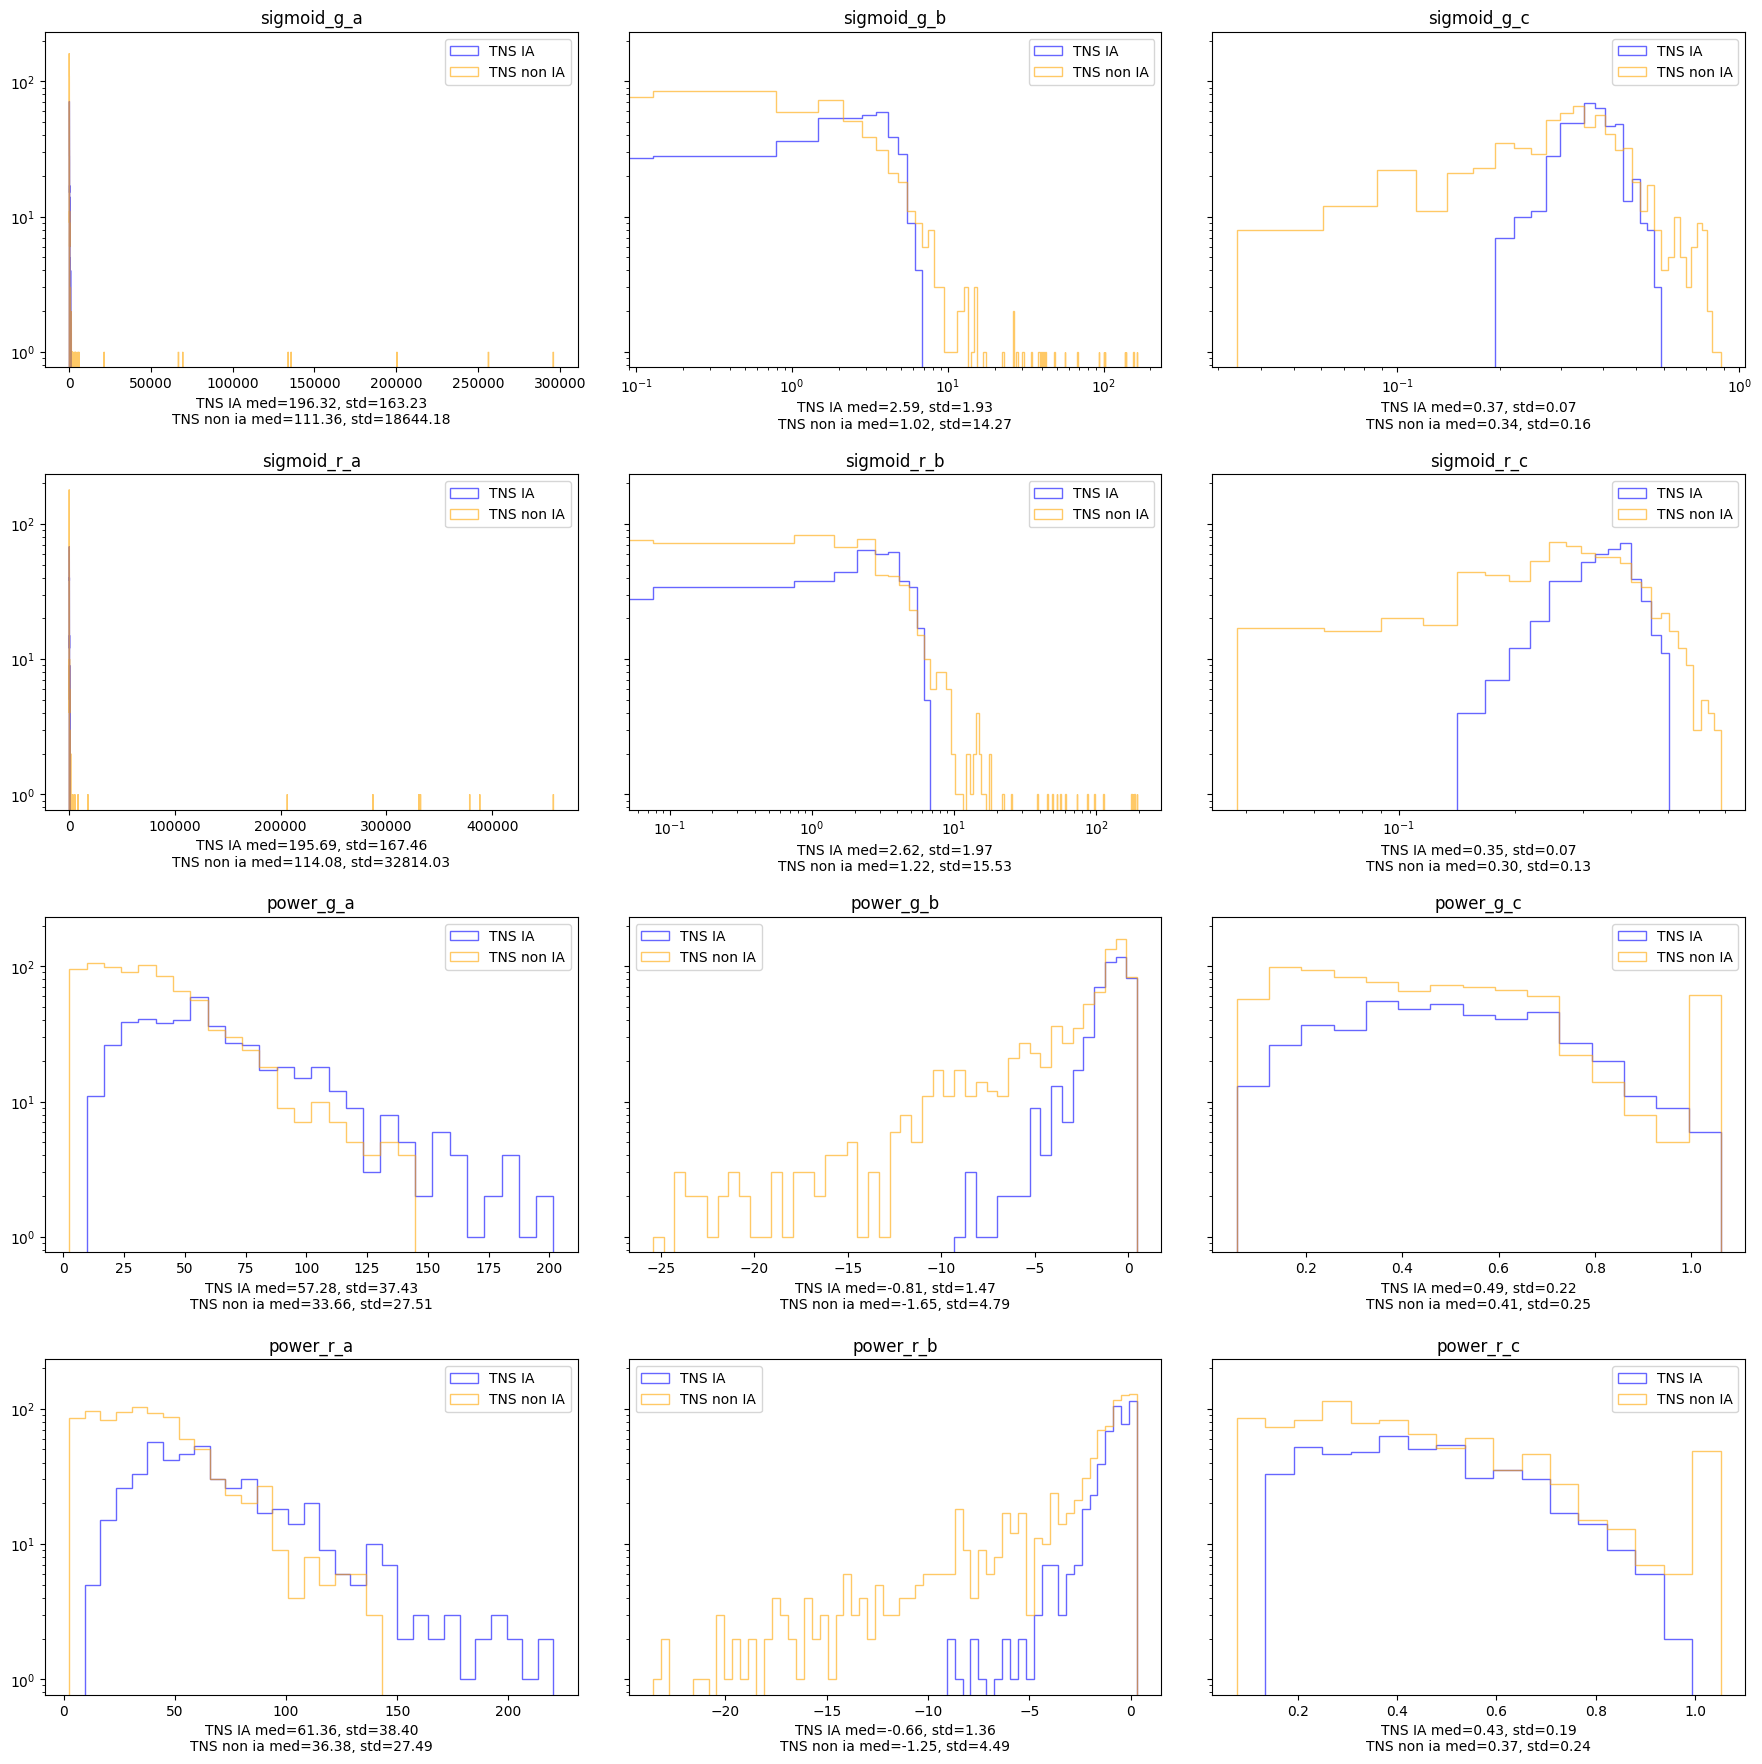

In [211]:
fig, axes = plt.subplots(4, 3, figsize=(18, 18), sharey=True)


data_pairs = [
    (tns_ia_sigmoid_g_a, tns_non_ia_sigmoid_g_a, "sigmoid_g_a", False),
    (tns_ia_sigmoid_g_b, tns_non_ia_sigmoid_g_b, "sigmoid_g_b", True),
    (tns_ia_sigmoid_g_c, tns_non_ia_sigmoid_g_c, "sigmoid_g_c", True),
    (tns_ia_sigmoid_r_a, tns_non_ia_sigmoid_r_a, "sigmoid_r_a", False),
    (tns_ia_sigmoid_r_b, tns_non_ia_sigmoid_r_b, "sigmoid_r_b", True),
    (tns_ia_sigmoid_r_c, tns_non_ia_sigmoid_r_c, "sigmoid_r_c", True),
    (tns_ia_power_g_a, tns_non_ia_power_g_a, "power_g_a", False),
    (tns_ia_power_g_b, tns_non_ia_power_g_b, "power_g_b", False),
    (tns_ia_power_g_c, tns_non_ia_power_g_c, "power_g_c", False),
    (tns_ia_power_r_a, tns_non_ia_power_r_a, "power_r_a", False),
    (tns_ia_power_r_b, tns_non_ia_power_r_b, "power_r_b", False),
    (tns_ia_power_r_c, tns_non_ia_power_r_c, "power_r_c", False),
]

for ax, (tns_ia_data, tns_non_ia_data, title, x_log) in zip(axes.flat, data_pairs):

    datasets = [np.array(tns_ia_data), np.array(tns_non_ia_data)]

    q25, q75 = np.percentile(np.concatenate(datasets), [25, 75])
    iqr = q75 - q25
    bin_width = 2 * iqr / (len(np.concatenate(datasets)) ** (1/3))
    
    data_min = min(np.min(d) for d in datasets)
    data_max = max(np.max(d) for d in datasets)
    binning = np.arange(data_min, data_max + bin_width, bin_width)

    ax.hist(tns_ia_data, bins=binning, color='blue', alpha=0.6, label='TNS IA', histtype='step')
    ax.hist(tns_non_ia_data, bins=binning, color='orange', alpha=0.6, label='TNS non IA', histtype='step')
    
    ax.set_title(title)
    
    tns_median, tns_std = np.median(tns_ia_data), np.std(tns_ia_data)
    tns_non_ia_median, tns_non_ia_std = np.median(tns_non_ia_data), np.std(tns_non_ia_data)
    

    ax.set_xlabel(
        f"TNS IA med={tns_median:.2f}, std={tns_std:.2f}\n"
        f"TNS non ia med={tns_non_ia_median:.2f}, std={tns_non_ia_std:.2f}"
    )

    if x_log:
        ax.set_xscale("log")
    
    ax.legend()

fig.tight_layout(pad=2.0, h_pad=1.5)
plt.yscale('log')
plt.show()


sigmoid_a 48.15247946030272, 1448115.1985388135
sigmoid_b -164.88437720790745, 328.58337488064785
sigmoid_c 0.019126234675356, 1.216834389223413
power_a 1.248219308049026, 273.7870575815317
power_b -46.484305336992705, -3.588976301183378e-20
power_c 0.0425162688686115, 1.0


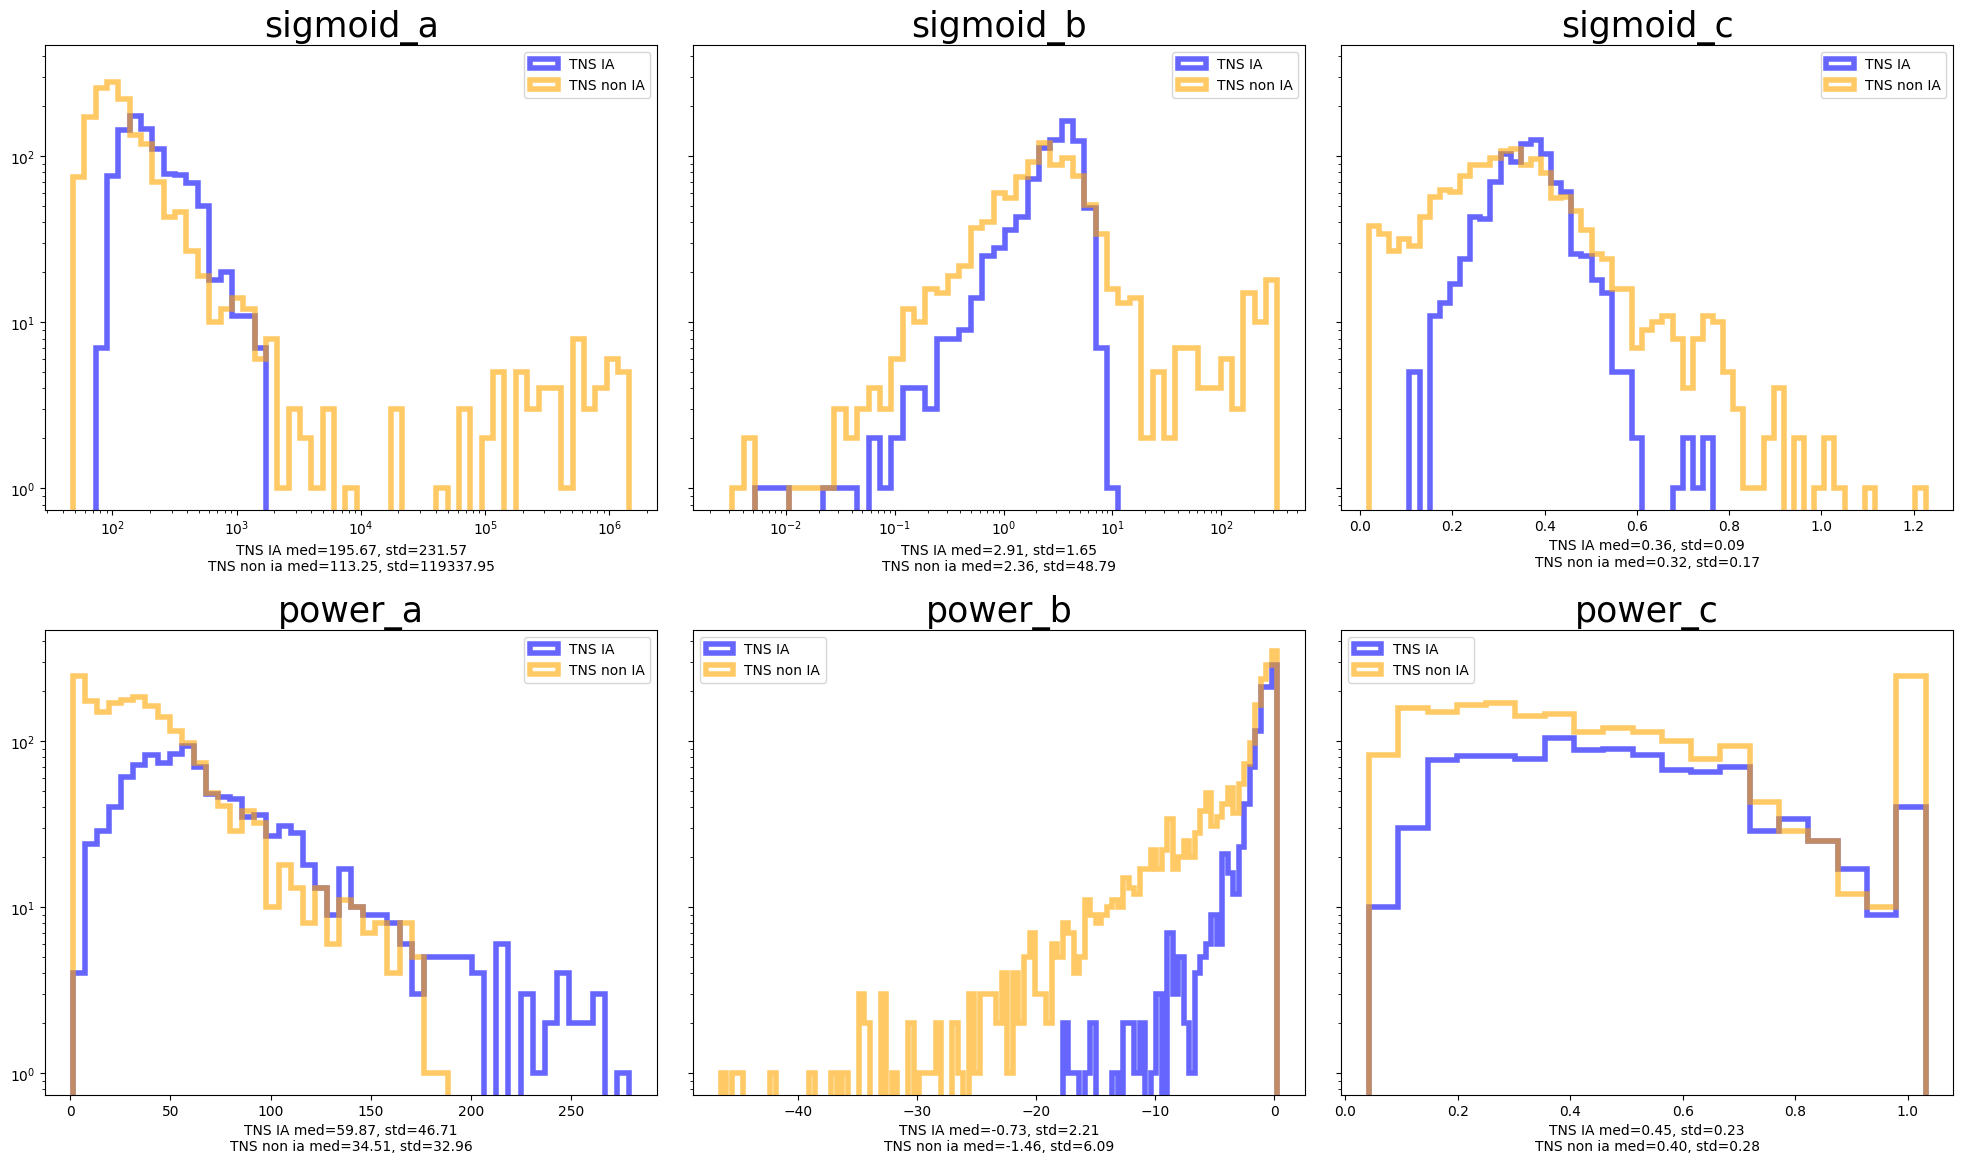

In [256]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12), sharey=True)


data_pairs = [
    (np.concatenate([tns_ia_sigmoid_g_a, tns_ia_sigmoid_r_a]),
     np.concatenate([tns_non_ia_sigmoid_g_a, tns_non_ia_sigmoid_r_a]),
     "sigmoid_a", True),

    (np.concatenate([tns_ia_sigmoid_g_b, tns_ia_sigmoid_r_b]),
     np.concatenate([tns_non_ia_sigmoid_g_b, tns_non_ia_sigmoid_r_b]),
     "sigmoid_b", True),

    (np.concatenate([tns_ia_sigmoid_g_c, tns_ia_sigmoid_r_c]),
     np.concatenate([tns_non_ia_sigmoid_g_c, tns_non_ia_sigmoid_r_c]),
     "sigmoid_c", False),

    (np.concatenate([tns_ia_power_g_a, tns_ia_power_r_a]),
     np.concatenate([tns_non_ia_power_g_a, tns_non_ia_power_r_a]),
     "power_a", False),

    (np.concatenate([tns_ia_power_g_b, tns_ia_power_r_b]),
     np.concatenate([tns_non_ia_power_g_b, tns_non_ia_power_r_b]),
     "power_b", False),

    (np.concatenate([tns_ia_power_g_c, tns_ia_power_r_c]),
     np.concatenate([tns_non_ia_power_g_c, tns_non_ia_power_r_c]),
     "power_c", False),
]
for ax, (tns_ia_data, tns_non_ia_data, title, x_log) in zip(axes.flat, data_pairs):

    datasets = [np.array(tns_ia_data), np.array(tns_non_ia_data)]
    data_min = min(np.min(d) for d in datasets)
    data_max = max(np.max(d) for d in datasets)
    print(f"{title} {data_min}, {data_max}")

    if x_log:
        tns_ia_data = tns_ia_data[tns_ia_data > 0]
        tns_non_ia_data = tns_non_ia_data[tns_non_ia_data > 0]

        data_min = min(np.min(tns_ia_data), np.min(tns_non_ia_data))
        data_max = max(np.max(tns_ia_data), np.max(tns_non_ia_data))
    
        ax.set_xscale("log")
        binning = np.logspace(np.log10(data_min), np.log10(data_max), num=50)
    else:
        q25, q75 = np.percentile(np.concatenate(datasets), [25, 75])
        iqr = q75 - q25
        bin_width = 2 * iqr / (len(np.concatenate(datasets)) ** (1/3))
        binning = np.arange(data_min, data_max + bin_width, bin_width)

    ax.hist(tns_ia_data, bins=binning, color='blue', alpha=0.6, label='TNS IA', histtype='step', linewidth=4)
    ax.hist(tns_non_ia_data, bins=binning, color='orange', alpha=0.6, label='TNS non IA', histtype='step', linewidth=4)
    
    ax.set_title(title, fontsize=25)
    
    tns_median, tns_std = np.median(tns_ia_data), np.std(tns_ia_data)
    tns_non_ia_median, tns_non_ia_std = np.median(tns_non_ia_data), np.std(tns_non_ia_data)
    

    ax.set_xlabel(
        f"TNS IA med={tns_median:.2f}, std={tns_std:.2f}\n"
        f"TNS non ia med={tns_non_ia_median:.2f}, std={tns_non_ia_std:.2f}"
    )
    ax.legend()

fig.tight_layout(pad=2.0, h_pad=1.5)
plt.yscale('log')
plt.show()


The main distribution of the a values for both models (which indicates the magnitude) are higher for type Ias, indicating brighter objects, this is also shown by the medians. This makes sense since we can more accuratley classify brigther objects since we have more data and it's easier to get a spectroscopic analysis. Both fits have b values (horizontal shifts) closer to zero for type Ias. For the sigmoid c distribution (curvature of the sigmoid), type Ias tend to have a curvature relativley in the middle, while the non Ias have a greater spread. For the power c (which is the exponent) distribution we see a general similarity between both data sets, but we see a much smaller proportions of Ias having extreme exponents. This might be a case of human bias, where we are less likely to spectroscopically consider objects that appear to linearly increse in brightness as SN Ias (c~1), and much less likely to sprectroscopically classify objects whose brightness appears not to increase very much (c~0).

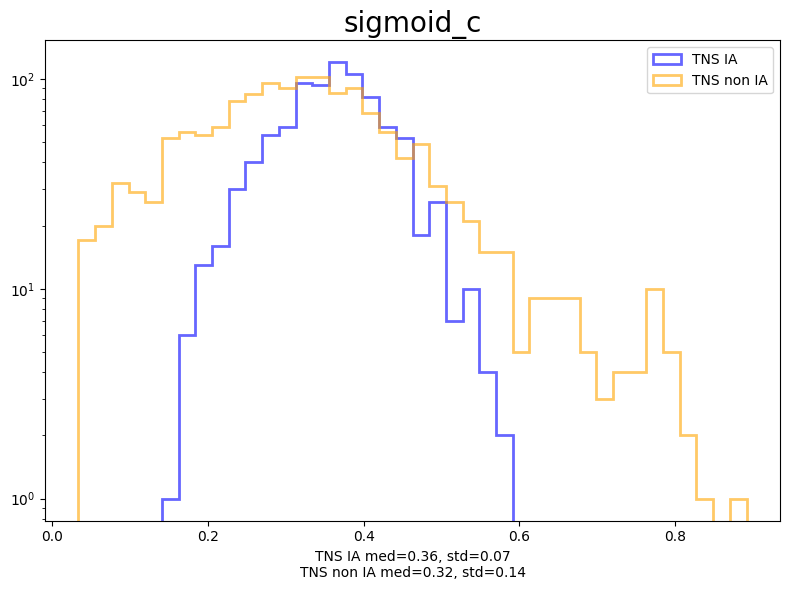

In [254]:
fig, ax = plt.subplots(figsize=(8, 6))

# Combine g and r for sigmoid_c
tns_ia_data = np.concatenate([tns_ia_sigmoid_g_c, tns_ia_sigmoid_r_c])
tns_non_ia_data = np.concatenate([tns_non_ia_sigmoid_g_c, tns_non_ia_sigmoid_r_c])

datasets = [tns_ia_data, tns_non_ia_data]
data_min = min(np.min(d) for d in datasets)
data_max = max(np.max(d) for d in datasets)

# Freedman–Diaconis rule for binning
q25, q75 = np.percentile(np.concatenate(datasets), [25, 75])
iqr = q75 - q25
bin_width = 2 * iqr / (len(np.concatenate(datasets)) ** (1/3))
binning = np.arange(data_min, data_max + bin_width, bin_width)

# Plot
ax.hist(tns_ia_data, bins=binning, color='blue', alpha=0.6, 
        label='TNS IA', histtype='step', linewidth=2)
ax.hist(tns_non_ia_data, bins=binning, color='orange', alpha=0.6, 
        label='TNS non IA', histtype='step', linewidth=2)

# Title and stats
ax.set_title("sigmoid_c", fontsize=20)
tns_median, tns_std = np.median(tns_ia_data), np.std(tns_ia_data)
non_median, non_std = np.median(tns_non_ia_data), np.std(tns_non_ia_data)
ax.set_xlabel(
    f"TNS IA med={tns_median:.2f}, std={tns_std:.2f}\n"
    f"TNS non IA med={non_median:.2f}, std={non_std:.2f}"
)

ax.legend()
plt.yscale("log")
plt.tight_layout()
plt.show()


In [213]:
# Looking at the conaminants that are in that sigmoid c range

contaminant_obj_ids_g = [
    tns_class for (obj_id, model, filt, tns_class, _), params in params_dict.items()
    if model == 'sigmoid' and filt == 'g' and tns_class not in non_ia_excluded_types and (params[2] > 0.15) and (params[2] < 0.55)
] 

contaminant_obj_ids_r = [
    tns_class for (obj_id, model, filt, tns_class, _), params in params_dict.items()
    if model == 'sigmoid' and filt == 'r' and tns_class not in non_ia_excluded_types and (params[2] > 0.15) and (params[2] < 0.55)
] 

print(np.unique(np.array(contaminant_obj_ids_g)))
print(np.unique(np.array(contaminant_obj_ids_r)))


['SLSN-I' 'SLSN-II' 'SN II' 'SN II-pec' 'SN IIb' 'SN IIn'
 'SN Ia-91bg-like' 'SN Ia-CSM' 'SN Ib' 'SN Ib/c' 'SN Ic' 'SN Ic-BL' 'nan']
['SLSN-I' 'SLSN-II' 'SN' 'SN II' 'SN II-pec' 'SN IIb' 'SN IIn' 'SN Ib'
 'SN Ib/c' 'SN Ic' 'SN Ic-BL' 'nan']


Now looking at sigmoid parameters for type I vs type II vs type Ia

In [214]:
sigmoid_pdf = pdf[pdf['model'] == 'sigmoid'].copy()
sigmoid_pdf = sigmoid_pdf[sigmoid_pdf['TNS classified'].notna()]

mask_Ia_strict = sigmoid_pdf['TNS classified'] == "SN Ia"
mask_Ia_other  = sigmoid_pdf['TNS classified'].isin(["SN Ia-91T-like", "SN Ia-pec", "SN Iax[02cx-like]"])
mask_II = sigmoid_pdf['TNS classified'].str.contains("SN II", na=False)
mask_I  = sigmoid_pdf['TNS classified'].str.contains("SN I", na=False) & ~mask_Ia_strict & ~mask_Ia_other & ~mask_II

sigmoid_I_params = list(sigmoid_pdf[mask_I][['a', 'b', 'c']].itertuples(index=False, name=None))
sigmoid_Ia_params = list(sigmoid_pdf[mask_Ia_strict][['a', 'b', 'c']].itertuples(index=False, name=None))
sigmoid_Ia_other_params = list(sigmoid_pdf[mask_Ia_other][['a', 'b', 'c']].itertuples(index=False, name=None))
sigmoid_II_params = list(sigmoid_pdf[mask_II][['a', 'b', 'c']].itertuples(index=False, name=None))

lower_percentile = 5
upper_percentile = 95

sigmoid_I_a, sigmoid_I_b, sigmoid_I_c = zip(*remove_outliers(sigmoid_I_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
sigmoid_Ia_a, sigmoid_Ia_b, sigmoid_Ia_c = zip(*remove_outliers(sigmoid_Ia_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
sigmoid_Ia_other_a, sigmoid_Ia_other_b, sigmoid_Ia_other_c = zip(*remove_outliers(sigmoid_Ia_other_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
sigmoid_II_a, sigmoid_II_b, sigmoid_II_c = zip(*remove_outliers(sigmoid_II_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))


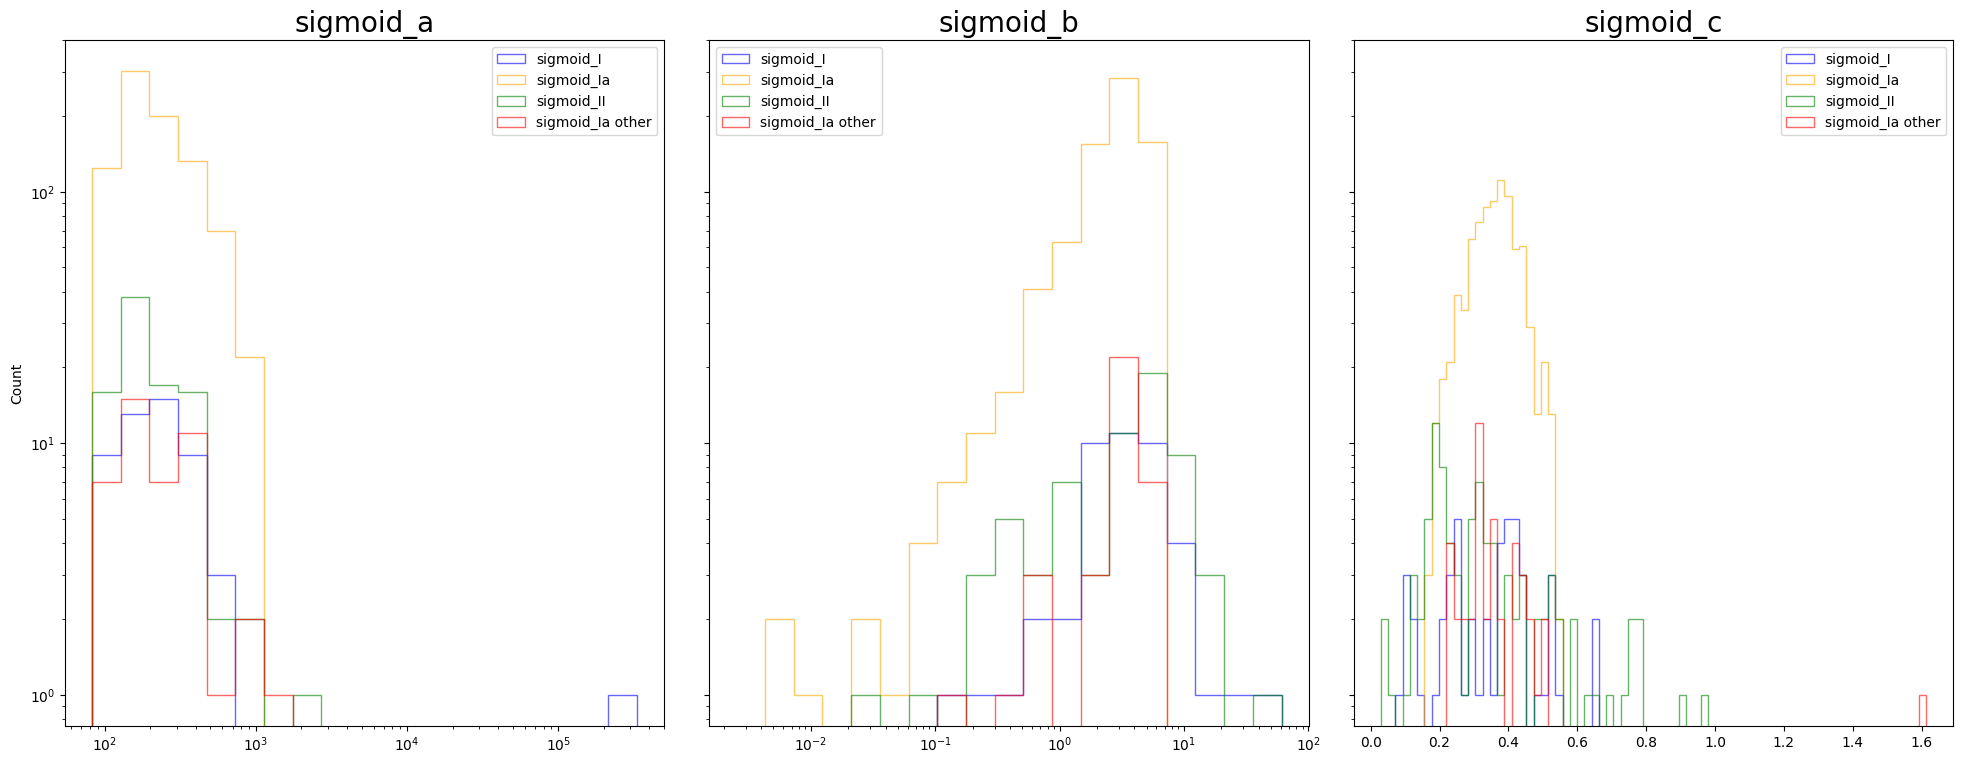

In [215]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

datasets = [np.array(sigmoid_I_a), np.array(sigmoid_Ia_a), np.array(sigmoid_II_a), np.array(sigmoid_Ia_other_a)]
datasets = [d[d > 0] for d in datasets]  
data_min = min(np.min(d) for d in datasets)
data_max = max(np.max(d) for d in datasets)
axes[0].set_xscale("log")
binning = np.logspace(np.log10(data_min), np.log10(data_max), num=20)

colors = ["blue", "orange", "green", "red"]
labels = ["sigmoid_I", "sigmoid_Ia", "sigmoid_II", "sigmoid_Ia other"]

for d, color, label in zip(datasets, colors, labels):
    axes[0].hist(d, bins=binning, color=color, alpha=0.6, label=label, histtype="step", )
    med, std = np.median(d), np.std(d)
    label += f"\nmed={med:.2f}, std={std:.2f}"
axes[0].set_title("sigmoid_a", fontsize=20)
axes[0].set_ylabel("Count")
axes[0].legend(fontsize=10)

datasets = [np.array(sigmoid_I_b), np.array(sigmoid_Ia_b), np.array(sigmoid_II_b), np.array(sigmoid_Ia_other_b)]
datasets = [d[d > 0] for d in datasets] 
data_min = min(np.min(d) for d in datasets)
data_max = max(np.max(d) for d in datasets)
axes[1].set_xscale("log")
binning = np.logspace(np.log10(data_min), np.log10(data_max), num=20)

for d, color, label in zip(datasets, colors, labels):
    axes[1].hist(d, bins=binning, color=color, alpha=0.6, label=label, histtype="step", )
    med, std = np.median(d), np.std(d)
    label += f"\nmed={med:.2f}, std={std:.2f}"
axes[1].set_title("sigmoid_b", fontsize=20)
axes[1].legend(fontsize=10)

datasets = [np.array(sigmoid_I_c), np.array(sigmoid_Ia_c), np.array(sigmoid_II_c), np.array(sigmoid_Ia_other_c)]
data_min = min(np.min(d) for d in datasets)
data_max = max(np.max(d) for d in datasets)
q25, q75 = np.percentile(np.concatenate(datasets), [25, 75])
iqr = q75 - q25
bin_width = 2 * iqr / (len(np.concatenate(datasets)) ** (1/3))
binning = np.arange(data_min, data_max + bin_width, bin_width)

for d, color, label in zip(datasets, colors, labels):
    axes[2].hist(d, bins=binning, color=color, alpha=0.6, label=label, histtype="step", )
    med, std = np.median(d), np.std(d)
axes[2].set_title("sigmoid_c", fontsize=20)
axes[2].legend(fontsize=10)

fig.tight_layout(pad=2.0, h_pad=1.5)
plt.yscale("log")
plt.show()


In [216]:
power_pdf = pdf[pdf['model'] == 'power'].copy()
power_pdf = power_pdf[power_pdf['TNS classified'].notna()]

mask_Ia_strict = power_pdf['TNS classified'] == "SN Ia"
mask_Ia_other  = power_pdf['TNS classified'].isin(["SN Ia-91T-like", "SN Ia-pec", "SN Iax[02cx-like]"])
mask_II = power_pdf['TNS classified'].str.contains("SN II", na=False)
mask_I  = power_pdf['TNS classified'].str.contains("SN I", na=False) & ~mask_Ia_strict & ~mask_Ia_other & ~mask_II

power_I_params = list(power_pdf[mask_I][['a', 'b', 'c']].itertuples(index=False, name=None))
power_Ia_params = list(power_pdf[mask_Ia_strict][['a', 'b', 'c']].itertuples(index=False, name=None))
power_Ia_other_params = list(power_pdf[mask_Ia_other][['a', 'b', 'c']].itertuples(index=False, name=None))
power_II_params = list(power_pdf[mask_II][['a', 'b', 'c']].itertuples(index=False, name=None))

lower_percentile = 5
upper_percentile = 95

power_I_a, power_I_b, power_I_c = zip(*remove_outliers(power_I_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
power_Ia_a, power_Ia_b, power_Ia_c = zip(*remove_outliers(power_Ia_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
power_Ia_other_a, power_Ia_other_b, power_Ia_other_c = zip(*remove_outliers(power_Ia_other_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
power_II_a, power_II_b, power_II_c = zip(*remove_outliers(power_II_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))

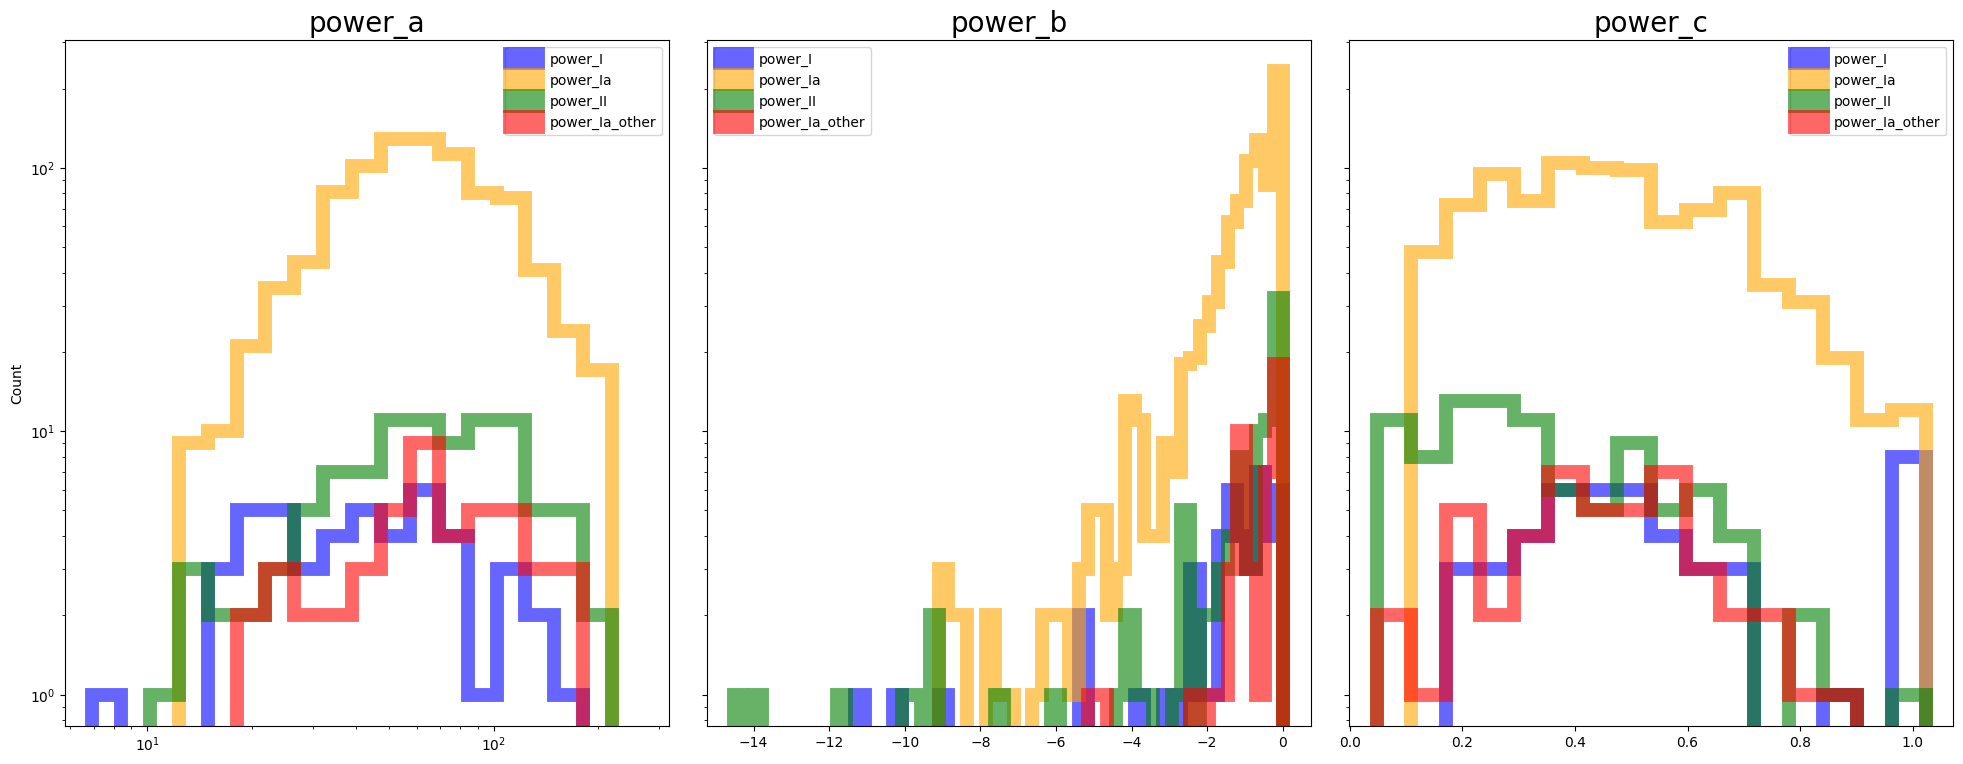

In [217]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

datasets = [np.array(power_I_a), np.array(power_Ia_a), np.array(power_II_a), np.array(power_Ia_other_a)]
datasets = [d[d > 0] for d in datasets]  
data_min = min(np.min(d) for d in datasets)
data_max = max(np.max(d) for d in datasets)
axes[0].set_xscale("log")
binning = np.logspace(np.log10(data_min), np.log10(data_max), num=20)

colors = ["blue", "orange", "green",'red']
labels = ["power_I", "power_Ia", "power_II", "power_Ia_other"]

for d, color, label in zip(datasets, colors, labels):
    axes[0].hist(d, bins=binning, color=color, alpha=0.6, label=label, histtype="step", linewidth=10)
    med, std = np.median(d), np.std(d)
    label += f"\nmed={med:.2f}, std={std:.2f}"
axes[0].set_title("power_a", fontsize=20)
axes[0].set_ylabel("Count")
axes[0].legend(fontsize=10)

datasets = [np.array(power_I_b), np.array(power_Ia_b), np.array(power_II_b), np.array(power_Ia_other_b)]
data_min = min(np.min(d) for d in datasets)
data_max = max(np.max(d) for d in datasets)
q25, q75 = np.percentile(np.concatenate(datasets), [25, 75])
iqr = q75 - q25
bin_width = 2 * iqr / (len(np.concatenate(datasets)) ** (1/3))
binning = np.arange(data_min, data_max + bin_width, bin_width)

for d, color, label in zip(datasets, colors, labels):
    axes[1].hist(d, bins=binning, color=color, alpha=0.6, label=label, histtype="step", linewidth=10)
    med, std = np.median(d), np.std(d)
    label += f"\nmed={med:.2f}, std={std:.2f}"
axes[1].set_title("power_b", fontsize=20)
axes[1].legend(fontsize=10)

datasets = [np.array(power_I_c), np.array(power_Ia_c), np.array(power_II_c), np.array(power_Ia_other_c)]
data_min = min(np.min(d) for d in datasets)
data_max = max(np.max(d) for d in datasets)
q25, q75 = np.percentile(np.concatenate(datasets), [25, 75])
iqr = q75 - q25
bin_width = 2 * iqr / (len(np.concatenate(datasets)) ** (1/3))
binning = np.arange(data_min, data_max + bin_width, bin_width)

for d, color, label in zip(datasets, colors, labels):
    axes[2].hist(d, bins=binning, color=color, alpha=0.6, label=label, histtype="step", linewidth=10)
    med, std = np.median(d), np.std(d)
axes[2].set_title("power_c", fontsize=20)
axes[2].legend(fontsize=10)

fig.tight_layout(pad=2.0, h_pad=1.5)
plt.yscale("log")
plt.show()


Now looking at $\chi^2, \chi^2_\nu$, and p-value distributions of TNS SNIa vs TNS non Ias

In [218]:
tns_ia_sigmoid_g_eval = [
    eval for (_, model, filt, tns_class, _), eval in eval_dict.items()
    if model == 'sigmoid' and filt == 'g' and tns_class in ia_types
]

tns_ia_sigmoid_r_eval = [
    eval for (_, model, filt, tns_class, _), eval in eval_dict.items()
    if model == 'sigmoid' and filt == 'r' and tns_class in ia_types
]

tns_ia_power_g_eval = [
    eval for (_, model, filt, tns_class, _), eval in eval_dict.items()
    if model == 'power' and filt == 'g' and tns_class in ia_types
]

tns_ia_power_r_eval = [
    eval for (_, model, filt, tns_class, _), eval in eval_dict.items()
    if model == 'power' and filt == 'r' and tns_class in ia_types
]

tns_ia_sigmoid_g_chi2, tns_ia_sigmoid_g_reduced_chi2, tns_ia_sigmoid_g_p_vals = clean_triplets(zip(*tns_ia_sigmoid_g_eval))
tns_ia_sigmoid_r_chi2, tns_ia_sigmoid_r_reduced_chi2, tns_ia_sigmoid_r_p_vals = clean_triplets(zip(*tns_ia_sigmoid_r_eval))

tns_ia_power_g_chi2, tns_ia_power_g_reduced_chi2, tns_ia_power_g_p_vals = clean_triplets(zip(*tns_ia_power_g_eval))
tns_ia_power_r_chi2, tns_ia_power_r_reduced_chi2, tns_ia_power_r_p_vals = clean_triplets(zip(*tns_ia_power_r_eval))

tns_non_ia_sigmoid_g_eval = [
    eval for (_, model, filt, tns_class, _), eval in eval_dict.items()
    if model == 'sigmoid' and filt == 'g' and tns_class not in non_ia_excluded_types
]

tns_non_ia_sigmoid_r_eval = [
    eval for (_, model, filt, tns_class, _), eval in eval_dict.items()
    if model == 'sigmoid' and filt == 'r' and tns_class not in non_ia_excluded_types
]

tns_non_ia_power_g_eval = [
    eval for (_, model, filt, tns_class, _), eval in eval_dict.items()
    if model == 'power' and filt == 'g' and tns_class not in non_ia_excluded_types
]

tns_non_ia_power_r_eval = [
    eval for (_, model, filt, tns_class, _), eval in eval_dict.items()
    if model == 'power' and filt == 'r' and tns_class not in non_ia_excluded_types
]

tns_non_ia_sigmoid_g_chi2, tns_non_ia_sigmoid_g_reduced_chi2, tns_non_ia_sigmoid_g_p_vals = clean_triplets(zip(*tns_non_ia_sigmoid_g_eval))
tns_non_ia_sigmoid_r_chi2, tns_non_ia_sigmoid_r_reduced_chi2, tns_non_ia_sigmoid_r_p_vals = clean_triplets(zip(*tns_non_ia_sigmoid_r_eval))

tns_non_ia_power_g_chi2, tns_non_ia_power_g_reduced_chi2, tns_non_ia_power_g_p_vals = clean_triplets(zip(*tns_non_ia_power_g_eval))
tns_non_ia_power_r_chi2, tns_non_ia_power_r_reduced_chi2, tns_non_ia_power_r_p_vals = clean_triplets(zip(*tns_non_ia_power_r_eval))

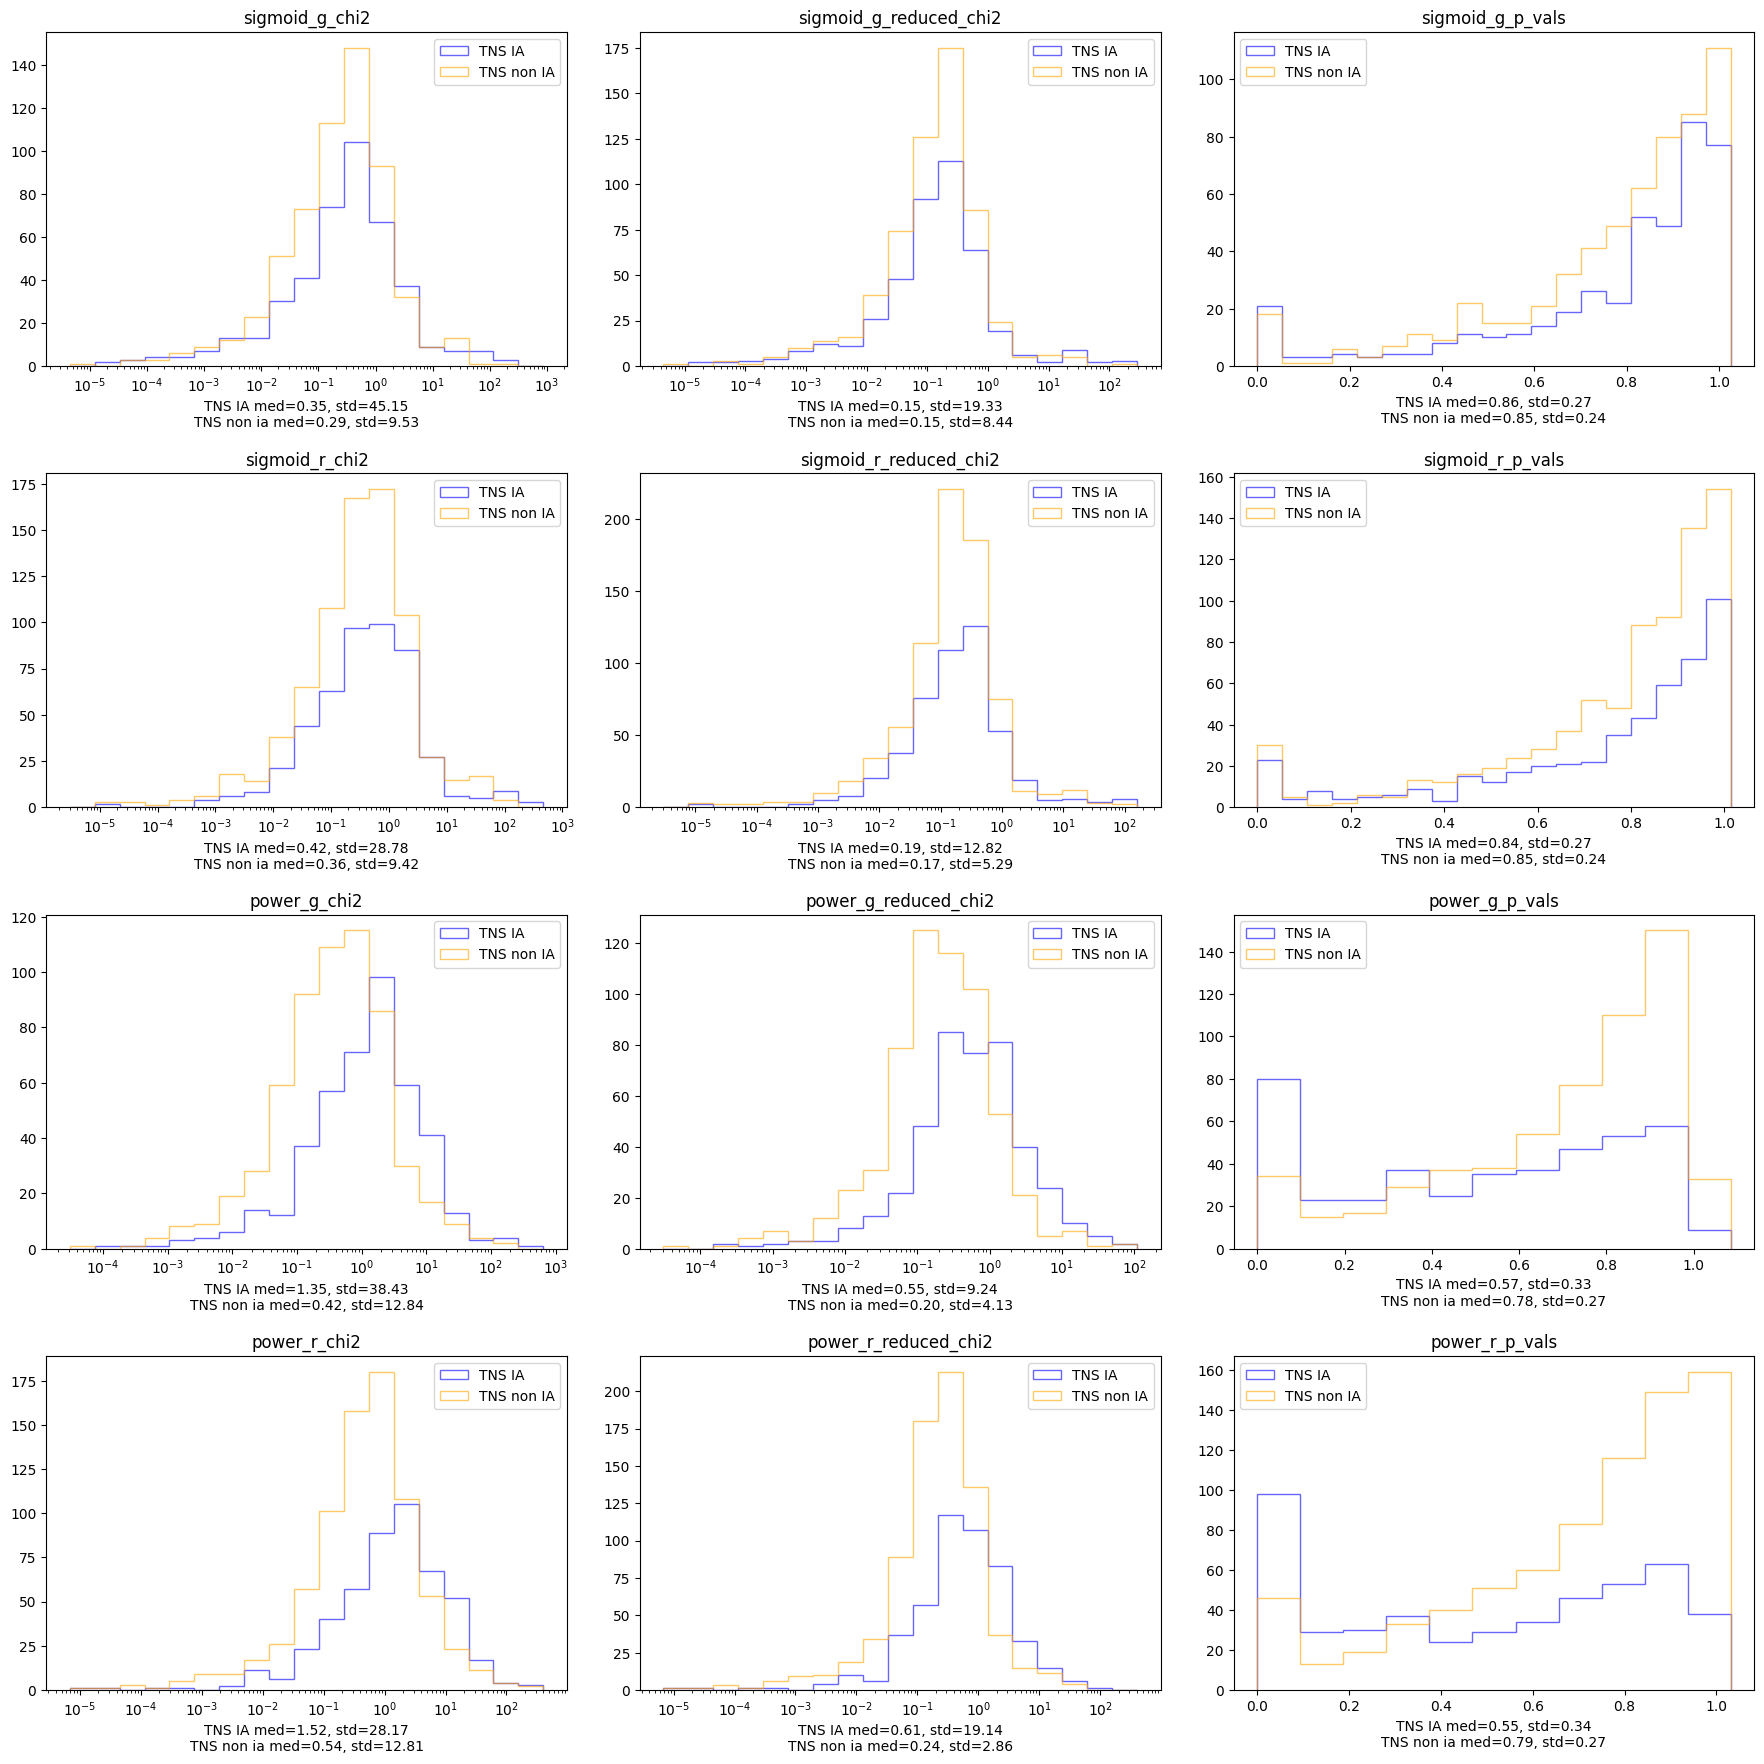

In [219]:
fig, axes = plt.subplots(4, 3, figsize=(18, 18), sharey=False)


data_pairs = [
    (tns_ia_sigmoid_g_chi2, tns_non_ia_sigmoid_g_chi2, "sigmoid_g_chi2", True),
    (tns_ia_sigmoid_g_reduced_chi2, tns_non_ia_sigmoid_g_reduced_chi2, "sigmoid_g_reduced_chi2", True),
    (tns_ia_sigmoid_g_p_vals, tns_non_ia_sigmoid_g_p_vals, "sigmoid_g_p_vals", False),
    (tns_ia_sigmoid_r_chi2, tns_non_ia_sigmoid_r_chi2, "sigmoid_r_chi2", True),
    (tns_ia_sigmoid_r_reduced_chi2, tns_non_ia_sigmoid_r_reduced_chi2, "sigmoid_r_reduced_chi2", True),
    (tns_ia_sigmoid_r_p_vals, tns_non_ia_sigmoid_r_p_vals, "sigmoid_r_p_vals", False),
    (tns_ia_power_g_chi2, tns_non_ia_power_g_chi2, "power_g_chi2", True),
    (tns_ia_power_g_reduced_chi2, tns_non_ia_power_g_reduced_chi2, "power_g_reduced_chi2", True),
    (tns_ia_power_g_p_vals, tns_non_ia_power_g_p_vals, "power_g_p_vals", False),
    (tns_ia_power_r_chi2, tns_non_ia_power_r_chi2, "power_r_chi2", True),
    (tns_ia_power_r_reduced_chi2, tns_non_ia_power_r_reduced_chi2, "power_r_reduced_chi2", True),
    (tns_ia_power_r_p_vals, tns_non_ia_power_r_p_vals, "power_r_p_vals", False),
]

for ax, (tns_ia_data, tns_non_ia_data, title, x_log) in zip(axes.flat, data_pairs):

    datasets = [np.array(tns_ia_data), np.array(tns_non_ia_data)]
    data_min = min(np.min(d) for d in datasets)
    data_max = max(np.max(d) for d in datasets)

    if x_log:
        ax.set_xscale("log")
        binning = np.logspace(np.log10(data_min), np.log10(data_max), 20)
    else:
        q25, q75 = np.percentile(np.concatenate(datasets), [25, 75])
        iqr = q75 - q25
        bin_width = 2 * iqr / (len(np.concatenate(datasets)) ** (1/3))
        binning = np.arange(data_min, data_max + bin_width, bin_width)
    

    ax.hist(tns_ia_data, bins=binning, color='blue', alpha=0.6, label='TNS IA', histtype='step')
    ax.hist(tns_non_ia_data, bins=binning, color='orange', alpha=0.6, label='TNS non IA', histtype='step')
    
    ax.set_title(title)
    
    tns_median, tns_std = np.median(tns_ia_data), np.std(tns_ia_data)
    tns_non_ia_median, tns_non_ia_std = np.median(tns_non_ia_data), np.std(tns_non_ia_data)
    

    ax.set_xlabel(
        f"TNS IA med={tns_median:.2f}, std={tns_std:.2f}\n"
        f"TNS non ia med={tns_non_ia_median:.2f}, std={tns_non_ia_std:.2f}"
    )

    if x_log:
        ax.set_xscale("log")
    
    ax.legend()

fig.tight_layout(pad=2.0, h_pad=1.5)

plt.show()

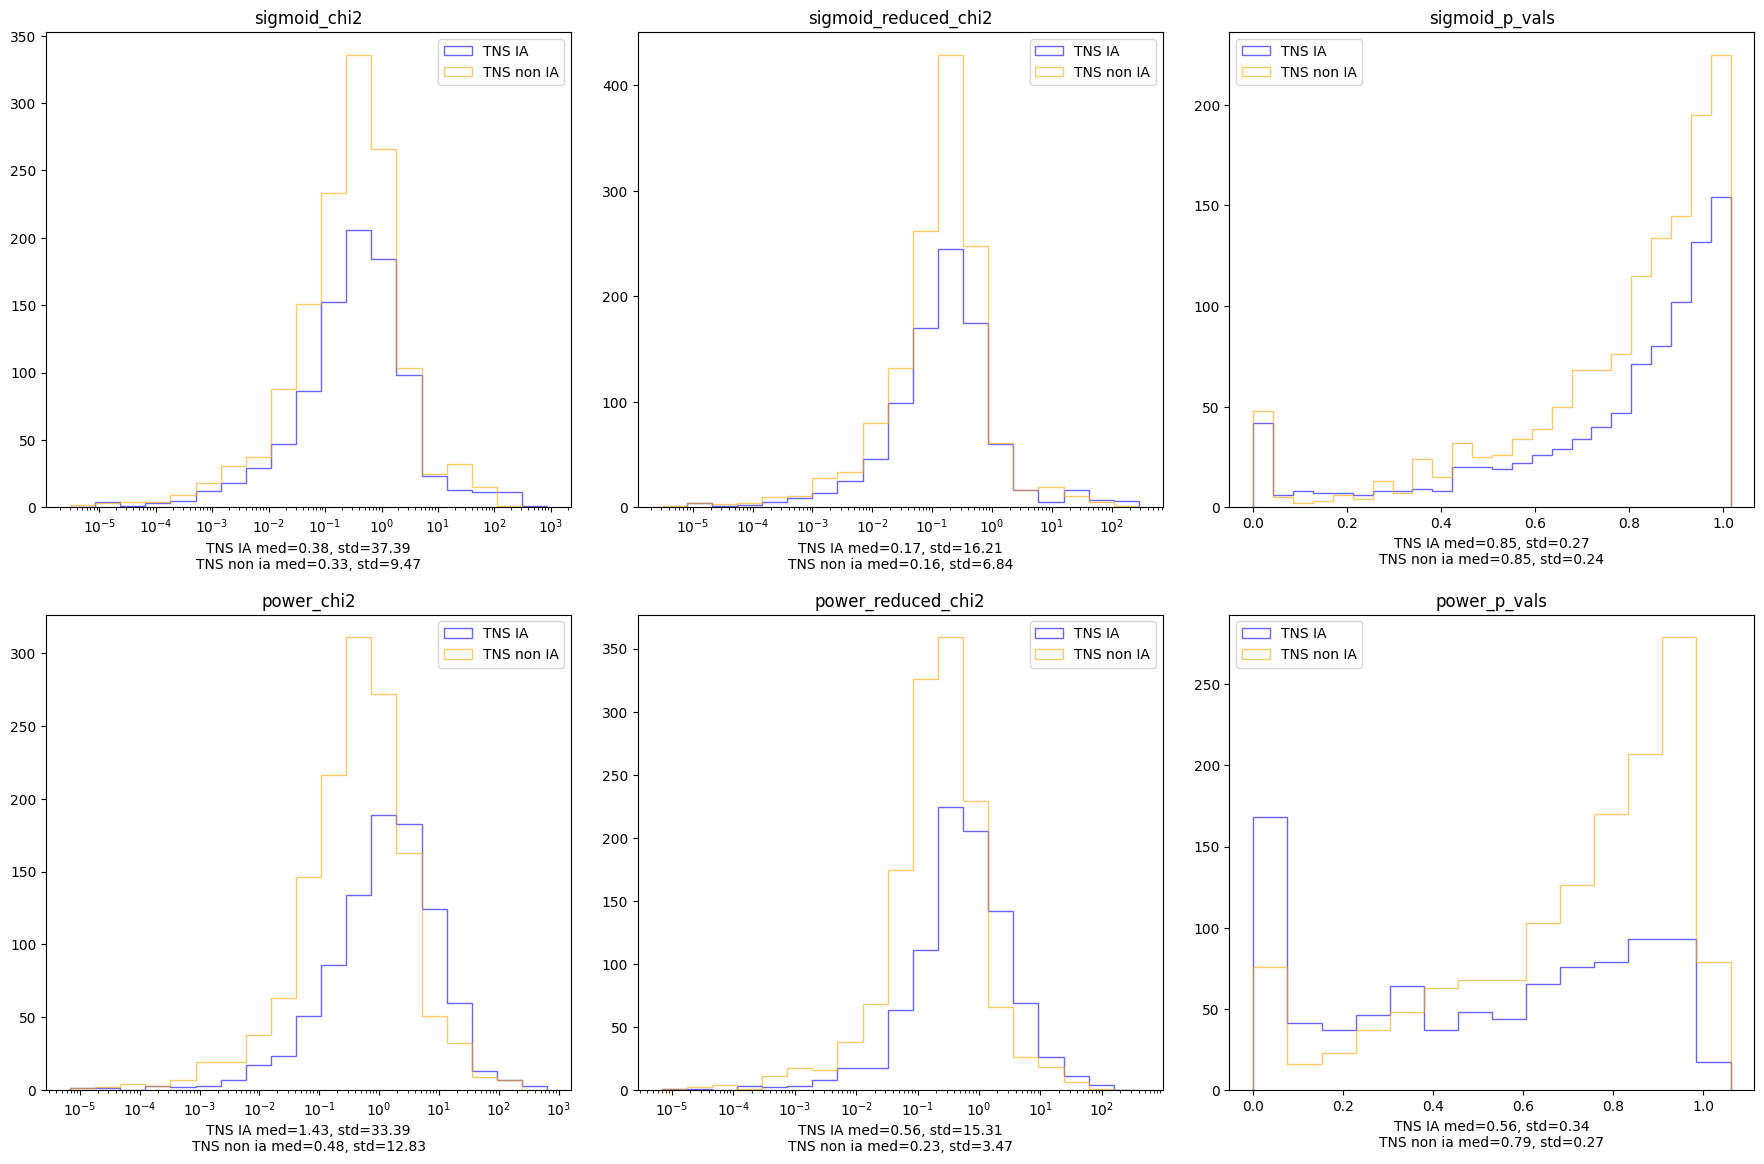

In [220]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=False)


data_pairs = [
    (np.concatenate([tns_ia_sigmoid_g_chi2, tns_ia_sigmoid_r_chi2]),
     np.concatenate([tns_non_ia_sigmoid_g_chi2, tns_non_ia_sigmoid_r_chi2]),
     "sigmoid_chi2", True),

    (np.concatenate([tns_ia_sigmoid_g_reduced_chi2, tns_ia_sigmoid_r_reduced_chi2]),
     np.concatenate([tns_non_ia_sigmoid_g_reduced_chi2, tns_non_ia_sigmoid_r_reduced_chi2]),
     "sigmoid_reduced_chi2", True),

    (np.concatenate([tns_ia_sigmoid_g_p_vals, tns_ia_sigmoid_r_p_vals]),
     np.concatenate([tns_non_ia_sigmoid_g_p_vals, tns_non_ia_sigmoid_r_p_vals]),
     "sigmoid_p_vals", False),

    (np.concatenate([tns_ia_power_g_chi2, tns_ia_power_r_chi2]),
     np.concatenate([tns_non_ia_power_g_chi2, tns_non_ia_power_r_chi2]),
     "power_chi2", True),

    (np.concatenate([tns_ia_power_g_reduced_chi2, tns_ia_power_r_reduced_chi2]),
     np.concatenate([tns_non_ia_power_g_reduced_chi2, tns_non_ia_power_r_reduced_chi2]),
     "power_reduced_chi2", True),

    (np.concatenate([tns_ia_power_g_p_vals, tns_ia_power_r_p_vals]),
     np.concatenate([tns_non_ia_power_g_p_vals, tns_non_ia_power_r_p_vals]),
     "power_p_vals", False),
]

for ax, (tns_ia_data, tns_non_ia_data, title, x_log) in zip(axes.flat, data_pairs):

    datasets = [np.array(tns_ia_data), np.array(tns_non_ia_data)]

    data_min = min(np.min(d) for d in datasets)
    data_max = max(np.max(d) for d in datasets)

    if x_log:
        ax.set_xscale("log")
        binning = np.logspace(np.log10(data_min), np.log10(data_max), 20)
    else:
        q25, q75 = np.percentile(np.concatenate(datasets), [25, 75])
        iqr = q75 - q25
        bin_width = 2 * iqr / (len(np.concatenate(datasets)) ** (1/3))
        binning = np.arange(data_min, data_max + bin_width, bin_width)
    

    ax.hist(tns_ia_data, bins=binning, color='blue', alpha=0.6, label='TNS IA', histtype='step')
    ax.hist(tns_non_ia_data, bins=binning, color='orange', alpha=0.6, label='TNS non IA', histtype='step')
    
    ax.set_title(title)
    
    tns_median, tns_std = np.median(tns_ia_data), np.std(tns_ia_data)
    tns_non_ia_median, tns_non_ia_std = np.median(tns_non_ia_data), np.std(tns_non_ia_data)
    

    ax.set_xlabel(
        f"TNS IA med={tns_median:.2f}, std={tns_std:.2f}\n"
        f"TNS non ia med={tns_non_ia_median:.2f}, std={tns_non_ia_std:.2f}"
    )

    if x_log:
        ax.set_xscale("log")
    
    ax.legend()

fig.tight_layout(pad=2.0, h_pad=1.5)

plt.show()

We can see that the power law actually tends to fit non Ias better than Ias. While the sigmoid is generally better for both.

Now looking at the random forest SNIa confidences for TNS IA vs non Ia

In [221]:
# This is to get rid of duplicates when analyzing information that is constant across 
# the model x filter combinations such as TNS classification, color, and snia confidences
pdf_unique = pdf.drop_duplicates(subset="object id") 

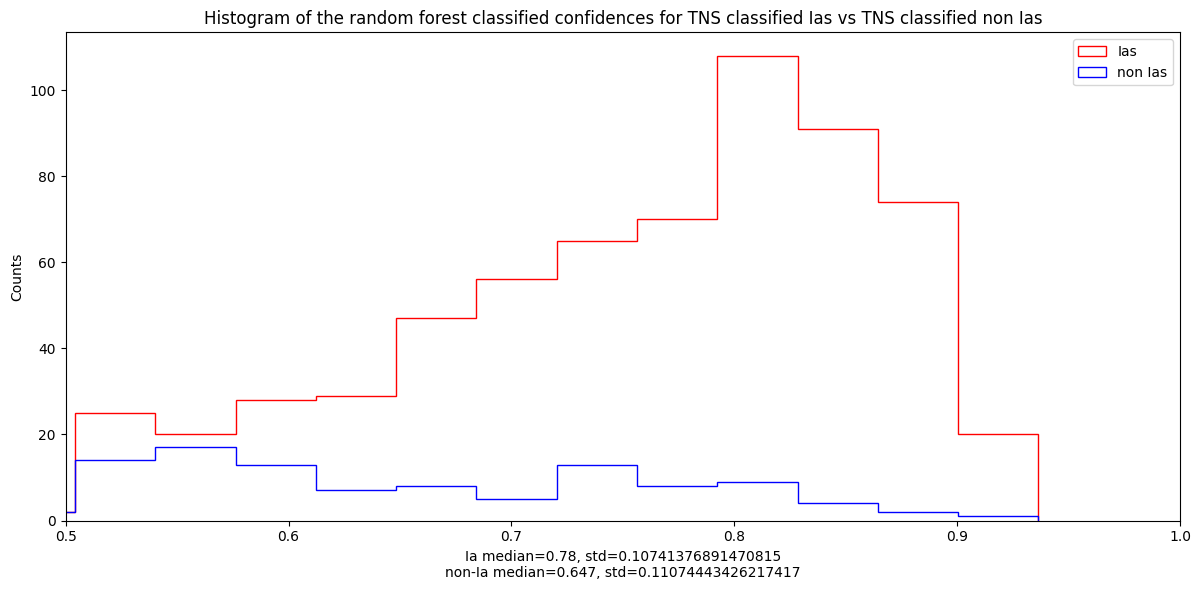

In [241]:
maskTNSIa = pdf_unique["TNS classified"].isin(ia_types)
maskNonIaTNS = pdf_unique["TNS classified"].notna() & ~pdf_unique["TNS classified"].isin(ia_types)

tns_ia_confidences = list(pdf_unique[maskTNSIa]["snia confidence"])
tns_non_ia_confidences = list(pdf_unique[maskNonIaTNS]["snia confidence"])


figure = plt.figure(figsize=(12, 6))

q25, q75 = np.percentile(np.concatenate((tns_ia_confidences, tns_non_ia_confidences)), [25, 75])
iqr = q75 - q25
bin_width = 2 * iqr / (len(np.concatenate(datasets)) ** (1/3))
    
data_min = min(np.concatenate((tns_ia_confidences, tns_non_ia_confidences)))
data_max = max(np.concatenate((tns_ia_confidences, tns_non_ia_confidences)))
binning = np.arange(data_min, data_max + bin_width, bin_width)

plt.hist(tns_ia_confidences, bins=binning,histtype='step', color='red', label='Ias')
plt.hist(tns_non_ia_confidences, bins=binning,histtype='step', color='blue', label='non Ias')

plt.xlabel(f"Ia median={np.median(tns_ia_confidences)}, std={np.std(tns_ia_confidences)}\nnon-Ia median={np.median(tns_non_ia_confidences)}, std={np.std(tns_non_ia_confidences)}")
plt.ylabel("Counts")
plt.title("Histogram of the random forest classified confidences for TNS classified Ias vs TNS classified non Ias")
plt.tight_layout()
plt.legend()
plt.xlim(0.5, 1)
plt.show()


In [223]:
# Looking at parameter distributions for TNS non-ia objects given a high rf confidence score (>=0.8)
filtered_pdf = pdf[
    pdf['TNS classified'].notna() & 
    ~pdf['TNS classified'].isin(ia_types) & 
    (pdf['snia confidence'] >= 0.6)
]

def get_params(df, model_name, filter_name):
    subset = df[(df['model'] == model_name) & (df['filter'] == filter_name)]
    return list(subset[['a', 'b', 'c']].itertuples(index=False, name=None))

hp_non_ia_sigmoid_g_params = get_params(filtered_pdf, 'sigmoid', 'g')
hp_non_ia_sigmoid_r_params = get_params(filtered_pdf, 'sigmoid', 'r')
hp_non_ia_power_g_params   = get_params(filtered_pdf, 'power', 'g')
hp_non_ia_power_r_params   = get_params(filtered_pdf, 'power', 'r')

lower_percentile = 10
upper_percentile = 90

hp_non_ia_sigmoid_g_a, hp_non_ia_sigmoid_g_b, hp_non_ia_sigmoid_g_c = zip(*remove_outliers(hp_non_ia_sigmoid_g_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
hp_non_ia_sigmoid_r_a, hp_non_ia_sigmoid_r_b, hp_non_ia_sigmoid_r_c = zip(*remove_outliers(hp_non_ia_sigmoid_r_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))

hp_non_ia_power_g_a, hp_non_ia_power_g_b, hp_non_ia_power_g_c = zip(*remove_outliers(hp_non_ia_power_g_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))
hp_non_ia_power_r_a, hp_non_ia_power_r_b, hp_non_ia_power_r_c = zip(*remove_outliers(hp_non_ia_power_r_params, lower_percentile=lower_percentile, upper_percentile=upper_percentile))

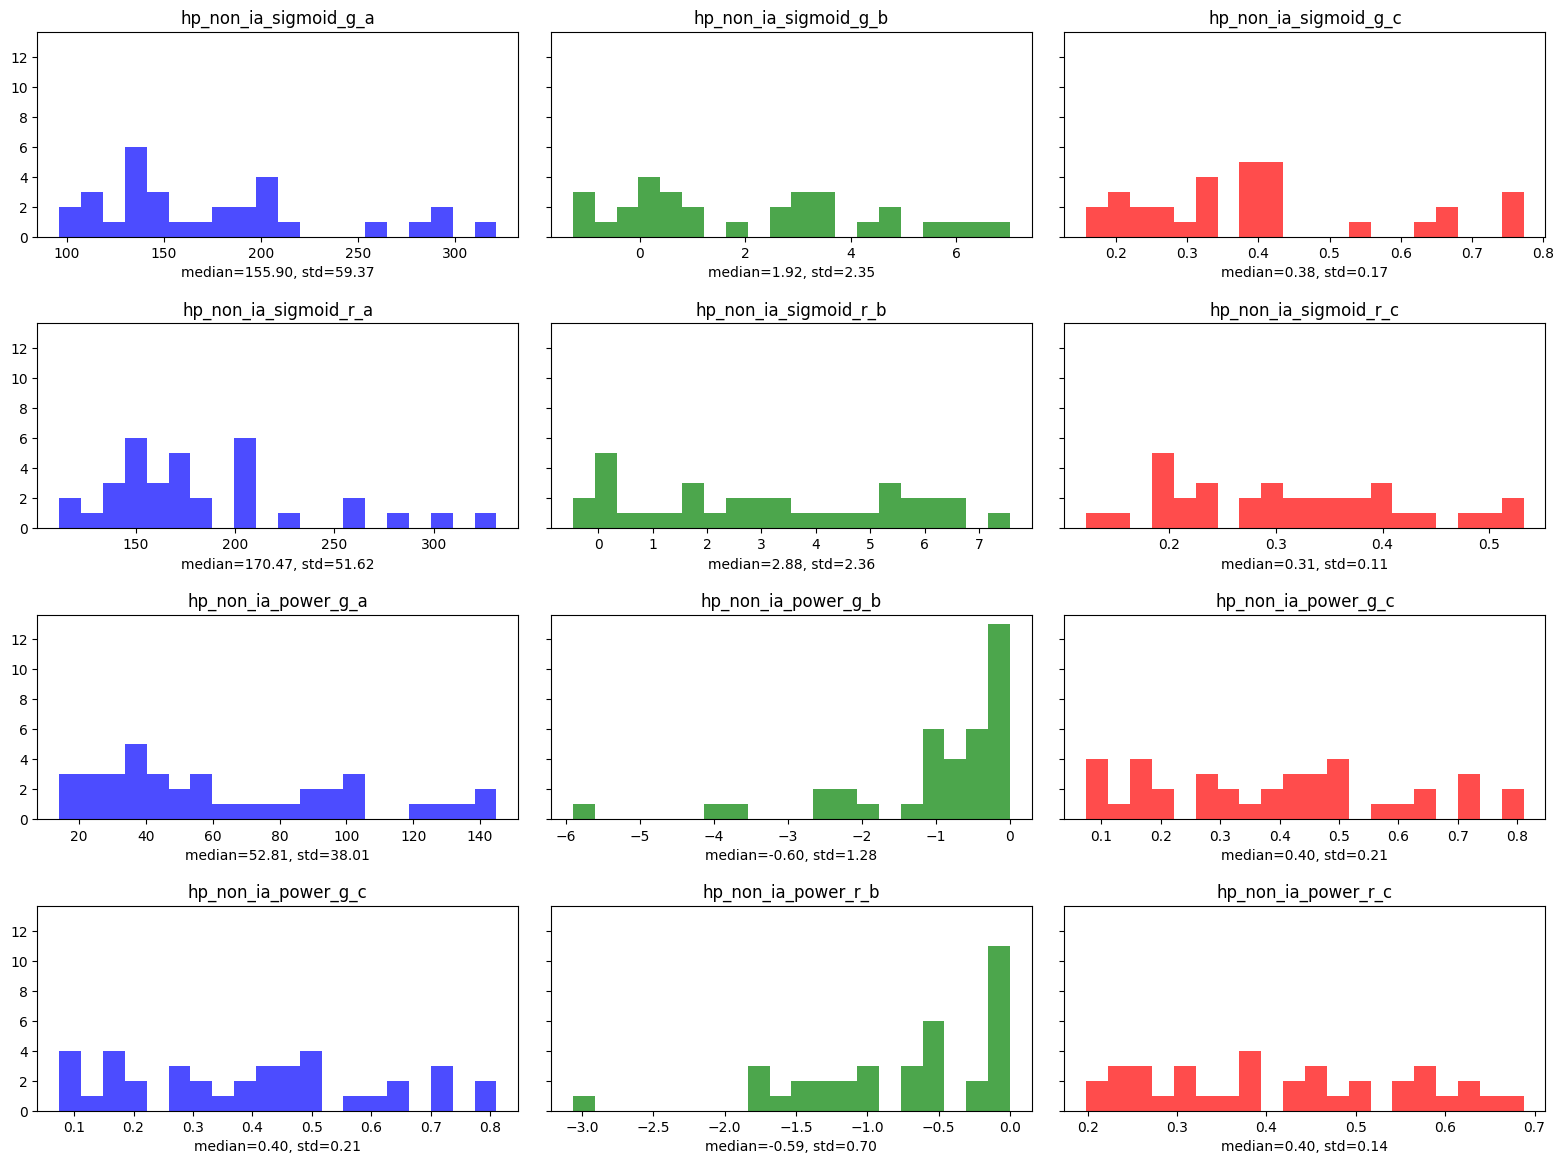

In [224]:
fig, axes = plt.subplots(4, 3, figsize=(16, 12), sharey=True)

binning = 20

axes[0, 0].hist(hp_non_ia_sigmoid_g_a, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[0, 0].set_title("hp_non_ia_sigmoid_g_a")
axes[0, 0].set_xlabel(f"median={np.median(hp_non_ia_sigmoid_g_a):.2f}, std={np.std(hp_non_ia_sigmoid_g_a):.2f}")

axes[0, 1].hist(hp_non_ia_sigmoid_g_b, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[0, 1].set_title("hp_non_ia_sigmoid_g_b")
axes[0, 1].set_xlabel(f"median={np.median(hp_non_ia_sigmoid_g_b):.2f}, std={np.std(hp_non_ia_sigmoid_g_b):.2f}")

axes[0, 2].hist(hp_non_ia_sigmoid_g_c, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[0, 2].set_title("hp_non_ia_sigmoid_g_c")
axes[0, 2].set_xlabel(f"median={np.median(hp_non_ia_sigmoid_g_c):.2f}, std={np.std(hp_non_ia_sigmoid_g_c):.2f}")

axes[1, 0].hist(hp_non_ia_sigmoid_r_a, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[1, 0].set_title("hp_non_ia_sigmoid_r_a")
axes[1, 0].set_xlabel(f"median={np.median(hp_non_ia_sigmoid_r_a):.2f}, std={np.std(hp_non_ia_sigmoid_r_a):.2f}")

axes[1, 1].hist(hp_non_ia_sigmoid_r_b, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[1, 1].set_title("hp_non_ia_sigmoid_r_b")
axes[1, 1].set_xlabel(f"median={np.median(hp_non_ia_sigmoid_r_b):.2f}, std={np.std(hp_non_ia_sigmoid_r_b):.2f}")

axes[1, 2].hist(hp_non_ia_sigmoid_r_c, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[1, 2].set_title("hp_non_ia_sigmoid_r_c")
axes[1, 2].set_xlabel(f"median={np.median(hp_non_ia_sigmoid_r_c):.2f}, std={np.std(hp_non_ia_sigmoid_r_c):.2f}")

axes[2, 0].hist(hp_non_ia_power_g_a, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[2, 0].set_title("hp_non_ia_power_g_a")
axes[2, 0].set_xlabel(f"median={np.median(hp_non_ia_power_g_a):.2f}, std={np.std(hp_non_ia_power_g_a):.2f}")

axes[2, 1].hist(hp_non_ia_power_g_b, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[2, 1].set_title("hp_non_ia_power_g_b")
axes[2, 1].set_xlabel(f"median={np.median(hp_non_ia_power_g_b):.2f}, std={np.std(hp_non_ia_power_g_b):.2f}")

axes[2, 2].hist(hp_non_ia_power_g_c, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[2, 2].set_title("hp_non_ia_power_g_c")
axes[2, 2].set_xlabel(f"median={np.median(hp_non_ia_power_g_c):.2f}, std={np.std(hp_non_ia_power_g_c):.2f}")

axes[3, 0].hist(hp_non_ia_power_g_c, bins=binning, color='blue', alpha=0.7, histtype='bar')
axes[3, 0].set_title("hp_non_ia_power_g_c")
axes[3, 0].set_xlabel(f"median={np.median(hp_non_ia_power_g_c):.2f}, std={np.std(hp_non_ia_power_g_c):.2f}")

axes[3, 1].hist(hp_non_ia_power_r_b, bins=binning, color='green', alpha=0.7, histtype='bar')
axes[3, 1].set_title("hp_non_ia_power_r_b")
axes[3, 1].set_xlabel(f"median={np.median(hp_non_ia_power_r_b):.2f}, std={np.std(hp_non_ia_power_r_b):.2f}")

axes[3, 2].hist(hp_non_ia_power_r_c, bins=binning, color='red', alpha=0.7, histtype='bar')
axes[3, 2].set_title("hp_non_ia_power_r_c")
axes[3, 2].set_xlabel(f"median={np.median(hp_non_ia_power_r_c):.2f}, std={np.std(hp_non_ia_power_r_c):.2f}")

fig.tight_layout(pad=2.0, h_pad=1.5)
plt.show()

Nothing interesting here

In [225]:
unique_pdf = pdf.drop_duplicates(subset="object id", keep="first")
all_ids = pdf['object id'].unique().tolist()
num_ids = len(all_ids)

maskTNS = pdf["TNS classified"].isin(["SN Ia-91T-like", "SN Iax[02cx-like]", "SN Ia-pec", "SN Ia"])
tns_classified_ids = pdf.loc[maskTNS, "object id"].unique().tolist()
num_tns_classified_ids = len(tns_classified_ids)

single_color_ids = set(pdf.loc[pdf["color change"] == "single", "object id"])
bump_ids = set(pdf.loc[pdf["color change"] == "bump", "object id"])

tns_with_single_change = set(tns_classified_ids) & single_color_ids
tns_with_bump = set(tns_classified_ids) & bump_ids

print(f"Number of TNS classified ids: {num_tns_classified_ids}")
print(f"Percentage of TNS classified ids: {100 * num_tns_classified_ids / num_ids:.2f}%")
print(f"Number of ids with a single color change: {len(single_color_ids)}")
print(f"Percentage of ids with a single color change: {100 * len(single_color_ids) / num_ids:.2f}%")
print(f"Number of ids with a bump: {len(bump_ids)}")
print(f"Percentage of ids with a bump: {100 * len(bump_ids) / num_ids:.2f}%")
print(f"Number of TNS classified ids with a single color change: {len(tns_with_single_change)}")
print(f"Percentage of TNS classified ids with a single color change: {100 * len(tns_with_single_change) / num_tns_classified_ids:.2f}%")
print(f"Number of TNS classified ids with a bump: {len(tns_with_bump)}")
print(f"Percentage of TNS classified ids with a bump: {100 * len(tns_with_bump) / num_tns_classified_ids:.2f}%")
print(f"Percentage of all ids that are both TNS classified and have a single color change: {100 * len(tns_with_single_change) / num_ids:.2f}%")
print(f"Percentage of all ids that are both TNS classified and have a bump: {100 * len(tns_with_bump) / num_ids:.2f}%")


Number of TNS classified ids: 636
Percentage of TNS classified ids: 34.36%
Number of ids with a single color change: 568
Percentage of ids with a single color change: 30.69%
Number of ids with a bump: 255
Percentage of ids with a bump: 13.78%
Number of TNS classified ids with a single color change: 195
Percentage of TNS classified ids with a single color change: 30.66%
Number of TNS classified ids with a bump: 103
Percentage of TNS classified ids with a bump: 16.19%
Percentage of all ids that are both TNS classified and have a single color change: 10.53%
Percentage of all ids that are both TNS classified and have a bump: 5.56%


In [226]:
# Plotting sigmoid parameter distributions of nobump Ia vs non nobump
maskBump = pdf['color change'] == 'bump'
maskIa = pdf['TNS classified'].isin(ia_types)
maskSinglechange = pdf['color change'] == 'single'

pdf_bumpIa = pdf[maskIa & maskBump]
pdf_nobumpIa = pdf[maskIa & ~maskBump]

lower_percentile = 5
upper_percentile = 95

bump_ia_sigmoid_g_params = remove_outliers(get_params(pdf_bumpIa, 'sigmoid', 'g'), 10, 90)
bump_ia_sigmoid_r_params = remove_outliers(get_params(pdf_bumpIa, 'sigmoid', 'r'), 10, 90)
bump_ia_power_g_params = remove_outliers(get_params(pdf_bumpIa, 'power', 'g'), 10, 90)
bump_ia_power_r_params = remove_outliers(get_params(pdf_bumpIa, 'power', 'r'), 10, 90)

bump_ia_sigmoid_g_a, bump_ia_sigmoid_g_b, bump_ia_sigmoid_g_c = zip(*bump_ia_sigmoid_g_params)
bump_ia_sigmoid_r_a, bump_ia_sigmoid_r_b, bump_ia_sigmoid_r_c = zip(*bump_ia_sigmoid_r_params)

bump_ia_power_g_a, bump_ia_power_g_b, bump_ia_power_g_c = zip(*bump_ia_power_g_params)
bump_ia_power_r_a, bump_ia_power_r_b, bump_ia_power_r_c = zip(*bump_ia_power_r_params)

nobump_ia_sigmoid_g_params = remove_outliers(get_params(pdf_nobumpIa, 'sigmoid', 'g'), 10, 90)
nobump_ia_sigmoid_r_params = remove_outliers(get_params(pdf_nobumpIa, 'sigmoid', 'r'), 10, 90)
nobump_ia_power_g_params = remove_outliers(get_params(pdf_nobumpIa, 'power', 'g'), 10, 90)
nobump_ia_power_r_params = remove_outliers(get_params(pdf_nobumpIa, 'power', 'r'), 10, 90)

nobump_ia_sigmoid_g_a, nobump_ia_sigmoid_g_b, nobump_ia_sigmoid_g_c = zip(*nobump_ia_sigmoid_g_params)
nobump_ia_sigmoid_r_a, nobump_ia_sigmoid_r_b, nobump_ia_sigmoid_r_c = zip(*nobump_ia_sigmoid_r_params)

nobump_ia_power_g_a, nobump_ia_power_g_b, nobump_ia_power_g_c = zip(*nobump_ia_power_g_params)
nobump_ia_power_r_a, nobump_ia_power_r_b, nobump_ia_power_r_c = zip(*nobump_ia_power_r_params)

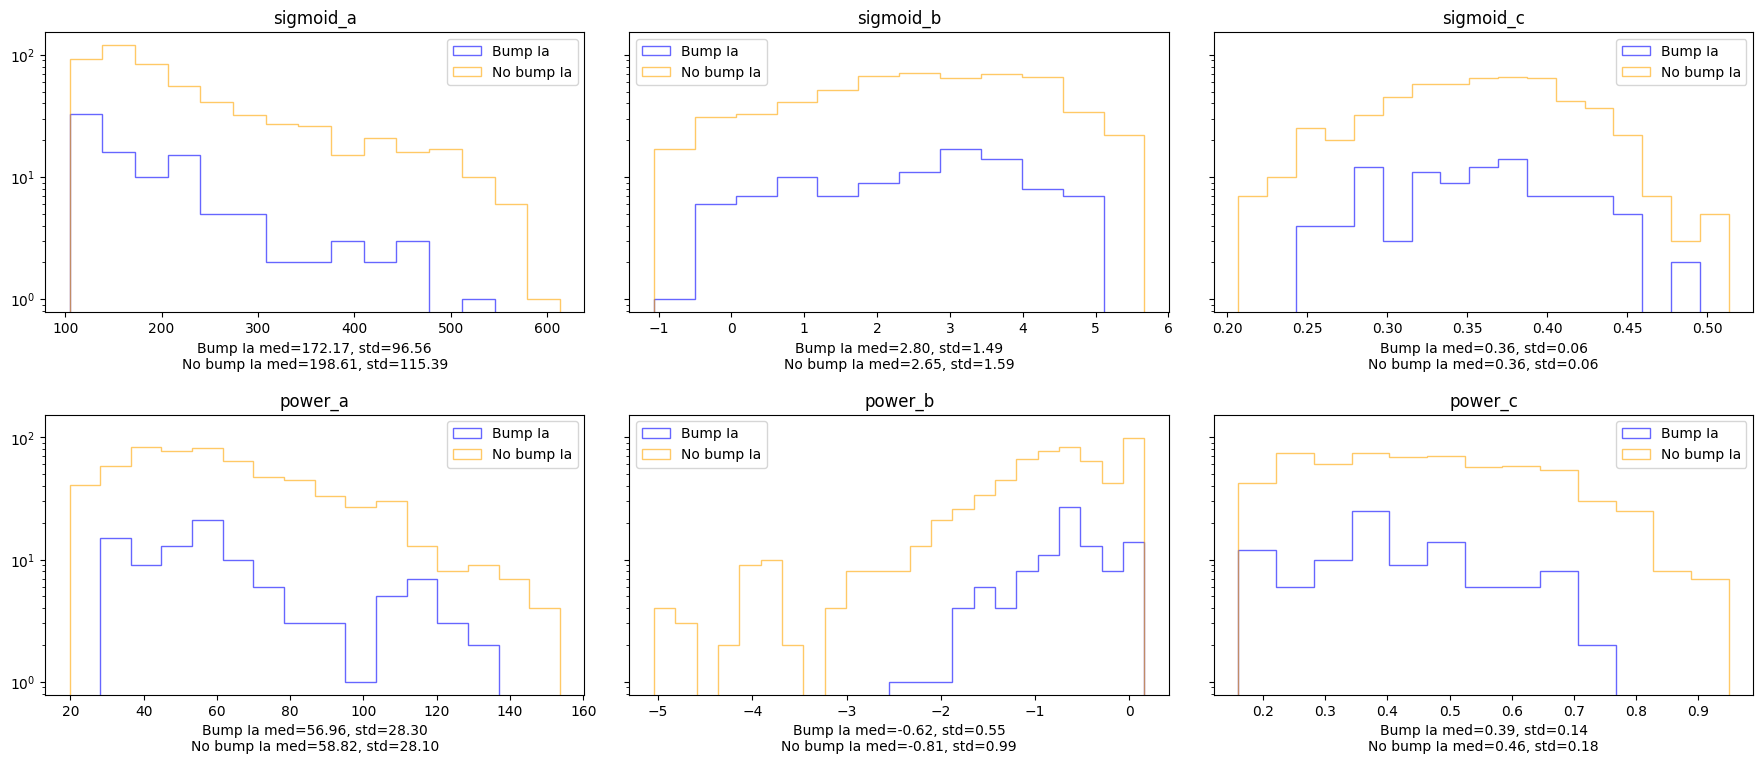

In [227]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharey=True)



data_pairs = [
    (np.concatenate([bump_ia_sigmoid_g_a, bump_ia_sigmoid_r_a]),
     np.concatenate([nobump_ia_sigmoid_g_a, nobump_ia_sigmoid_r_a]), "sigmoid_a", False),

    (np.concatenate([bump_ia_sigmoid_g_b, bump_ia_sigmoid_r_b]),
     np.concatenate([nobump_ia_sigmoid_g_b, nobump_ia_sigmoid_r_b]), "sigmoid_b", False),

    (np.concatenate([bump_ia_sigmoid_g_c, bump_ia_sigmoid_r_c]),
     np.concatenate([nobump_ia_sigmoid_g_c, nobump_ia_sigmoid_r_c]), "sigmoid_c", False),

    (np.concatenate([bump_ia_power_g_a, bump_ia_power_r_a]),
     np.concatenate([nobump_ia_power_g_a, nobump_ia_power_r_a]), "power_a", False),

    (np.concatenate([bump_ia_power_g_b, bump_ia_power_r_b]),
     np.concatenate([nobump_ia_power_g_b, nobump_ia_power_r_b]), "power_b", False),

    (np.concatenate([bump_ia_power_g_c, bump_ia_power_r_c]),
     np.concatenate([nobump_ia_power_g_c, nobump_ia_power_r_c]), "power_c", False),
]

for ax, (bump_ia_data, bobump_ia_data, title, x_log) in zip(axes.flat, data_pairs):

    datasets = [np.array(bump_ia_data), np.array(bobump_ia_data)]
    data_min = min(np.min(d) for d in datasets)
    data_max = max(np.max(d) for d in datasets)

    if x_log:
        bump_ia_data = bump_ia_data[bump_ia_data > 0]
        bobump_ia_data = bobump_ia_data[bobump_ia_data > 0]

        data_min = min(np.min(bump_ia_data), np.min(bobump_ia_data))
        data_max = max(np.max(bump_ia_data), np.max(bobump_ia_data))
    
        ax.set_xscale("log")
        binning = np.logspace(np.log10(data_min), np.log10(data_max), num=50)
    else:
        q25, q75 = np.percentile(np.concatenate(datasets), [25, 75])
        iqr = q75 - q25
        bin_width = 2 * iqr / (len(np.concatenate(datasets)) ** (1/3))
        binning = np.arange(data_min, data_max + bin_width, bin_width)

    ax.hist(bump_ia_data, bins=binning, color='blue', alpha=0.6, label='Bump Ia', histtype='step')
    ax.hist(bobump_ia_data, bins=binning, color='orange', alpha=0.6, label='No bump Ia', histtype='step')
    
    ax.set_title(title)
    
    tns_median, tns_std = np.median(bump_ia_data), np.std(bump_ia_data)
    tns_non_ia_median, tns_non_ia_std = np.median(bobump_ia_data), np.std(bobump_ia_data)
    

    ax.set_xlabel(
        f"Bump Ia med={tns_median:.2f}, std={tns_std:.2f}\n"
        f"No bump Ia med={tns_non_ia_median:.2f}, std={tns_non_ia_std:.2f}"
    )
    
    ax.legend()

fig.tight_layout(pad=2.0, h_pad=1.5)
plt.yscale('log')
plt.show()

There isn't much of a difference in any of the main distributions except for the a values (corresponding to magnitude), and power c values (corresponding to the exponent). It seems that maybe Ias without a bump might be slightly brighter than those with a bump, and the power fits generally have a slightly lower exponent value. (Similar conclusions for Ias with a single color change and vs rest)

In [228]:
print(pdf_unique["TNS classified"].unique())

[nan 'SN Ia-91T-like' 'SN Ia' 'SN II' 'SN IIn' 'SN IIb' 'SN Ib'
 'SN Ia-pec' 'SN Ic-BL' 'SN Ic' 'SN II-pec' 'SN Iax[02cx-like]' 'SLSN-I'
 'SN Ia-91bg-like' 'SN Ia-CSM' 'SLSN-II' 'SN' 'SN Ib/c' 'SN Ibn']


In [229]:
# Counting the appearances of each object id so we can see what might cause a band to not be fit to one of the models
obj_id_counts = pdf['object id'].value_counts()

ids_less_than_4 = obj_id_counts[obj_id_counts < 4].index.tolist()

print(ids_less_than_4)
print(len(ids_less_than_4))

['ZTF24abjqhwm', 'ZTF22abnawii', 'ZTF22aatvdon', 'ZTF22abngbge', 'ZTF24abnfaaw', 'ZTF22aavwyfw', 'ZTF24abjdegd', 'ZTF25abeclmp', 'ZTF24ablvmmq', 'ZTF25abdxpuh', 'ZTF25abazmpy', 'ZTF22aauuokl', 'ZTF22aauhism', 'ZTF22abmynyd', 'ZTF24abnpugu', 'ZTF24abpvoah', 'ZTF22aawjqfd', 'ZTF24abouotp', 'ZTF25abcngap', 'ZTF24abnwjpi', 'ZTF22abnvmzz', 'ZTF22abmzvmi', 'ZTF24abridsh', 'ZTF22aauyhnm', 'ZTF22aaweukv', 'ZTF24abnmxnl', 'ZTF24ablhsxr', 'ZTF24abremyy', 'ZTF24acabxwm', 'ZTF24absaefn', 'ZTF25aavchtv', 'ZTF22abckjon', 'ZTF22abgxglq', 'ZTF25aagkjbr', 'ZTF22abissvn', 'ZTF22abhuohx', 'ZTF22abcorth', 'ZTF22abbkxcm', 'ZTF25aafvgrt', 'ZTF22abamnmb', 'ZTF24abzjfdz', 'ZTF25aafqvot', 'ZTF22abjaqoq', 'ZTF25aaazugo', 'ZTF22abansyp', 'ZTF24abzzplu', 'ZTF25aaortzp', 'ZTF25aaacrjj', 'ZTF22abiflfo', 'ZTF25aaizkhw', 'ZTF25aauacdq', 'ZTF25aaudpzv', 'ZTF22abgudql', 'ZTF22abemaki', 'ZTF25aapxsjb', 'ZTF25aapsolr', 'ZTF25aaptbwp', 'ZTF25aaptzpf', 'ZTF22abfwbgr', 'ZTF25aaocnsp', 'ZTF22abfqxme', 'ZTF25aarleqv', 'ZTF22a

In [230]:
expected_combos = set(product(['sigmoid', 'power'], ['g', 'r']))
missing_combos_per_id = {}

for object_id, group in pdf.groupby('object id'):
    combos_present = set(zip(group['model'], group['filter']))
    missing = expected_combos - combos_present
    
    if missing:
        filter_to_points = group.groupby('filter')['num points'].first().to_dict()
        
        missing_info = [(model, flt, filter_to_points.get(flt)) for model, flt in missing]
        missing_combos_per_id[object_id] = missing_info

# pretty print
for oid, missing in missing_combos_per_id.items():
    print(f"{oid} is missing:")
    for model, flt, npts in missing:
        print(f"  ({model}, {flt}) → num points = {npts}")


ZTF18aaiwzie is missing:
  (sigmoid, g) → num points = 3
ZTF22aatvdon is missing:
  (sigmoid, g) → num points = 2
ZTF22aauhism is missing:
  (sigmoid, r) → num points = 2
ZTF22aauuokl is missing:
  (sigmoid, r) → num points = 2
ZTF22aauyhnm is missing:
  (sigmoid, g) → num points = 2
ZTF22aavwyfw is missing:
  (sigmoid, g) → num points = 2
ZTF22aaweukv is missing:
  (sigmoid, r) → num points = 2
ZTF22aawfhcp is missing:
  (sigmoid, g) → num points = 2
  (sigmoid, r) → num points = 2
ZTF22aawjqfd is missing:
  (sigmoid, g) → num points = 2
ZTF22aawnchs is missing:
  (sigmoid, g) → num points = 2
  (sigmoid, r) → num points = 2
ZTF22aawprgf is missing:
  (sigmoid, g) → num points = 2
  (sigmoid, r) → num points = 2
ZTF22aawzgcx is missing:
  (sigmoid, g) → num points = 2
ZTF22aaxagoa is missing:
  (sigmoid, g) → num points = 2
  (power, r) → num points = None
  (sigmoid, r) → num points = None
ZTF22aaxdjny is missing:
  (power, g) → num points = None
  (sigmoid, g) → num points = None
  

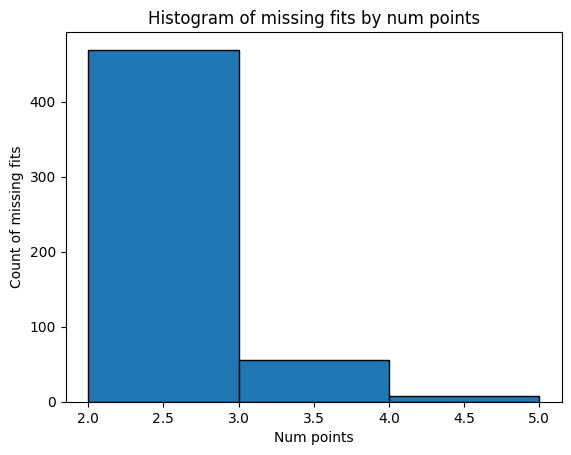

In [231]:
missing_points = []

for object_id, group in pdf.groupby('object id'):
    combos_present = set(zip(group['model'], group['filter']))
    missing = expected_combos - combos_present
    
    if missing:
        filter_to_points = group.groupby('filter')['num points'].first().to_dict()
        for model, flt in missing:
            npts = filter_to_points.get(flt)
            if npts is not None:
                missing_points.append(npts)

# make histogram
plt.hist(missing_points, bins=range(min(missing_points), max(missing_points)+2), edgecolor='black')
plt.xlabel("Num points")
plt.ylabel("Count of missing fits")
plt.title("Histogram of missing fits by num points")
plt.show()

Now looking at the power law exponent values for objects with missing sigmoid fits and $>=3$ points

In [232]:
results = []

for object_id, group in pdf.groupby('object id'):
    combos_present = set(zip(group['model'], group['filter']))
    missing = expected_combos - combos_present
    
    filter_to_points = group.groupby('filter')['num points'].first().to_dict()
    
    for model, flt in missing:
        if model == "sigmoid":  
            npts = filter_to_points.get(flt)
            if npts is not None:
                row = group[(group['model'] == 'power') & (group['filter'] == flt)]
                if not row.empty:
                    a_val = row['a'].values[0]
                    b_val = row['b'].values[0]
                    c_val = row['c'].values[0]
                    sig_a_val = row['sig a'].values[0]
                    sig_b_val = row['sig b'].values[0]
                    sig_c_val = row['sig c'].values[0]
                    results.append((object_id, flt, npts, a_val, b_val, c_val, sig_a_val, sig_b_val, sig_c_val))

pdf_missing_sigmoid = pd.DataFrame(results, columns=['object_id', 'filter', 'num_points', 'a', 'b', 'c', 'sig a', 'sig b', 'sig c'])

print(pdf_missing_sigmoid)

        object_id filter  num_points          a          b         c  \
0    ZTF18aaiwzie      g           3   1.895688 -44.308876  1.000000   
1    ZTF22aatvdon      g           2  41.099978  -4.748234  0.558692   
2    ZTF22aauhism      r           2  26.406888  -2.582996  0.714532   
3    ZTF22aauuokl      r           2  13.596065  -2.842853  0.701638   
4    ZTF22aauyhnm      g           2  18.360056  -2.621819  0.694604   
..            ...    ...         ...        ...        ...       ...   
527  ZTF25abcktin      r           2  17.466010  -4.745862  0.547798   
528  ZTF25abcngap      g           4   1.508116 -18.404155  1.000000   
529  ZTF25abdxpuh      r           2  21.610416  -7.995638  0.288201   
530  ZTF25abeclmp      r           2  12.444227 -10.170505  0.504297   
531  ZTF25abfhzvi      g           2   9.927971  -7.682834  0.457052   

        sig a      sig b     sig c  
0         inf        inf       inf  
1         inf        inf       inf  
2         inf        inf

Now looking the parametrs of objects with missing power law fits

In [233]:
results_power_missing = []

for object_id, group in pdf.groupby('object id'):
    combos_present = set(zip(group['model'], group['filter']))
    missing = expected_combos - combos_present
    
    filter_to_points = group.groupby('filter')['num points'].first().to_dict()
    
    for model, flt in missing:
        if model == "power":  
            npts = filter_to_points.get(flt)
            if npts is not None:
                row = group[(group['model'] == 'sigmoid') & (group['filter'] == flt)]
                if not row.empty:
                    a_val = row['a'].values[0]
                    b_val = row['b'].values[0]
                    c_val = row['c'].values[0]
                    sig_a_val = row['sig a'].values[0]
                    sig_b_val = row['sig b'].values[0]
                    sig_c_val = row['sig c'].values[0]
                    results_power_missing.append((object_id, flt, npts, a_val, b_val, c_val, sig_a_val, sig_b_val, sig_c_val))

pdf_missing_power = pd.DataFrame(
    results_power_missing,
    columns=['object_id', 'filter', 'num_points', 'a', 'b', 'c', 'sig a', 'sig b', 'sig c']
)



In [234]:
# List of all lcs with bump
pdf_bump = pdf[maskBump]
print(pdf_bump['object id'].unique())

['ZTF22aawakbw' 'ZTF22aayfpso' 'ZTF22aaypvib' 'ZTF22aayprcr'
 'ZTF22abbaeba' 'ZTF22abaprzu' 'ZTF22abbaqil' 'ZTF22abbtmdv'
 'ZTF22abcendf' 'ZTF22abcsnri' 'ZTF22abckncn' 'ZTF22abbtvme'
 'ZTF22abdomry' 'ZTF22abciwsc' 'ZTF22abdxbyh' 'ZTF22abegpxm'
 'ZTF22abgdjwt' 'ZTF22abfvjky' 'ZTF22abgzexd' 'ZTF22abfwcil'
 'ZTF22abgiayt' 'ZTF22abhsmkj' 'ZTF22abhuvug' 'ZTF22abhxnig'
 'ZTF22abhodtl' 'ZTF22abiiwzd' 'ZTF22abggmuu' 'ZTF22abizgac'
 'ZTF22abihtsn' 'ZTF22abjagqj' 'ZTF22abhcrfy' 'ZTF22abkjegi'
 'ZTF22abjgawo' 'ZTF22ablhldn' 'ZTF22abkfgrt' 'ZTF22abllclb'
 'ZTF22abluqwo' 'ZTF22abmwonm' 'ZTF22abivqkc' 'ZTF22abngjlt'
 'ZTF22abmxzxm' 'ZTF22abnmqio' 'ZTF22abnmpty' 'ZTF22abputid'
 'ZTF22abqaphs' 'ZTF22abqajav' 'ZTF22abtybkh' 'ZTF22abvhilg'
 'ZTF22abvapet' 'ZTF22abyhvtk' 'ZTF22abyrdyz' 'ZTF23aaawixk'
 'ZTF23aadwfed' 'ZTF23aaetxqb' 'ZTF23aaetlim' 'ZTF23aaewyuh'
 'ZTF23aafqzkn' 'ZTF23aaflroa' 'ZTF23aafrhew' 'ZTF23aaeubgm'
 'ZTF23aaftlgw' 'ZTF23aafwsxo' 'ZTF23aafhfwx' 'ZTF23aafwslv'
 'ZTF23aagdebl' 'ZTF23aa

In [252]:
def remove_outliers_series(series, lower_pct=0.05, upper_pct=0.95):
    lower = series.quantile(lower_pct)
    upper = series.quantile(upper_pct)
    return series[(series >= lower) & (series <= upper)]


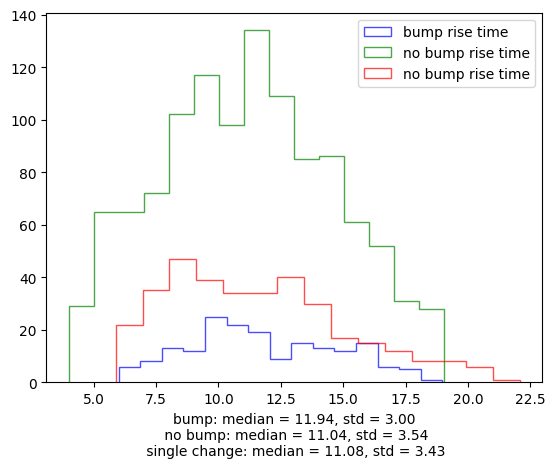

In [253]:
maskBump = pdf_unique['color change'] == 'bump'
maskNone = pdf_unique['color change'] == 'none'
maskSingle = pdf_unique['color change'] == 'single'

bump_rise_time = remove_outliers_series(pdf_unique[maskBump]['rise_time'])
nb_rise_time = remove_outliers_series(pdf_unique[maskNone]['rise_time'])
single_rise_time = remove_outliers_series(pdf_unique[maskSingle]['rise_time'])



total_rt_data = np.concatenate((bump_rise_time, nb_rise_time))
data_min, data_max = np.min(total_rt_data), np.max(total_rt_data)
q25, q75 = np.percentile(total_rt_data, [25, 75])
iqr = q75 - q25
bin_width = 2 * iqr / (len(total_rt_data) ** (1/3))
binning = np.arange(data_min, data_max + bin_width, bin_width)
binning=15
plt.hist(bump_rise_time, bins=binning, color='blue', label='bump rise time', histtype='step', alpha=0.7)
plt.hist(nb_rise_time, bins=binning, color='green', label='no bump rise time', histtype='step', alpha=0.7)
plt.hist(single_rise_time, bins=binning, color='red', label='single change rise time', histtype='step', alpha=0.7)
plt.xlabel(f"bump: median = {np.median(bump_rise_time):.2f}, std = {np.std(bump_rise_time):.2f}\n no bump: median = {np.median(nb_rise_time):.2f}, std = {np.std(nb_rise_time):.2f}\n single change: median = {np.median(single_rise_time):.2f}, std = {np.std(single_rise_time):.2f}")
plt.legend()
plt.show()